In [1]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import os
import sys
import time
import pickle
import seaborn
from scipy import stats
from sklearn import svm, preprocessing
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataforproject.csv")
print(df.columns)
df

Index(['Username', 'Major', 'Specialization', 'Department',
       'User Profile Link', 'Term & Year', 'UG College', 'University Name',
       'Program', 'Research Exp', 'Industry Exp', 'Intern Exp', 'Journal Pubs',
       'ConfPubs', 'TOEFL Score', 'TOEFL Essay', 'greV', 'greQ', 'greA',
       'gmatA', 'gmatQ', 'gmatV', 'Topper CGPA', 'CGPA', 'CGPA Scale',
       'Admission'],
      dtype='object')


,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,NaN,NaN,NaN,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,NaN,NaN,NaN,8.50,7.71,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53638,vins747,NaN,NaN,0,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,NaN,Worcester Polytechnic Institute,MS,0,...,149.0,158.0,3.5,NaN,NaN,NaN,0.00,6.60,100.0,1
53639,ameed.haikal,Biomedical Engineering,NaN,0,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,NaN,Worcester Polytechnic Institute,PhD,10,...,155.0,160.0,3.5,NaN,NaN,NaN,0.00,6.34,10.0,0
53640,downing,Electrical Engineering,Power,0,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,NaN,Worcester Polytechnic Institute,MS,0,...,490.0,790.0,3.0,NaN,NaN,NaN,0.00,0.00,0.0,0
53641,fancy3361,software engineering,NaN,0,http://www.edulix.com/unisearch/user.php?uid=2...,Spring - 2014,NaN,Worcester Polytechnic Institute,MS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0


In [3]:
df.dropna()

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
15914,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,North Carolina State University,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,1
16149,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,SUNY Stony Brook,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,1
16507,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,University of Massachusetts Amherst,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,0
16806,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,University of Utah,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,1
16829,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,University of Wisconsin Madison,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,0
16838,aditya57,Computer Science,Systems,Information Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2014,JNTU,Virginia Polytechnic Institute and State Unive...,MS,0,...,163.0,166.0,3.5,5.0,50.0,39.0,85.8,82.3,100.0,0
25106,Niteshd7,Information Technology,MIS,0,http://www.edulix.com/unisearch/user.php?uid=2...,Fall - 2015,Nagpur University,University of Arizona,MS,0,...,153.0,156.0,4.0,5.0,44.0,33.0,76.0,62.1,100.0,1


In [4]:
# df = df[~(df['UG College'] == 'NaN')]
df = df[pd.notnull(df['UG College'])]
df

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,NaN,NaN,NaN,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,NaN,NaN,NaN,8.50,7.71,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,Texas A and M University College Station,MS,0,...,680.0,800.0,3.0,NaN,NaN,NaN,3.71,3.68,4.0,0
51320,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Pennsylvania,MS,0,...,154.0,169.0,3.0,NaN,NaN,NaN,0.00,87.00,100.0,1
51321,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,University of Southern California,MS,0,...,680.0,800.0,3.0,NaN,NaN,NaN,3.71,3.68,4.0,1
51322,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Southern California,MS,0,...,154.0,169.0,3.0,NaN,NaN,NaN,0.00,87.00,100.0,1


In [5]:
df = df.fillna(0)
df

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,0.0,0.0,0.0,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,0.0,0.0,0.0,8.50,7.71,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,Texas A and M University College Station,MS,0,...,680.0,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,0
51320,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Pennsylvania,MS,0,...,154.0,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1
51321,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,University of Southern California,MS,0,...,680.0,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,1
51322,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Southern California,MS,0,...,154.0,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1


In [6]:
df.dtypes

Username              object
Major                 object
Specialization        object
Department            object
User Profile Link     object
Term & Year           object
UG College            object
University Name       object
Program               object
Research Exp           int64
Industry Exp           int64
Intern Exp           float64
Journal Pubs         float64
ConfPubs             float64
TOEFL Score          float64
TOEFL Essay          float64
greV                 float64
greQ                 float64
greA                 float64
gmatA                float64
gmatQ                float64
gmatV                float64
Topper CGPA          float64
CGPA                 float64
CGPA Scale           float64
Admission              int64
dtype: object

In [7]:
df.describe()

,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
count,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000
mean,0.346037,4.159886,0.465942,0.040020,0.051087,101.798847,5.466324,321.479951,419.027336,4.872961,0.106353,0.117255,0.074585,36.753957,40.286508,56.643695,0.514671
std,2.617488,12.165493,2.491681,0.294584,0.344925,43.859469,10.796335,216.072739,322.024787,36.547059,6.960437,2.610511,1.915089,37.481102,32.334540,45.379822,0.499790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,151.000000,162.000000,3.000000,0.000000,0.000000,0.000000,8.700000,8.252000,10.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000,159.000000,168.000000,3.500000,0.000000,0.000000,0.000000,9.650000,57.000000,100.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,540.000000,770.000000,4.000000,0.000000,0.000000,0.000000,80.000000,72.000000,100.000000,1.000000
max,53.000000,138.000000,96.000000,12.000000,8.000000,1350.000000,60.000000,5560.000000,7990.000000,1470.000000,740.000000,168.000000,152.000000,100.000000,102.000000,100.000000,1.000000


In [8]:
le = preprocessing.LabelEncoder()
df['UG label'] = le.fit_transform(df['UG College'].astype(str))
df

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1,0
1,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1,0
2,ninny.rgs,Electrical Engineering,0,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,740.0,4.5,0.0,0.0,0.0,72.27,72.27,100.0,1,0
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,157.0,3.0,0.0,0.0,0.0,73.00,56.11,100.0,0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,157.0,3.0,0.0,0.0,0.0,8.50,7.71,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,Texas A and M University College Station,MS,0,...,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,0,1401
51320,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Pennsylvania,MS,0,...,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1,1401
51321,airyuanye,Industrial Engineering,Simulation&Modeling; SCM,Dpt. of Mechanical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2012,Zhejiang University,University of Southern California,MS,0,...,800.0,3.0,0.0,0.0,0.0,3.71,3.68,4.0,1,1401
51322,jhstjh,Computer Science,Game Development / Graphics,Digital Media Technology,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,Zhejiang University,University of Southern California,MS,0,...,169.0,3.0,0.0,0.0,0.0,0.00,87.00,100.0,1,1401


In [9]:
df = df.drop(columns=['Username', 'Specialization', 'Major', 'Department', 'User Profile Link', 'Term & Year', 'UG College', 'gmatV', 'gmatQ', 'gmatA'])
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,72.27,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,72.27,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,72.27,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,73.00,56.11,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.50,7.71,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,3.68,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,87.00,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,3.68,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,87.00,100.0,1,1401


In [10]:
df.describe()

,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
count,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000,51324.000000
mean,0.346037,4.159886,0.465942,0.040020,0.051087,101.798847,5.466324,321.479951,419.027336,4.872961,36.753957,40.286508,56.643695,0.514671,713.460584
std,2.617488,12.165493,2.491681,0.294584,0.344925,43.859469,10.796335,216.072739,322.024787,36.547059,37.481102,32.334540,45.379822,0.499790,430.167158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,151.000000,162.000000,3.000000,8.700000,8.252000,10.000000,0.000000,354.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,0.000000,159.000000,168.000000,3.500000,9.650000,57.000000,100.000000,1.000000,702.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,540.000000,770.000000,4.000000,80.000000,72.000000,100.000000,1.000000,1059.000000
max,53.000000,138.000000,96.000000,12.000000,8.000000,1350.000000,60.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,100.000000,1.000000,1430.000000


In [11]:
l = len(df)
df = df[~(df['CGPA Scale'] == 0)]
l1 = len(df)
print(l-l1, "outliers removed.")

l = len(df)
df = df[~(df['CGPA'] == 0)]
l1 = len(df)
print(l-l1, "outliers removed.")

1105 outliers removed.
47 outliers removed.


In [12]:
df['CGPA'] = 10*df['CGPA']/df['CGPA Scale']
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,7.227,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,72.27,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,73.00,5.611,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.50,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,8.700,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,3.71,9.200,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.00,8.700,100.0,1,1401


In [13]:
df['Topper CGPA'] = 10*df['Topper CGPA']/df['CGPA Scale']
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.000,8.700,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,0.000,8.700,100.0,1,1401


In [14]:
df['Topper CGPA'] = df['Topper CGPA'].apply(lambda x: 9 if float(x)==0 else float(x))
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,100.0,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,100.0,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,4.0,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,100.0,1,1401


In [15]:
df = df.drop(columns=['CGPA Scale'])
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [16]:
# Outlier Removal
l = len(df)
df = df[~(df['CGPA'] <= 3)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

493 outliers removed.


In [17]:
# Outlier Removal
l = len(df)
df = df[~(df['CGPA'] > 10)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

54 outliers removed.


In [18]:
# Outlier Removal
l = len(df)
df = df[~(df['Topper CGPA'] > 10)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

3 outliers removed.


In [19]:
# Outlier Removal
l = len(df)
df = df[~(df['Topper CGPA'] <= 5.5)]
l1 = len(df)
print(l-l1, 'outliers removed.')
# df.reset_index(inplace=True)

26 outliers removed.


In [20]:
mean_greA = df['greA'].mean()
print(mean_greA)
df['greA'] = df['greA'].apply(lambda x: mean_greA if x == 0 else x)
df

4.860474231792887


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [21]:
mean_greQ = df['greQ'].mean()
print(mean_greQ)
df['greQ'] = df['greQ'].apply(lambda x: mean_greQ if x == 0 else x)
df

419.52859101540446


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [22]:
mean_greV = df['greV'].mean()
print(mean_greV)
df['greV'] = df['greV'].apply(lambda x: mean_greV if x == 0 else x)
df

321.99352770384706


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,MS,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [23]:
def func0(program):
    if program.upper() == 'MS':
        return 0
    elif program.upper() == 'PHD':
        return 1
    else:
        return 2
df['Program'] = df['Program'].apply(func0)
df

,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401
51321,University of Southern California,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401


In [24]:
# def func1(name):
#     name = name.upper()
#     if name == 'IIT':
#         return 0
#     elif name == 'IIIT':
#         return 1
#     elif name == 'NIT':
#         return 2
#     else:
#         return 3
# df['ugCollege'] = df['ugCollege'].apply(func1)
# df

In [25]:
univ=['Carnegie Mellon University',
       'University of North Carolina Chapel Hill',
       'University of Illinois Urbana-Champaign',
       'University of California San Diego',
       'University of Minnesota Twin Cities',
       'Texas A and M University College Station',
       'Georgia Institute of Technology', 'University of Texas Austin',
       'University of Michigan Ann Arbor', 'Columbia University',
       'University of Maryland College Park', 'Arizona State University',
       'University of Cincinnati', 'Ohio State University Columbus',
       'North Carolina State University', 'Northeastern University',
       'University of Arizona', 'University of Wisconsin Madison',
       'SUNY Buffalo', 'Clemson University', 'University of Utah',
       'Rutgers University New Brunswick/Piscataway',
       'Virginia Polytechnic Institute and State University',
       'Stanford University', 'Massachusetts Institute of Technology',
       'California Institute of Technology',
       'University of Massachusetts Amherst',
       'University of California Irvine', 'Purdue University',
       'Cornell University', 'University of Florida',
       'University of Washington', 'Syracuse University',
       'University of Pennsylvania', 'University of Southern California',
       'University of Texas Dallas', 'University of Illinois Chicago',
       'George Mason University', 'Harvard University',
       'Johns Hopkins University', 'SUNY Stony Brook',
       'Northwestern University', 'New York University',
       'New Jersey Institute of Technology',
       'University of California Santa Barbara', 'Princeton University',
       'University of Colorado Boulder',
       'University of California Los Angeles',
       'University of North Carolina Charlotte',
       'University of Texas Arlington', 'University of California Davis',
       'Worcester Polytechnic Institute',
       'University of California Santa Cruz', 'Wayne State University']
ranks = [48,90,75,45,156,189,72,65,21,18,136,215,561,101,285,344,262,56,340,701,353,262,327,2,1,5,305,219,111,14,167,68,581,15,129,501,231,801,3,24,359,31,39,751,135,13,206,35,90,301,104,601,367,484]
print(len(univ), len(ranks))
univdict = {univ[i]: ranks[i] for i in range(len(univ))} 
print(univdict)

54 54
{'Carnegie Mellon University': 48, 'University of North Carolina Chapel Hill': 90, 'University of Illinois Urbana-Champaign': 75, 'University of California San Diego': 45, 'University of Minnesota Twin Cities': 156, 'Texas A and M University College Station': 189, 'Georgia Institute of Technology': 72, 'University of Texas Austin': 65, 'University of Michigan Ann Arbor': 21, 'Columbia University': 18, 'University of Maryland College Park': 136, 'Arizona State University': 215, 'University of Cincinnati': 561, 'Ohio State University Columbus': 101, 'North Carolina State University': 285, 'Northeastern University': 344, 'University of Arizona': 262, 'University of Wisconsin Madison': 56, 'SUNY Buffalo': 340, 'Clemson University': 701, 'University of Utah': 353, 'Rutgers University New Brunswick/Piscataway': 262, 'Virginia Polytechnic Institute and State University': 327, 'Stanford University': 2, 'Massachusetts Institute of Technology': 1, 'California Institute of Technology': 5, '

In [26]:
ranking = []
# uniqueUnivs = list(df['University Name'].unique())
# print((uniqueUnivs))
for index, row in df.iterrows():
    # i = uniqueUnivs.index(row['University Name'])
    # print(row['University Name'])
    ranking.append(univdict[row['University Name']])
print(len(ranking), len(ranks))
df['ranking'] = ranking
df

49596 54


,University Name,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,New Jersey Institute of Technology,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,University of Southern California,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,Worcester Polytechnic Institute,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,Arizona State University,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
51320,University of Pennsylvania,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
51321,University of Southern California,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
51322,University of Southern California,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


In [27]:
df = df.drop(columns='University Name')
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
51320,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
51321,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
51322,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


In [28]:
df.reset_index(inplace=True)
df = df.drop(columns=['index'])
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49591,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
49592,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
49593,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
49594,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


In [29]:
def func2(x):
    if x > 0 and x < 101:
        return 0
    elif x > 100 and x < 251:
        return 1
    elif x > 250 and x < 401:
        return 2
    else:
        return 3

flag = 0
if flag == 1:
    df["rank"] = df["ranking"].apply(func2)
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,1,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49591,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,0,1401,189
49592,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,15
49593,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1,1401,129
49594,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1,1401,129


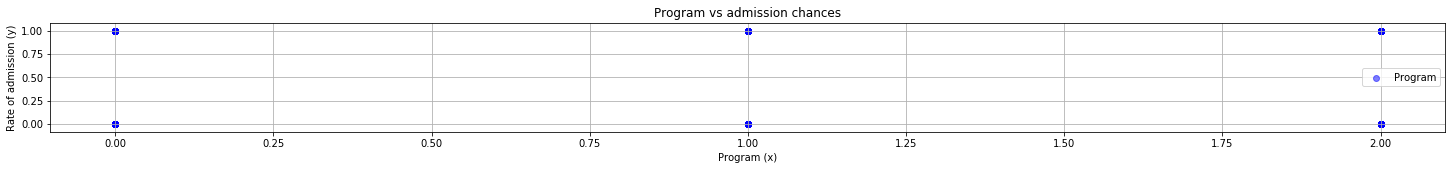

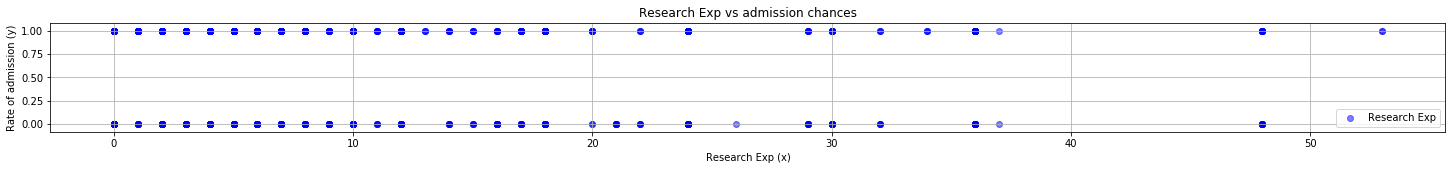

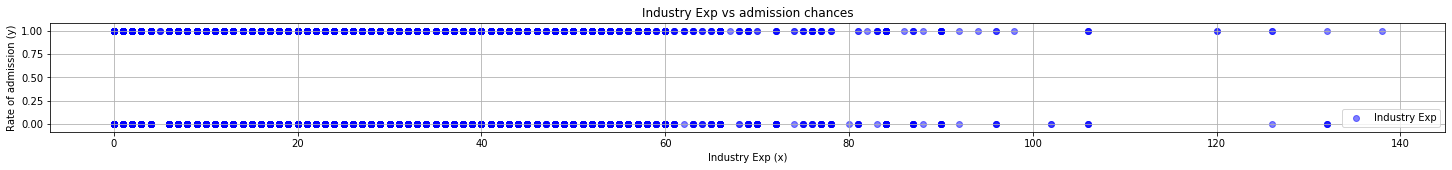

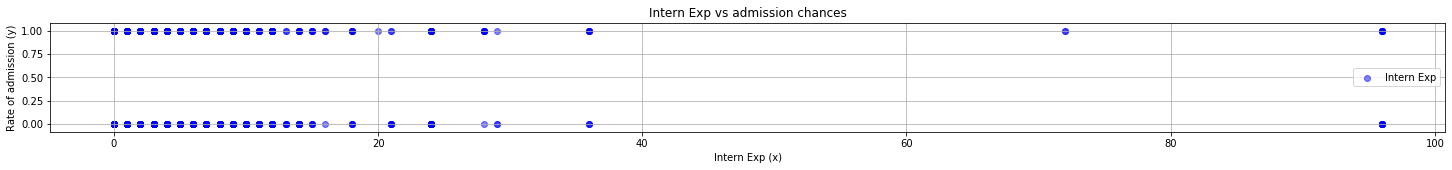

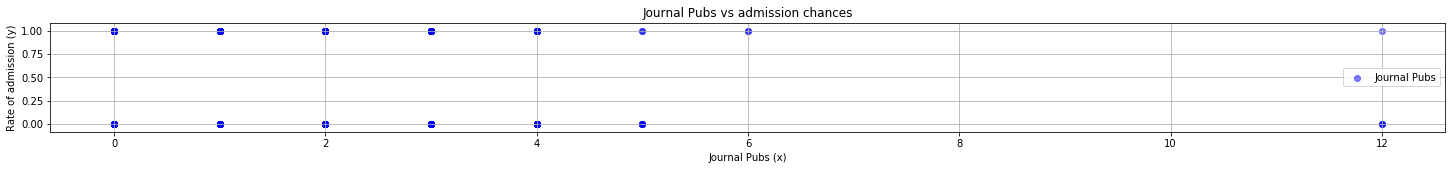

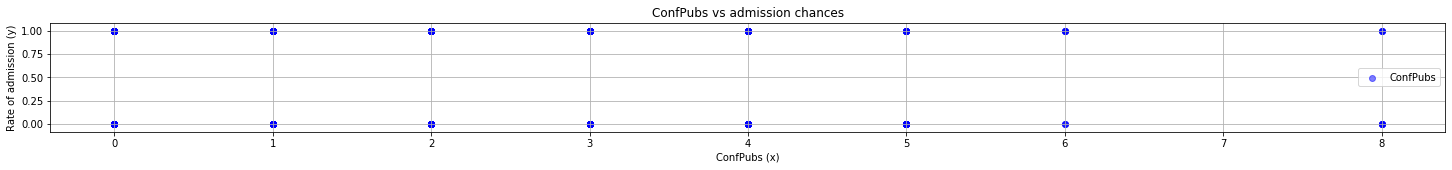

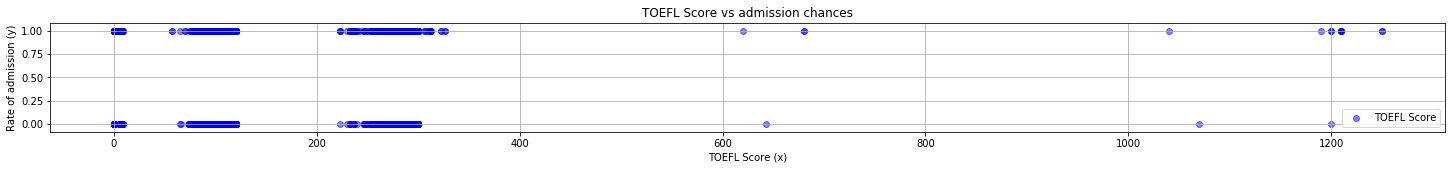

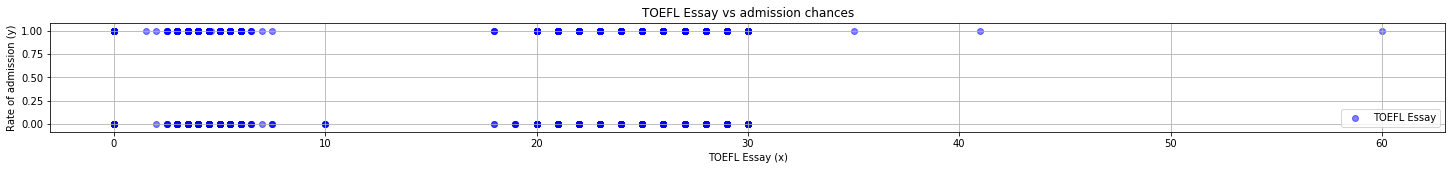

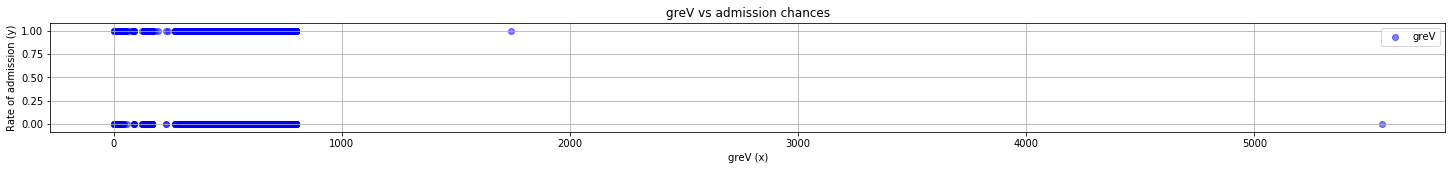

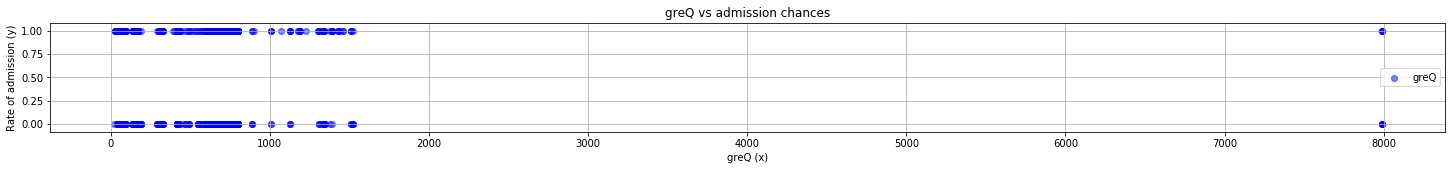

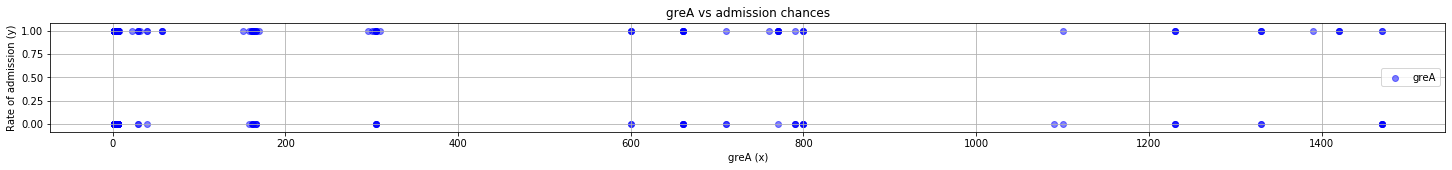

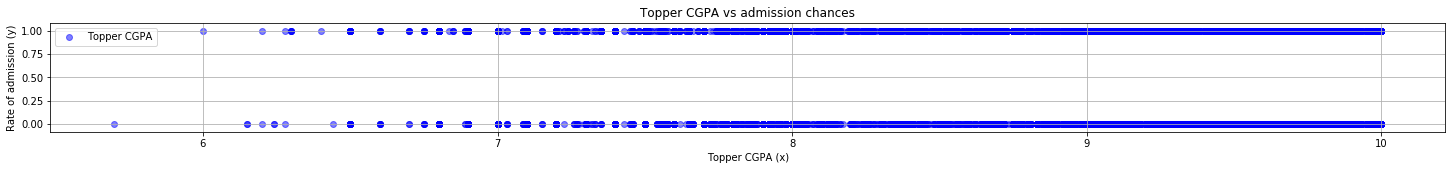

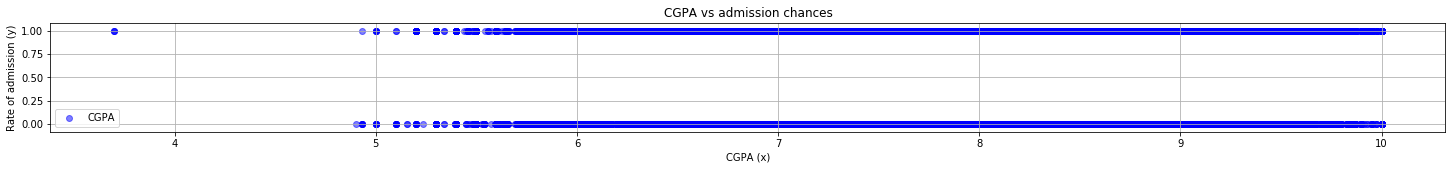

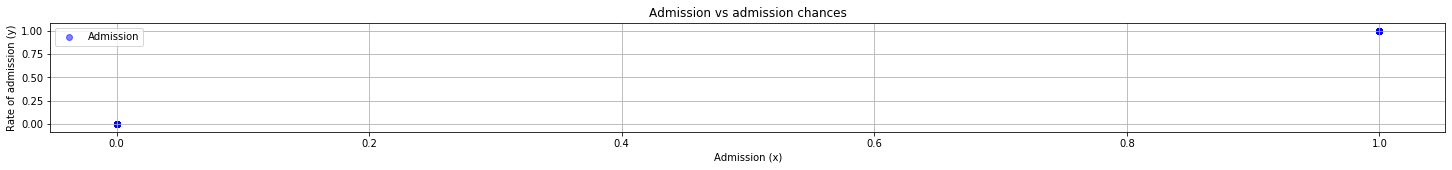

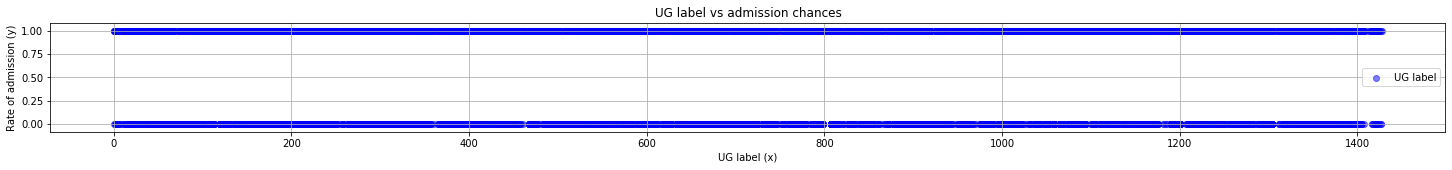

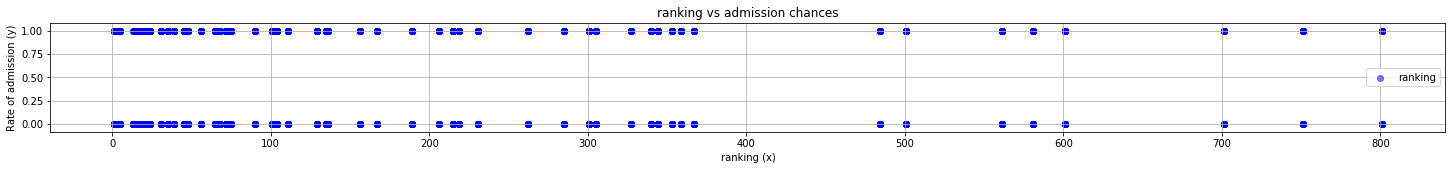

In [30]:
df_y = df['Admission']

# To check whether a column has very uneven distribution of class of y (0 or 1)
for i in range(len(df.columns)):
    plt.figure(i, figsize=(25,2))
    plt.title(df.columns[i] + ' vs admission chances')
    plt.scatter(df.iloc[:, i], df_y, c='blue', label=df.columns[i], alpha=0.5)
    plt.xlabel(df.columns[i] + ' (x)')
    plt.ylabel('Rate of admission (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
df['z'] = np.abs(stats.zscore(df['greQ']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_greQ.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 2)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


70 outliers removed.


In [32]:
df['z'] = np.abs(stats.zscore(df['greV']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_greV.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 2)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


231 outliers removed.


In [33]:
df['z'] = np.abs(stats.zscore(df['greA']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_greA.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 0.1)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


91 outliers removed.


In [34]:
df['z'] = np.abs(stats.zscore(df['TOEFL Essay']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_TOEFL Essay.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 2.5)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


2 outliers removed.


In [35]:
df['z'] = np.abs(stats.zscore(df['TOEFL Score']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_TOEFL Score.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 4.6)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


73 outliers removed.


In [36]:
df['z'] = np.abs(stats.zscore(df['Journal Pubs']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_Journal Pubs.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 4)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


402 outliers removed.


In [37]:
df['z'] = np.abs(stats.zscore(df['Intern Exp']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_Intern Exp.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 3)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


706 outliers removed.


In [38]:
df['z'] = np.abs(stats.zscore(df['Industry Exp']))
# print(df['z'].describe())
df['z'].to_csv(r'test/test_Industry Exp.csv')

# Outlier Removal
l = len(df)
df = df[~(df['z'] >= 4.2)]
l1 = len(df)
print(l-l1, 'outliers removed.')
df = df.drop(columns='z')

C:\Users\tanis_vt1gg0x\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


502 outliers removed.


In [39]:
df_y = df['Admission']
df = df.drop(columns='Admission')

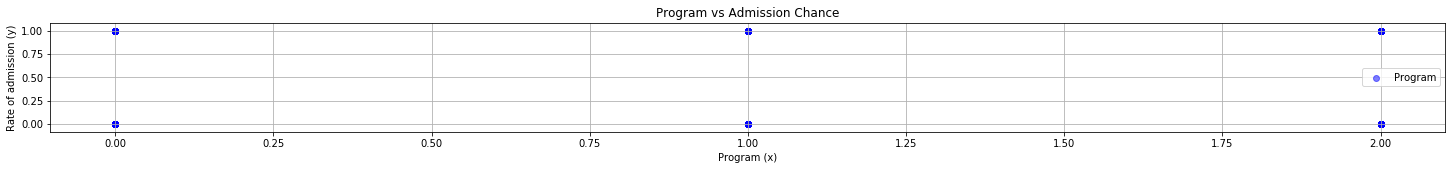

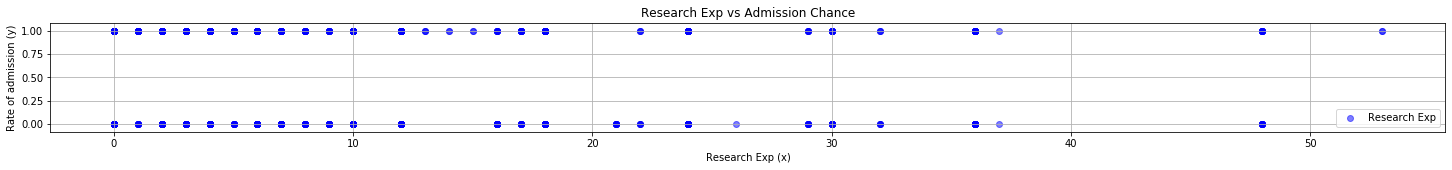

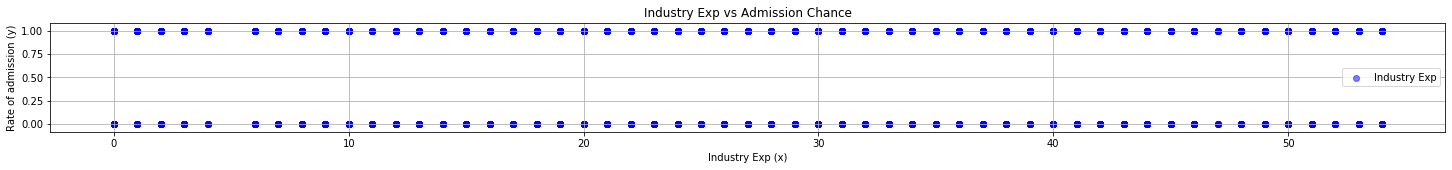

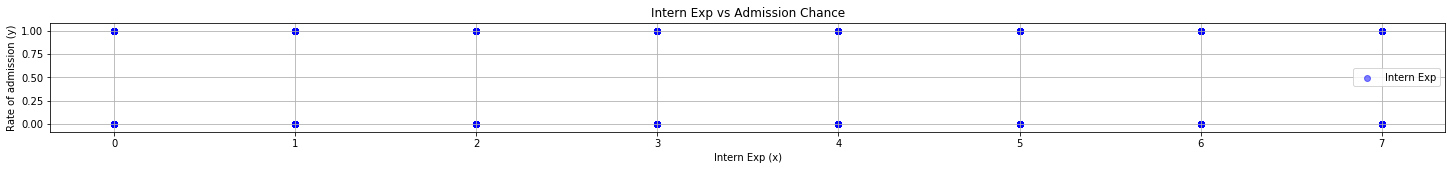

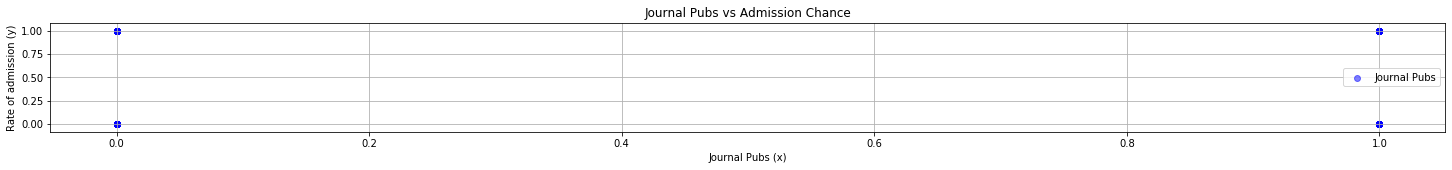

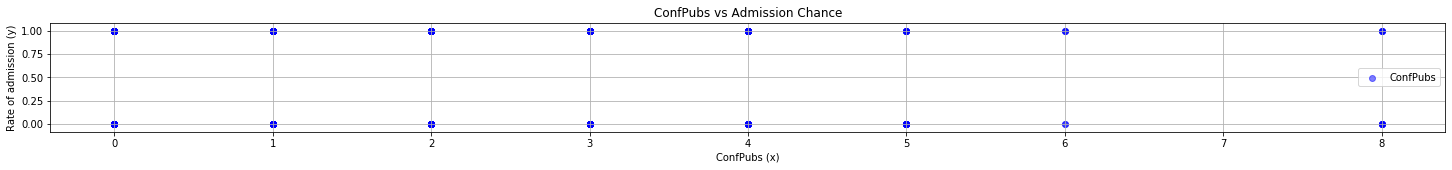

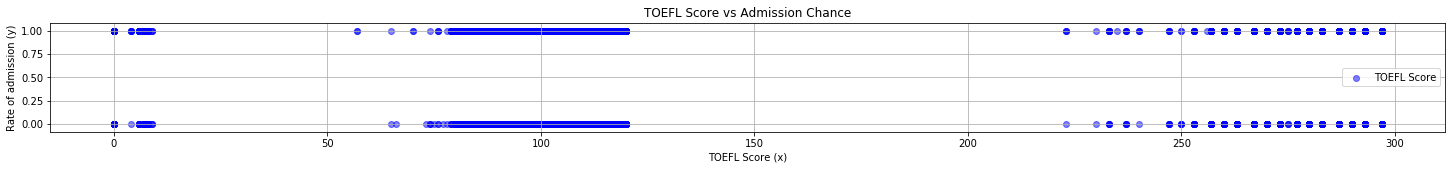

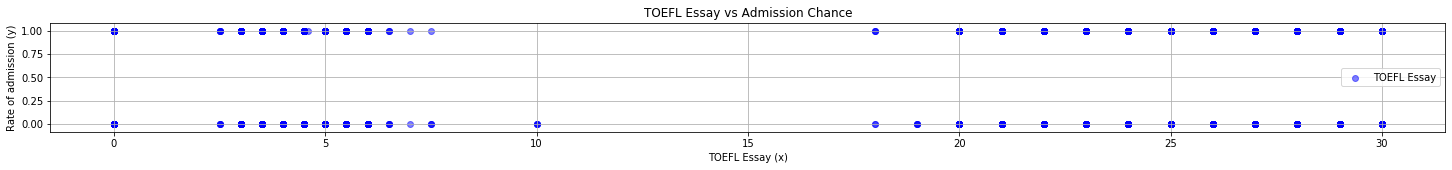

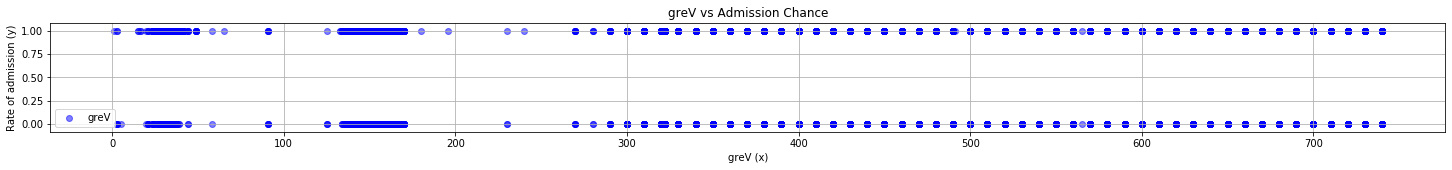

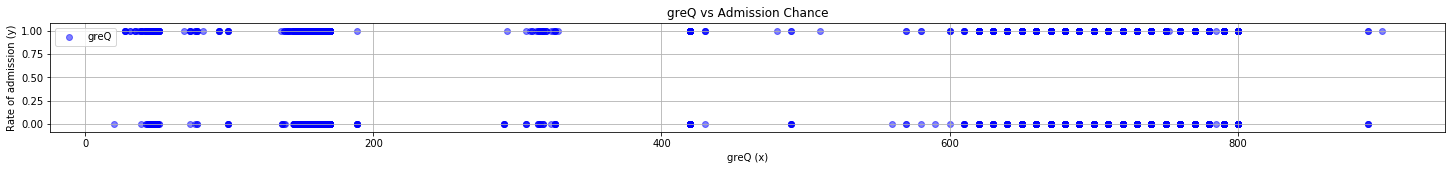

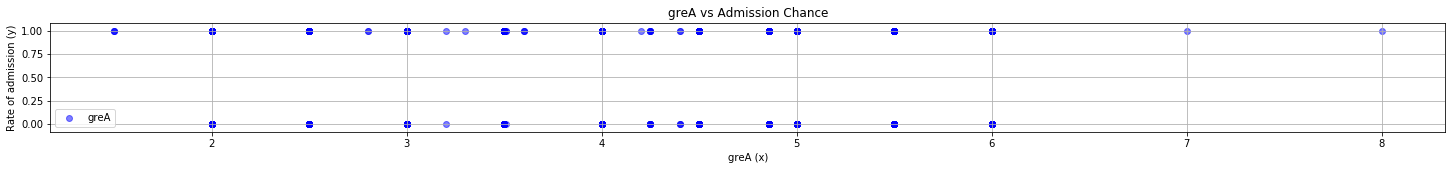

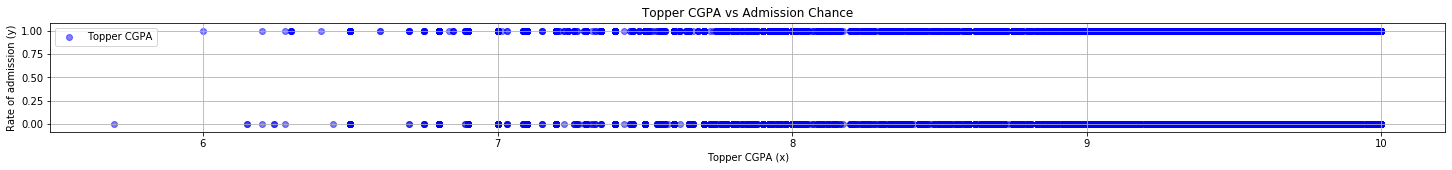

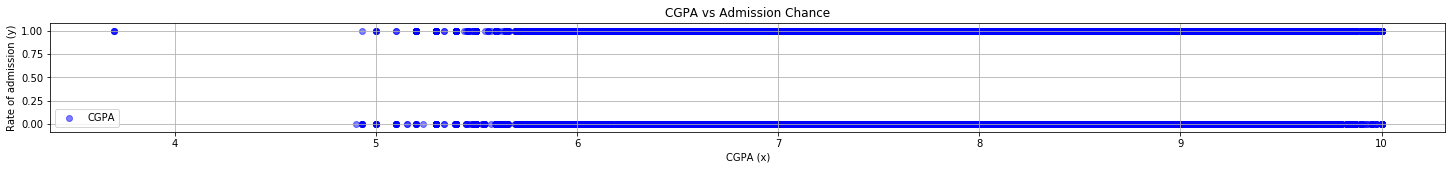

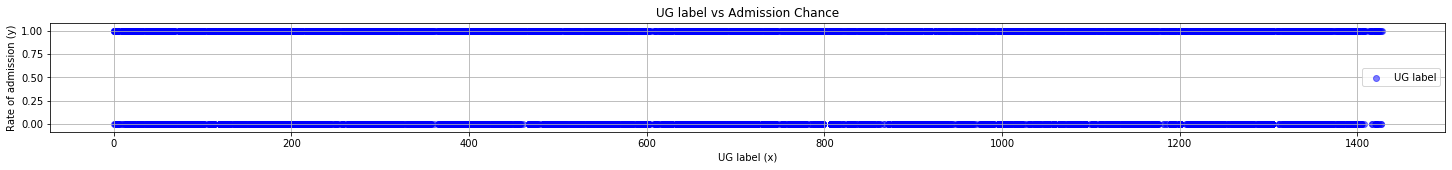

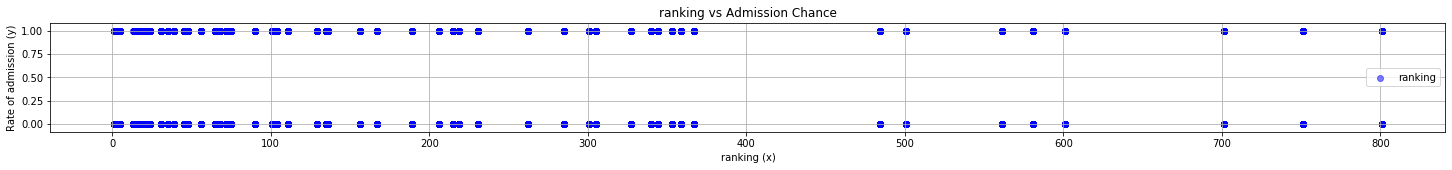

In [42]:
# To check whether a column has very uneven distribution of class of y (0 or 1) AGAIN!
for i in range(len(df.columns)):
    plt.figure(i, figsize=(25,2))
    plt.title(df.columns[i] + ' vs Admission Chance')
    plt.scatter(df.iloc[:, i], df_y, c='blue', label=df.columns[i], alpha=0.5)
    plt.xlabel(df.columns[i] + ' (x)')
    plt.ylabel('Rate of admission (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [43]:
df.to_csv(r'dataframe_preprocessed.csv')
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,751
1,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,129
2,0,0,0,0.0,0.0,0.0,101.0,0.0,430.0,740.0,4.5,7.227,7.227,0,601
3,0,0,0,0.0,0.0,0.0,91.0,0.0,144.0,157.0,3.0,7.300,5.611,0,601
4,0,0,0,0.0,0.0,0.0,0.0,0.0,149.0,157.0,3.0,8.500,7.710,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49591,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1401,189
49592,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1401,15
49593,0,0,0,0.0,0.0,0.0,102.0,0.0,680.0,800.0,3.0,9.275,9.200,1401,129
49594,0,0,0,0.0,0.0,0.0,112.0,0.0,154.0,169.0,3.0,9.000,8.700,1401,129


(47519, 16)


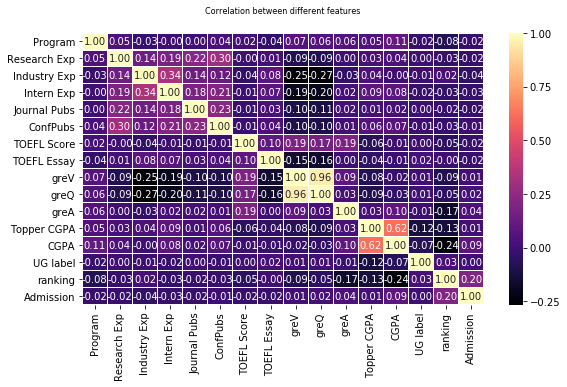

In [44]:
df['Admission'] = df_y

print(df.shape)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Correlation between different features', fontsize=8)
ax.title.set_position([0.5, 1.05])
# ax.axis('off')
seaborn.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()

In [45]:
df = shuffle(df)
df.reset_index(inplace=True)
df_y = df['Admission']
df = df.drop(columns=['index', 'Admission'])
df

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,9,24,3.0,0.0,1.0,114.0,0.0,157.0,164.0,4.0,9.50,8.860,734,72
1,0,0,0,0.0,0.0,0.0,104.0,0.0,152.0,162.0,2.5,8.80,7.760,469,167
2,0,0,0,0.0,0.0,0.0,111.0,0.0,153.0,163.0,4.0,9.00,8.417,899,129
3,0,0,0,0.0,0.0,0.0,104.0,0.0,510.0,730.0,4.0,8.50,7.200,469,344
4,0,0,0,0.0,0.0,0.0,0.0,0.0,139.0,161.0,3.0,9.70,8.000,1039,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,0,0,0,0.0,0.0,0.0,0.0,0.0,510.0,740.0,3.0,7.60,6.212,662,35
47515,0,0,0,0.0,0.0,0.0,98.0,27.0,152.0,165.0,4.0,9.43,9.110,907,129
47516,0,0,0,0.0,0.0,0.0,95.0,0.0,145.0,164.0,3.0,9.10,7.560,47,484
47517,0,0,0,0.0,0.0,0.0,110.0,0.0,620.0,780.0,3.5,8.30,7.970,228,167


In [47]:
df.replace([np.inf, -np.inf], np.nan).dropna()

,Program,Research Exp,Industry Exp,Intern Exp,Journal Pubs,ConfPubs,TOEFL Score,TOEFL Essay,greV,greQ,greA,Topper CGPA,CGPA,UG label,ranking
0,0,9,24,3.0,0.0,1.0,114.0,0.0,157.0,164.0,4.0,9.50,8.860,734,72
1,0,0,0,0.0,0.0,0.0,104.0,0.0,152.0,162.0,2.5,8.80,7.760,469,167
2,0,0,0,0.0,0.0,0.0,111.0,0.0,153.0,163.0,4.0,9.00,8.417,899,129
3,0,0,0,0.0,0.0,0.0,104.0,0.0,510.0,730.0,4.0,8.50,7.200,469,344
4,0,0,0,0.0,0.0,0.0,0.0,0.0,139.0,161.0,3.0,9.70,8.000,1039,501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47514,0,0,0,0.0,0.0,0.0,0.0,0.0,510.0,740.0,3.0,7.60,6.212,662,35
47515,0,0,0,0.0,0.0,0.0,98.0,27.0,152.0,165.0,4.0,9.43,9.110,907,129
47516,0,0,0,0.0,0.0,0.0,95.0,0.0,145.0,164.0,3.0,9.10,7.560,47,484
47517,0,0,0,0.0,0.0,0.0,110.0,0.0,620.0,780.0,3.5,8.30,7.970,228,167


In [48]:
l = len(df)

dfa = np.array(df[:(l//5)])
dfb = np.array(df[(l//5):(l*2)//5])
dfc = np.array(df[((2*l)//5):(l*3)//5])
dfd = np.array(df[((3*l)//5):(l*4)//5])
dfe = np.array(df[((4*l)//5):])

df_ya = np.array(df_y[:(l//5)])
df_yb = np.array(df_y[(l//5):(l*2)//5])
df_yc = np.array(df_y[((2*l)//5):(l*3)//5])
df_yd = np.array(df_y[((3*l)//5):(l*4)//5])
df_ye = np.array(df_y[((4*l)//5):])

dfbcde = np.concatenate((dfb,dfc,dfd,dfe))
dfacde = np.concatenate((dfa,dfc,dfd,dfe))
dfabde = np.concatenate((dfa,dfb,dfd,dfe))
dfabce = np.concatenate((dfa,dfb,dfc,dfe))
dfabcd = np.concatenate((dfa,dfb,dfc,dfd))

df_ybcde = np.concatenate((df_yb,df_yc,df_yd,df_ye))
df_yacde = np.concatenate((df_ya,df_yc,df_yd,df_ye))
df_yabde = np.concatenate((df_ya,df_yb,df_yd,df_ye))
df_yabce = np.concatenate((df_ya,df_yb,df_yc,df_ye))
df_yabcd = np.concatenate((df_ya,df_yb,df_yc,df_yd))

df_n = [dfbcde, dfacde, dfabde, dfabce, dfabcd]
df_y_n = [df_ybcde, df_yacde, df_yabde, df_yabce, df_yabcd]

In [49]:
print(len(dfa), len(dfb), len(dfc), len(dfd), len(dfe))
print(len(df_ya), len(df_yb), len(df_yc), len(df_yd), len(df_ye))
print(len(dfbcde), len(dfacde), len(dfabde), len(dfabce), len(dfabcd))
print(len(df_ybcde), len(df_yacde), len(df_yabde), len(df_yabce), len(df_yabcd))

9503 9504 9504 9504 9504
9503 9504 9504 9504 9504
38016 38015 38015 38015 38015
38016 38015 38015 38015 38015


In [53]:
# 5 folds
n_folds = 5

flag = 0
if flag == 1:
    
    knn1 = [KNeighborsClassifier(2)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        knn1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('knn1' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/knn1-'+str(n_folds), 'wb') as file:
            pickle.dump(knn1, file)
    
    
    knn2 = [KNeighborsClassifier(3)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        knn2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('knn2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/knn2-'+str(n_folds), 'wb') as file:
            pickle.dump(knn2, file)
    
    
    rfc1 = [RandomForestClassifier(n_estimators=10)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        rfc1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('rfc1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/rfc1-'+str(n_folds), 'wb') as file:
            pickle.dump(rfc1, file)
    
    
    rfc2 = [RandomForestClassifier(n_estimators=15)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        rfc2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('rfc2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/rfc2-'+str(n_folds), 'wb') as file:
            pickle.dump(rfc2, file)
    
    
    rfc3 = [RandomForestClassifier(n_estimators=1000)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        rfc3[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('rfc3' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/rfc3-'+str(n_folds), 'wb') as file:
            pickle.dump(rfc3, file)
    
    
    mlp1 = [MLPClassifier(alpha=0.5, max_iter=1000)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        mlp1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('mlp1' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/mlp1-'+str(n_folds), 'wb') as file:
            pickle.dump(mlp1, file)
    
    
    mlp2 = [MLPClassifier(alpha=0.5, max_iter=2000)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        mlp2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('mlp2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/mlp2-'+str(n_folds), 'wb') as file:
            pickle.dump(mlp2, file)
    
    
    logr1 = [LogisticRegression(penalty='l1',tol=0.01)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        logr1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('logr1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/logr1-'+str(n_folds), 'wb') as file:
            pickle.dump(logr1, file)

    
    logr2 = [LogisticRegression(penalty='l2',tol=0.01)]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        logr2[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('logr2' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/logr2-'+str(n_folds), 'wb') as file:
            pickle.dump(logr2, file)


    bnb1 = [BernoulliNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        bnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('bnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/bnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(bnb1, file)
    
    
    cnb1 = [ComplementNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        cnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('cnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/cnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(cnb1, file)

        
    gnb1 = [GaussianNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        gnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('gnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/gnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(gnb1, file)
        

    mnb1 = [MultinomialNB()]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        mnb1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('mnb1'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/mnb1-'+str(n_folds), 'wb') as file:
        pickle.dump(mnb1, file)


    svm1 = [svm.SVC(kernel='poly', degree=1)]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        svm1[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('svm1' + str(i+1) + ' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/svm1-'+str(n_folds), 'wb') as file:
        pickle.dump(svm1, file)
    
    
#     svm2 = [svm.SVC(kernel='poly', degree=2)]*(n_folds)
#     for i in range(n_folds):
#         start = time.time()
#         svm2[i].fit(df_n[i],df_y_n[i])
#         end = time.time()
#         print('svm2'+str(i+1)+' - Total Time: %.4f s' % (end-start))
#     with open('pickle-files/svm2-'+str(n_folds), 'wb') as file:
#             pickle.dump(svm2, file)
    
    
#     svm3 = [svm.SVC(kernel='poly', degree=3)]*(n_folds)
#     for i in range(n_folds):
#         start = time.time()
#         svm3[i].fit(df_n[i],df_y_n[i])
#         end = time.time()
#         print('svm3'+str(n_folds)+' - Total Time: %.4f s' % (end-start))
#     with open('pickle-files/svm3-'+str(n_folds), 'wb') as file:
#             pickle.dump(svm3, file)


#     svm4 = [svm.SVC(kernel='poly', degree=4)]*(n_folds)
#     for i in range(n_folds):
#         start = time.time()
#         svm4[i].fit(df_n[i],df_y_n[i])
#         end = time.time()
#         print('svm4'+str(n_folds)+' - Total Time: %.4f s' % (end-start))
#     with open('pickle-files/svm4-'+str(n_folds), 'wb') as file:
#             pickle.dump(svm4, file)
    
    
    svm5 = [svm.SVC(kernel='rbf', gamma='scale')]*(n_folds)
    for i in range(n_folds):    
        start = time.time()
        svm5[i].fit(df_n[i],df_y_n[i])
        end = time.time()
        print('svm5'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/svm5-'+str(n_folds), 'wb') as file:
            pickle.dump(svm5, file)
    
    
    svm6 = [svm.SVC(kernel='linear')]*(n_folds)
    for i in range(n_folds):
        start = time.time()
        svm6[i].fit(df_n[i],df_y_n[i]) 
        end = time.time()
        print('svm6'+str(i+1)+' - Total Time: %.4f s' % (end-start))
    with open('pickle-files/svm6-'+str(n_folds), 'wb') as file:
        pickle.dump(svm6, file) 

elif flag == 0:
    with open('pickle-files/svm1-'+str(n_folds), 'rb') as file:
        svm1 = pickle.load(file)    
#     with open('pickle-files/svm2-'+str(n_folds), 'rb') as file:
#         svm2 = pickle.load(file)
#     with open('pickle-files/svm3-'+str(n_folds), 'rb') as file:
#         svm3 = pickle.load(file)
#     with open('pickle-files/svm4-'+str(n_folds), 'rb') as file:
#         svm4 = pickle.load(file)
    with open('pickle-files/svm5-'+str(n_folds), 'rb') as file:
        svm5 = pickle.load(file)
    with open('pickle-files/svm6-'+str(n_folds), 'rb') as file:
        svm6 = pickle.load(file)
    with open('pickle-files/knn1-'+str(n_folds), 'rb') as file:
        knn1 = pickle.load(file)
    with open('pickle-files/knn2-'+str(n_folds), 'rb') as file:
        knn2 = pickle.load(file)
    with open('pickle-files/rfc1-'+str(n_folds), 'rb') as file:
        rfc1 = pickle.load(file)
    with open('pickle-files/rfc2-'+str(n_folds), 'rb') as file:
        rfc2 = pickle.load(file)
    with open('pickle-files/rfc3-'+str(n_folds), 'rb') as file:
        rfc3 = pickle.load(file)
    with open('pickle-files/mlp1-'+str(n_folds), 'rb') as file:
        mlp1 = pickle.load(file)
    with open('pickle-files/mlp2-'+str(n_folds), 'rb') as file:
        mlp2 = pickle.load(file)
    with open('pickle-files/logr1-'+str(n_folds), 'rb') as file:
        logr1 = pickle.load(file)
    with open('pickle-files/logr2-'+str(n_folds), 'rb') as file:
        logr2 = pickle.load(file)
    with open('pickle-files/bnb1-'+str(n_folds), 'rb') as file:
        bnb1 = pickle.load(file)
    with open('pickle-files/cnb1-'+str(n_folds), 'rb') as file:
        cnb1 = pickle.load(file)
    with open('pickle-files/gnb1-'+str(n_folds), 'rb') as file:
        gnb1 = pickle.load(file)
    with open('pickle-files/mnb1-'+str(n_folds), 'rb') as file:
        mnb1 = pickle.load(file)

In [57]:
# Testing Accuracy:
        
svm1_predy = []
svm2_predy = []
svm3_predy = []
svm4_predy = []
svm5_predy = []
svm6_predy = []
knn1_predy = []
knn2_predy = []
rfc1_predy = []
rfc2_predy = []
rfc3_predy = []
mlp1_predy = []
mlp2_predy = []
logr1_predy = []
logr2_predy = []
bnb1_predy = []
cnb1_predy = []
gnb1_predy = []
mnb1_predy = []
        
for i,a in zip(range(n_folds), [dfa, dfb, dfc, dfd, dfe]):
    svm1_predy += [svm1[i].predict(a)]
#     svm2_predy += [svm2[i].predict(a)]
#     svm3_predy += [svm3[i].predict(a)]
#     svm4_predy += [svm4[i].predict(a)]
    svm5_predy += [svm5[i].predict(a)]
    svm6_predy += [svm6[i].predict(a)]
    knn1_predy += [knn1[i].predict(a)]
    knn2_predy += [knn2[i].predict(a)]
    rfc1_predy += [rfc1[i].predict(a)]
    rfc2_predy += [rfc2[i].predict(a)]
    rfc3_predy += [rfc3[i].predict(a)]
    mlp1_predy += [mlp1[i].predict(a)]
    mlp2_predy += [mlp2[i].predict(a)]
    logr1_predy += [logr1[i].predict(a)]
    logr2_predy += [logr2[i].predict(a)]
    bnb1_predy += [bnb1[i].predict(a)]
    cnb1_predy += [cnb1[i].predict(a)]
    gnb1_predy += [gnb1[i].predict(a)]
    mnb1_predy += [mnb1[i].predict(a)]

svm1_acc = []
svm2_acc = []
svm3_acc = []
svm4_acc = []
svm5_acc = []
svm6_acc = []
knn1_acc = []
knn2_acc = []
rfc1_acc = []
rfc2_acc = []
rfc3_acc = []
mlp1_acc = []
mlp2_acc = []
logr1_acc = []
logr2_acc = []
bnb1_acc = []
cnb1_acc = []
gnb1_acc = []
mnb1_acc = []

for i,fold in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    svm1_acc += [accuracy_score(fold, svm1_predy[i])]
#     svm2_acc += [accuracy_score(fold, svm2_predy[i])]
#     svm3_acc += [accuracy_score(fold, svm3_predy[i])]
#     svm4_acc += [accuracy_score(fold, svm4_predy[i])]
    svm5_acc += [accuracy_score(fold, svm5_predy[i])]
    svm6_acc += [accuracy_score(fold, svm6_predy[i])]
    knn1_acc += [accuracy_score(fold, knn1_predy[i])]
    knn2_acc += [accuracy_score(fold, knn2_predy[i])]
    rfc1_acc += [accuracy_score(fold, rfc1_predy[i])]
    rfc2_acc += [accuracy_score(fold, rfc2_predy[i])]
    rfc3_acc += [accuracy_score(fold, rfc3_predy[i])]
    mlp1_acc += [accuracy_score(fold, mlp1_predy[i])]
    mlp2_acc += [accuracy_score(fold, mlp2_predy[i])]
    logr1_acc += [accuracy_score(fold, logr1_predy[i])]
    logr2_acc += [accuracy_score(fold, logr2_predy[i])]
    bnb1_acc += [accuracy_score(fold, bnb1_predy[i])]
    cnb1_acc += [accuracy_score(fold, cnb1_predy[i])]
    gnb1_acc += [accuracy_score(fold, gnb1_predy[i])]
    mnb1_acc += [accuracy_score(fold, mnb1_predy[i])]
    
    print('SVM1'+str(i+1), svm1_acc[i])
#     print('SVM2'+str(i+1), svm2_acc[i])
#     print('SVM3'+str(i+1), svm3_acc[i])
#     print('SVM4'+str(i+1), svm4_acc[i])
    print('SVM5'+str(i+1), svm5_acc[i])
    print('SVM6'+str(i+1), svm6_acc[i])
    print('KNN1'+str(i+1), knn1_acc[i])
    print('KNN2'+str(i+1), knn2_acc[i])
    print('RFC1'+str(i+1), rfc1_acc[i])
    print('RFC2'+str(i+1), rfc2_acc[i])
    print('RFC3'+str(i+1), rfc3_acc[i])
    print('MLP1'+str(i+1), mlp1_acc[i])
    print('MLP2'+str(i+1), mlp2_acc[i])
    print('LOGR1'+str(i+1), logr1_acc[i])
    print('LOGR2'+str(i+1), logr2_acc[i])
    print('BNB1'+str(i+1), bnb1_acc[i])
    print('CNB1'+str(i+1), cnb1_acc[i])
    print('GNB1'+str(i+1), gnb1_acc[i])
    print('MNB1'+str(i+1), mnb1_acc[i])

SVM11 0.6074923708302641
SVM51 0.5884457539724297
SVM61 0.6066505314111333
KNN11 0.7918552036199095
KNN21 0.7938545722403452
RFC11 0.9833736714721667
RFC21 0.993686204356519
RFC31 0.9998947700726086
MLP11 0.5698200568241608
MLP21 0.5466694727980638
LOGR11 0.6091760496685257
LOGR21 0.573503104282858
BNB11 0.5301483741976218
CNB11 0.5638219509628538
GNB11 0.5382510786067558
MNB11 0.5636114911080712
SVM12 0.609006734006734
SVM52 0.5843855218855218
SVM62 0.6063762626262627
KNN12 0.79503367003367
KNN22 0.7896675084175084
RFC12 0.9835858585858586
RFC22 0.9923190235690236
RFC32 0.9997895622895623
MLP12 0.5550294612794613
MLP22 0.5629208754208754
LOGR12 0.60753367003367
LOGR22 0.5817550505050505
BNB12 0.5316708754208754
CNB12 0.5674452861952862
GNB12 0.5360900673400674
MNB12 0.5674452861952862
SVM13 0.6021675084175084
SVM53 0.5823863636363636
SVM63 0.6060606060606061
KNN13 0.7908249158249159
KNN23 0.7891414141414141
RFC13 0.9816919191919192
RFC23 0.9943181818181818
RFC33 1.0
MLP13 0.5577651515

In [58]:
arr = [svm1_predy, svm2_predy, svm3_predy, svm4_predy, svm5_predy, svm6_predy, knn1_predy, knn2_predy, rfc1_predy, rfc2_predy, rfc3_predy, mlp1_predy, mlp2_predy, logr1_predy, logr2_predy, bnb1_predy, cnb1_predy, gnb1_predy, mnb1_predy]
with open('pickle-files/testing_predy', 'wb') as file:
    pickle.dump(arr, file)

In [59]:
# Training Accuracy:

svm1_predy_train = []
svm2_predy_train = []
svm3_predy_train = []
svm4_predy_train = []
svm5_predy_train = []
svm6_predy_train = []
knn1_predy_train = []
knn2_predy_train = []
rfc1_predy_train = []
rfc2_predy_train = []
rfc3_predy_train = []
mlp1_predy_train = []
mlp2_predy_train = []
logr1_predy_train = []
logr2_predy_train = []
bnb1_predy_train = []
cnb1_predy_train = []
gnb1_predy_train = []
mnb1_predy_train = []

for i in range(n_folds):
    svm1_predy_train += [svm1[i].predict(df_n[i])]
#     svm2_predy_train += [svm2[i].predict(df_n[i])]
#     svm3_predy_train += [svm3[i].predict(df_n[i])]
#     svm4_predy_train += [svm4[i].predict(df_n[i])]
    svm5_predy_train += [svm5[i].predict(df_n[i])]
    svm6_predy_train += [svm6[i].predict(df_n[i])]
    knn1_predy_train += [knn1[i].predict(df_n[i])]
    knn2_predy_train += [knn2[i].predict(df_n[i])]
    rfc1_predy_train += [rfc1[i].predict(df_n[i])]
    rfc2_predy_train += [rfc2[i].predict(df_n[i])]
    rfc3_predy_train += [rfc3[i].predict(df_n[i])]
    mlp1_predy_train += [mlp1[i].predict(df_n[i])]
    mlp2_predy_train += [mlp2[i].predict(df_n[i])]
    logr1_predy_train += [logr1[i].predict(df_n[i])]
    logr2_predy_train += [logr2[i].predict(df_n[i])]
    bnb1_predy_train += [bnb1[i].predict(df_n[i])]
    cnb1_predy_train += [cnb1[i].predict(df_n[i])]
    gnb1_predy_train += [gnb1[i].predict(df_n[i])]
    mnb1_predy_train += [mnb1[i].predict(df_n[i])]

svm1_acc_train = []
svm2_acc_train = []
svm3_acc_train = []
svm4_acc_train = []
svm5_acc_train = []
svm6_acc_train = []
knn1_acc_train = []
knn2_acc_train = []
rfc1_acc_train = []
rfc2_acc_train = []
rfc3_acc_train = []
mlp1_acc_train = []
mlp2_acc_train = []
logr1_acc_train = []
logr2_acc_train = []
bnb1_acc_train = []
cnb1_acc_train = []
gnb1_acc_train = []
mnb1_acc_train = []

for i in range(n_folds):
    svm1_acc_train += [accuracy_score(df_y_n[i], svm1_predy_train[i])]
#     svm2_acc_train += [accuracy_score(df_y_n[i], svm2_predy_train[i])]
#     svm3_acc_train += [accuracy_score(df_y_n[i], svm3_predy_train[i])]
#     svm4_acc_train += [accuracy_score(df_y_n[i], svm4_predy_train[i])]
    svm5_acc_train += [accuracy_score(df_y_n[i], svm5_predy_train[i])]
    svm6_acc_train += [accuracy_score(df_y_n[i], svm6_predy_train[i])]
    knn1_acc_train += [accuracy_score(df_y_n[i], knn1_predy_train[i])]
    knn2_acc_train += [accuracy_score(df_y_n[i], knn2_predy_train[i])]
    rfc1_acc_train += [accuracy_score(df_y_n[i], rfc1_predy_train[i])]
    rfc2_acc_train += [accuracy_score(df_y_n[i], rfc2_predy_train[i])]
    rfc3_acc_train += [accuracy_score(df_y_n[i], rfc3_predy_train[i])]
    mlp1_acc_train += [accuracy_score(df_y_n[i], mlp1_predy_train[i])]
    mlp2_acc_train += [accuracy_score(df_y_n[i], mlp2_predy_train[i])]
    logr1_acc_train += [accuracy_score(df_y_n[i], logr1_predy_train[i])]
    logr2_acc_train += [accuracy_score(df_y_n[i], logr2_predy_train[i])]
    bnb1_acc_train += [accuracy_score(df_y_n[i], bnb1_predy_train[i])]
    cnb1_acc_train += [accuracy_score(df_y_n[i], cnb1_predy_train[i])]
    gnb1_acc_train += [accuracy_score(df_y_n[i], gnb1_predy_train[i])]
    mnb1_acc_train += [accuracy_score(df_y_n[i], mnb1_predy_train[i])]
    
    
    print('SVM1'+str(i+1), svm1_acc_train[i])
#     print('SVM2'+str(i+1), svm2_acc_train[i])
#     print('SVM3'+str(i+1), svm3_acc_train[i])
#     print('SVM4'+str(i+1), svm4_acc_train[i])
    print('SVM5'+str(i+1), svm5_acc_train[i])
    print('SVM6'+str(i+1), svm6_acc_train[i])
    print('KNN1'+str(i+1), knn1_acc_train[i])
    print('KNN2'+str(i+1), knn2_acc_train[i])
    print('RFC1'+str(i+1), rfc1_acc_train[i])
    print('RFC2'+str(i+1), rfc2_acc_train[i])
    print('RFC3'+str(i+1), rfc3_acc_train[i])
    print('MLP1'+str(i+1), mlp1_acc_train[i])
    print('MLP2'+str(i+1), mlp2_acc_train[i])
    print('LOGR1'+str(i+1), logr1_acc_train[i])
    print('LOGR2'+str(i+1), logr2_acc_train[i])
    print('BNB1'+str(i+1), bnb1_acc_train[i])
    print('CNB1'+str(i+1), cnb1_acc_train[i])
    print('GNB1'+str(i+1), gnb1_acc_train[i])
    print('MNB1'+str(i+1), mnb1_acc_train[i])

SVM11 0.6076388888888888
SVM51 0.585385101010101
SVM61 0.6063762626262627
KNN11 0.7346906565656566
KNN21 0.7378998316498316
RFC11 0.8938078703703703
RFC21 0.9056186868686869
RFC31 0.9121685606060606
MLP11 0.55697601010101
MLP21 0.5526094276094277
LOGR11 0.6072443181818182
LOGR21 0.5791771885521886
BNB11 0.5288036616161617
CNB11 0.5666561447811448
GNB11 0.5357218013468014
MNB11 0.5666298400673401
SVM12 0.607260291990004
SVM52 0.586400105221623
SVM62 0.6064448244114166
KNN12 0.7338945153228988
KNN22 0.7389451532289886
RFC12 0.89375246613179
RFC22 0.9059581744048402
RFC32 0.9121925555701696
MLP12 0.5606734183874786
MLP22 0.5485466263317111
LOGR12 0.6076548730764172
LOGR22 0.5771142969880311
BNB12 0.528422990924635
CNB12 0.5657503616993292
GNB12 0.5362620018413784
MNB12 0.5656714454820465
SVM13 0.6089701433644614
SVM53 0.5868999079310798
SVM63 0.6065237406286992
KNN13 0.7349467315533342
KNN23 0.7390766802577929
RFC13 0.894225963435486
RFC23 0.9054583716953833
RFC33 0.9121399447586479
MLP13

In [60]:
arr = [svm1_predy_train, svm2_predy_train, svm3_predy_train, svm4_predy_train, svm5_predy_train, svm6_predy_train, knn1_predy_train, knn2_predy_train, rfc1_predy_train, rfc2_predy_train, rfc3_predy_train, mlp1_predy_train, mlp2_predy_train, logr1_predy_train, logr2_predy_train, bnb1_predy_train, cnb1_predy_train, gnb1_predy_train, mnb1_predy_train]
with open('pickle-files/training_predy', 'wb') as file:
    pickle.dump(arr, file)

In [61]:
print("Average Training Accuracy SVM1:", sum(svm1_acc_train)/n_folds)
# print("Average Training Accuracy SVM2:", sum(svm2_acc_train)/n_folds)
# print("Average Training Accuracy SVM3:", sum(svm3_acc_train)/n_folds)
# print("Average Training Accuracy SVM4:", sum(svm4_acc_train)/n_folds)
print("Average Training Accuracy SVM5:", sum(svm5_acc_train)/n_folds)
print("Average Training Accuracy SVM6:", sum(svm6_acc_train)/n_folds)
print("Average Training Accuracy KNN1:", sum(knn1_acc_train)/n_folds)
print("Average Training Accuracy KNN2:", sum(knn2_acc_train)/n_folds)
print("Average Training Accuracy RFC1:", sum(rfc1_acc_train)/n_folds)
print("Average Training Accuracy RFC2:", sum(rfc2_acc_train)/n_folds)
print("Average Training Accuracy RFC3:", sum(rfc3_acc_train)/n_folds)
print("Average Training Accuracy MLP1:", sum(mlp1_acc_train)/n_folds)
print("Average Training Accuracy MLP2:", sum(mlp2_acc_train)/n_folds)
print("Average Training Accuracy LOGR1:", sum(logr1_acc_train)/n_folds)
print("Average Training Accuracy LOGR2:", sum(logr2_acc_train)/n_folds)
print("Average Training Accuracy BNB1:", sum(bnb1_acc_train)/n_folds)
print("Average Training Accuracy CNB1:", sum(cnb1_acc_train)/n_folds)
print("Average Training Accuracy GNB1:", sum(gnb1_acc_train)/n_folds)
print("Average Training Accuracy MNB1:", sum(mnb1_acc_train)/n_folds)

print("Average Testing Accuracy SVM1:", sum(svm1_acc)/n_folds)
# print("Average Testing Accuracy SVM2:", sum(svm2_acc)/n_folds)
# print("Average Testing Accuracy SVM3:", sum(svm3_acc)/n_folds)
# print("Average Testing Accuracy SVM4:", sum(svm4_acc)/n_folds)
print("Average Testing Accuracy SVM5:", sum(svm5_acc)/n_folds)
print("Average Testing Accuracy SVM6:", sum(svm6_acc)/n_folds)
print("Average Testing Accuracy KNN1:", sum(knn1_acc)/n_folds)
print("Average Testing Accuracy KNN2:", sum(knn2_acc)/n_folds)
print("Average Testing Accuracy RFC1:", sum(rfc1_acc)/n_folds)
print("Average Testing Accuracy RFC2:", sum(rfc2_acc)/n_folds)
print("Average Testing Accuracy RFC3:", sum(rfc3_acc)/n_folds)
print("Average Testing Accuracy MLP1:", sum(mlp1_acc)/n_folds)
print("Average Testing Accuracy MLP2:", sum(mlp2_acc)/n_folds)
print("Average Testing Accuracy LOGR1:", sum(logr1_acc)/n_folds)
print("Average Testing Accuracy LOGR2:", sum(logr2_acc)/n_folds)
print("Average Testing Accuracy BNB1:", sum(bnb1_acc)/n_folds)
print("Average Testing Accuracy CNB1:", sum(cnb1_acc)/n_folds)
print("Average Testing Accuracy GNB1:", sum(gnb1_acc)/n_folds)
print("Average Testing Accuracy MNB1:", sum(mnb1_acc)/n_folds)

Average Training Accuracy SVM1: 0.6076095875896941
Average Training Accuracy SVM5: 0.585997183295536
Average Training Accuracy SVM6: 0.6064311120543857
Average Training Accuracy KNN1: 0.746122663734544
Average Training Accuracy KNN2: 0.7490898966206411
Average Training Accuracy RFC1: 0.9117196169518854
Average Training Accuracy RFC2: 0.9232308003751841
Average Training Accuracy RFC3: 0.9297124178952487
Average Training Accuracy MLP1: 0.559544616724924
Average Training Accuracy MLP2: 0.5514215303989076
Average Training Accuracy LOGR1: 0.6076306339901715
Average Training Accuracy LOGR2: 0.5780424612537759
Average Training Accuracy BNB1: 0.5290725829085275
Average Training Accuracy CNB1: 0.5660893507502577
Average Training Accuracy GNB1: 0.5362276168785935
Average Training Accuracy MNB1: 0.5660262179148228
Average Testing Accuracy SVM1: 0.6076095852771639
Average Testing Accuracy SVM5: 0.5859972316025667
Average Testing Accuracy SVM6: 0.6064311163832368
Average Testing Accuracy KNN1: 0.74

In [62]:
# F1 Scores

svm1_f1 = []
svm2_f1 = []
svm3_f1 = []
svm4_f1 = []
svm5_f1 = []
svm6_f1 = []
knn1_f1 = []
knn2_f1 = []
rfc1_f1 = []
rfc2_f1 = []
rfc3_f1 = []
mlp1_f1 = []
mlp2_f1 = []
logr1_f1 = []
logr2_f1 = []
bnb1_f1 = []
cnb1_f1 = []
gnb1_f1 = []
mnb1_f1 = []

for i,fold in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    svm1_f1 += [f1_score(fold, svm1_predy[i])]
#     svm2_f1 += [f1_score(fold, svm2_predy[i])]
#     svm3_f1 += [f1_score(fold, svm3_predy[i])]
#     svm4_f1 += [f1_score(fold, svm4_predy[i])]
    svm5_f1 += [f1_score(fold, svm5_predy[i])]
    svm6_f1 += [f1_score(fold, svm6_predy[i])]
    knn1_f1 += [f1_score(fold, knn1_predy[i])]
    knn2_f1 += [f1_score(fold, knn2_predy[i])]
    rfc1_f1 += [f1_score(fold, rfc1_predy[i])]
    rfc2_f1 += [f1_score(fold, rfc2_predy[i])]
    rfc3_f1 += [f1_score(fold, rfc3_predy[i])]
    mlp1_f1 += [f1_score(fold, mlp1_predy[i])]
    mlp2_f1 += [f1_score(fold, mlp2_predy[i])]
    logr1_f1 += [f1_score(fold, logr1_predy[i])]
    logr2_f1 += [f1_score(fold, logr2_predy[i])]
    bnb1_f1 += [f1_score(fold, bnb1_predy[i])]
    cnb1_f1 += [f1_score(fold, cnb1_predy[i])]
    gnb1_f1 += [f1_score(fold, gnb1_predy[i])]
    mnb1_f1 += [f1_score(fold, mnb1_predy[i])]
    
    print('SVM1'+str(i+1), svm1_f1[i])
#     print('SVM2'+str(i+1), svm2_f1[i])
#     print('SVM3'+str(i+1), svm3_f1[i])
#     print('SVM4'+str(i+1), svm4_f1[i])
    print('SVM5'+str(i+1), svm5_f1[i])
    print('SVM6'+str(i+1), svm6_f1[i])
    print('KNN1'+str(i+1), knn1_f1[i])
    print('KNN2'+str(i+1), knn2_f1[i])
    print('RFC1'+str(i+1), rfc1_f1[i])
    print('RFC2'+str(i+1), rfc2_f1[i])
    print('RFC3'+str(i+1), rfc3_f1[i])
    print('MLP1'+str(i+1), mlp1_f1[i])
    print('MLP2'+str(i+1), mlp1_f1[i])
    print('LOGR1'+str(i+1), logr1_f1[i])
    print('LOGR2'+str(i+1), logr2_f1[i])
    print('BNB1'+str(i+1), bnb1_f1[i])
    print('CNB1'+str(i+1), cnb1_f1[i])
    print('GNB1'+str(i+1), gnb1_f1[i])
    print('MNB1'+str(i+1), mnb1_f1[i])

SVM11 0.5993555316863587
SVM51 0.619367396593674
SVM61 0.6052798310454066
KNN11 0.7478327383987762
KNN21 0.8024205748865356
RFC11 0.983771569433032
RFC21 0.9938925081433225
RFC31 0.9998981773750127
MLP11 0.6183719193427931
MLP21 0.6183719193427931
LOGR11 0.6172712283594394
LOGR21 0.5863863659557098
BNB11 0.6487847085660348
CNB11 0.5497990659280982
GNB11 0.658627664540221
MNB11 0.5497774400173705
SVM12 0.5941459152468327
SVM52 0.6123650637880276
SVM62 0.5973522763965128
KNN12 0.7444240356861717
KNN22 0.793427715200992
RFC12 0.9835408313990294
RFC22 0.9923680083638264
RFC32 0.999791013584117
MLP12 0.5961226243911757
MLP22 0.5961226243911757
LOGR12 0.6081109476780837
LOGR22 0.5902484279971137
BNB12 0.6460437375745527
CNB12 0.5453942275793432
GNB12 0.6535166994106091
MNB12 0.5454947484798232
SVM13 0.5904906314307377
SVM53 0.6105387106270239
SVM63 0.5994865211810012
KNN13 0.7426870308050738
KNN23 0.7950501124974433
RFC13 0.9819126819126819
RFC23 0.9944364310735628
RFC33 1.0
MLP13 0.60142247

In [63]:
print('Average F1-Score SVM1:', sum(svm1_f1)/n_folds)
# print('Average F1-Score SVM2:', sum(svm2_f1)/n_folds)
# print('Average F1-Score SVM3:', sum(svm3_f1)/n_folds)
# print('Average F1-Score SVM4:', sum(svm4_f1)/n_folds)
print('Average F1-Score SVM5:', sum(svm5_f1)/n_folds)
print('Average F1-Score SVM6:', sum(svm6_f1)/n_folds)
print('Average F1-Score KNN1:', sum(knn1_f1)/n_folds)
print('Average F1-Score KNN2:', sum(knn2_f1)/n_folds)
print('Average F1-Score RFC1:', sum(rfc1_f1)/n_folds)
print('Average F1-Score RFC2:', sum(rfc2_f1)/n_folds)
print('Average F1-Score RFC3:', sum(rfc3_f1)/n_folds)
print('Average F1-Score MLP1:', sum(mlp1_f1)/n_folds)
print('Average F1-Score MLP2:', sum(mlp2_f1)/n_folds)
print('Average F1-Score LOGR1:', sum(logr1_f1)/n_folds)
print('Average F1-Score LOGR2:', sum(logr2_f1)/n_folds)
print('Average F1-Score BNB1:', sum(bnb1_f1)/n_folds)
print('Average F1-Score CNB1:', sum(cnb1_f1)/n_folds)
print('Average F1-Score GNB1:', sum(gnb1_f1)/n_folds)
print('Average F1-Score MNB1:', sum(mnb1_f1)/n_folds)

Average F1-Score SVM1: 0.5969831649160654
Average F1-Score SVM5: 0.6159569873509847
Average F1-Score SVM6: 0.60251201988176
Average F1-Score KNN1: 0.6870344304803542
Average F1-Score KNN2: 0.7559497773574819
Average F1-Score RFC1: 0.9082755157490794
Average F1-Score RFC2: 0.9243178993272847
Average F1-Score RFC3: 0.9308059342129484
Average F1-Score MLP1: 0.6047104849544358
Average F1-Score MLP2: 0.3469185394650039
Average F1-Score LOGR1: 0.613297968430816
Average F1-Score LOGR2: 0.5899559051186138
Average F1-Score BNB1: 0.6463562414522679
Average F1-Score CNB1: 0.5503491769024302
Average F1-Score GNB1: 0.6556832455394807
Average F1-Score MNB1: 0.5504486552510104


In [64]:
# estimators = []
# for i in range(n_folds):
# #     estimators += ('psvm', svm1[i])
# #     estimators += ('psvm', svm2[i])
# #     estimators += ('psvm', svm3[i])
# #     estimators += ('psvm', svm4[i])
#     estimators += ('rsvm', svm5[i])
# #     estimators += ('lsvm', svm6[i])
#     estimators += ('knn', knn1[i])
#     estimators += ('knn', knn2[i])
#     estimators += ('rf', rfc1[i])
#     estimators += ('rf', rfc2[i])
#     estimators += ('rf', rfc3[i])
#     estimators += ('mlp', mlp1[i])
#     estimators += ('mlp', mlp2[i])
#     estimators += ('lr', logr1[i])
#     estimators += ('lr', logr2[i])
#     estimators += ('bnb', bnb1[i])
#     estimators += ('cnb', cnb1[i])
#     estimators += ('gnb', gnb1[i])
#     estimators += ('mnb', mnb1[i])
# vclf1 = VotingClassifier(estimators=estimators,  voting='hard')
# vclf2 = VotingClassifier(estimators=estimators,  voting='soft')

# vclf1.fit()

# vclf1_pred = []
# vclf2_pred = []
# vclf1_pred_train = []
# vclf2_pred_train = []

# for i in range(n_folds):
#     vclf1_pred_train += [vclf1.predict(df_n[i])]
#     vclf2_pred_train += [vclf2.predict(df_n[i])]
# for i in [dfa, dfb, dfc, dfd, dfe]:
#     vclf1_pred += [vclf1.predict(i)]
#     vclf2_pred += [vclf2.predict(i)]
    
# for ind, i in zip(range(n_folds), [dfa, dfb, dfc, dfd, dfe]):
#     print('Hard Voting Classifier, Fold ' + str(i+1) + ' :', accuracy_score(fold, vclf1_pred[i]))
#     print('Soft Voting Classifier, Fold ' + str(i+1) + ' :', accuracy_score(fold, vclf2_pred[i]))
# for i in range(n_folds):
#     print('Hard Voting Classifier, Fold ' + str(i+1) + ' :', f1_score(df_yn[i], vclf1_pred_train[i]))
#     print('Soft Voting Classifier, Fold ' + str(i+1) + ' :', f1_score(df_yn[i], vclf2_pred_train[i]))

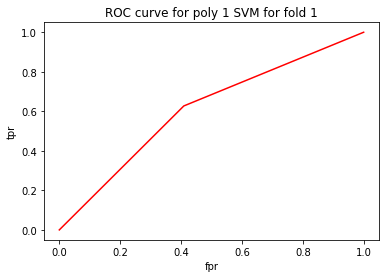

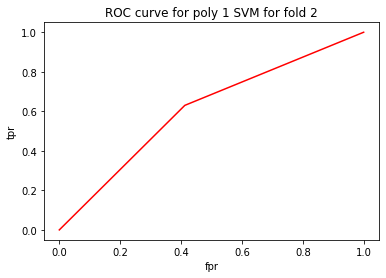

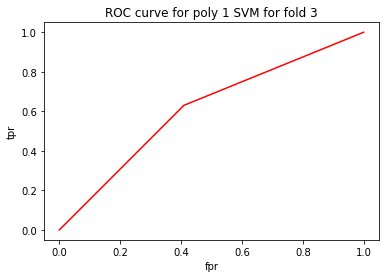

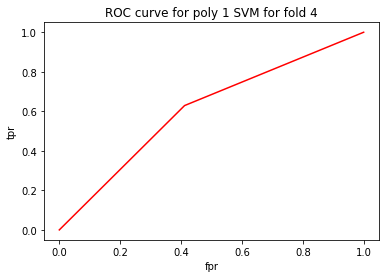

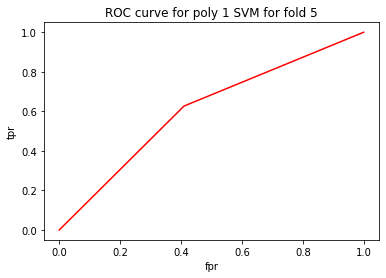

In [65]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(svm1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for poly 1 SVM for fold ' + str(i+1))
    plt.show()

In [66]:
# for i in range(n_folds):
#     fpr, tpr, _ = roc_curve(svm2_predy_train[i], df_y_n[i], drop_intermediate=False)
#     plt.plot(fpr, tpr, color='red')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.title('ROC curve for poly 2 SVM for fold ' + str(i+1))
#     plt.show()

In [67]:
# for i in range(n_folds):
#     fpr, tpr, _ = roc_curve(svm3_predy_train[i], df_y_n[i], drop_intermediate=False)
#     plt.plot(fpr, tpr, color='red')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.title('ROC curve for poly 3 SVM for fold ' + str(i+1))
#     plt.show()

In [68]:
# for i in range(n_folds):
#     fpr, tpr, _ = roc_curve(svm4_predy_train[i], df_y_n[i], drop_intermediate=False)
#     plt.plot(fpr, tpr, color='red')
#     plt.xlabel('fpr')
#     plt.ylabel('tpr')
#     plt.title('ROC curve for poly 4 SVM for fold ' + str(i+1))
#     plt.show()

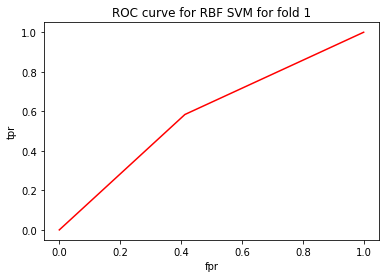

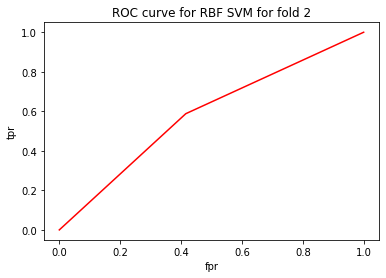

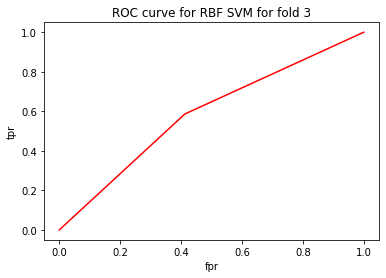

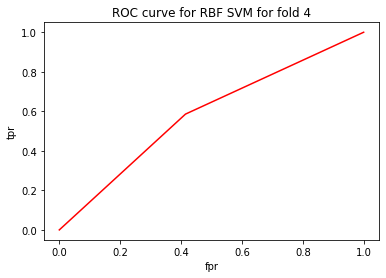

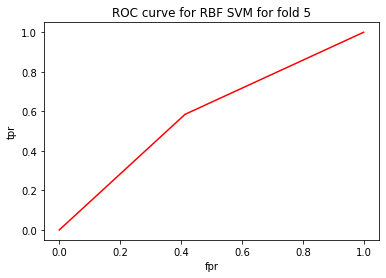

In [69]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(svm5_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for RBF SVM for fold ' + str(i+1))
    plt.show()

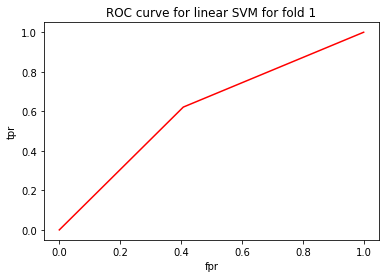

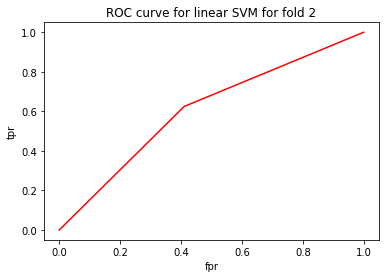

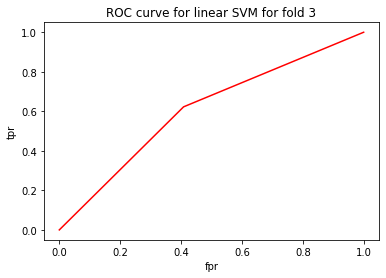

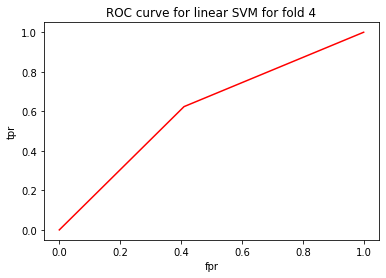

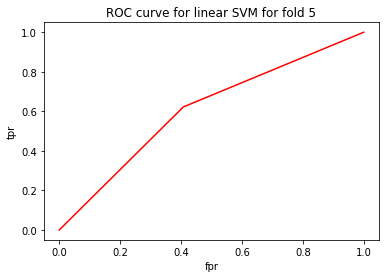

In [70]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(svm6_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for linear SVM for fold ' + str(i+1))
    plt.show()

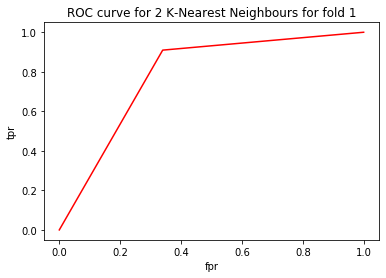

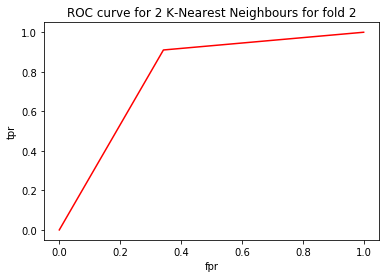

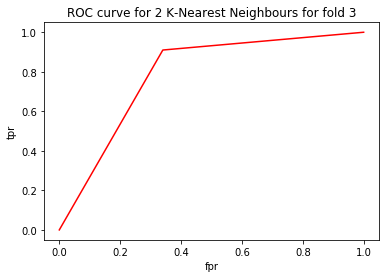

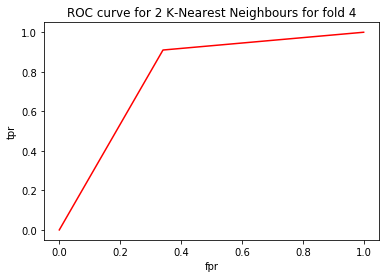

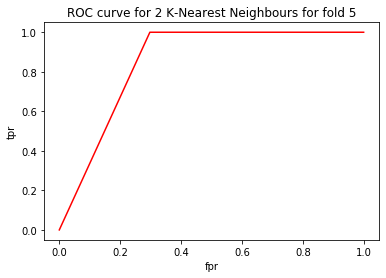

In [71]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(knn1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 2 K-Nearest Neighbours for fold ' + str(i+1))
    plt.show()

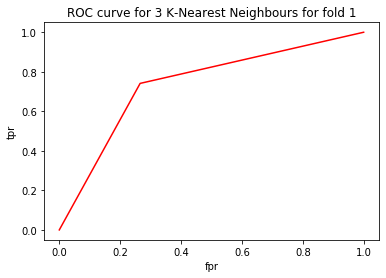

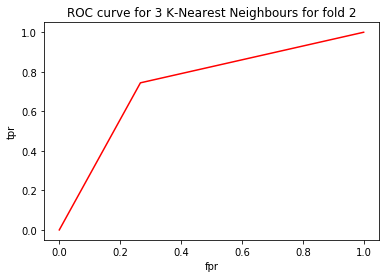

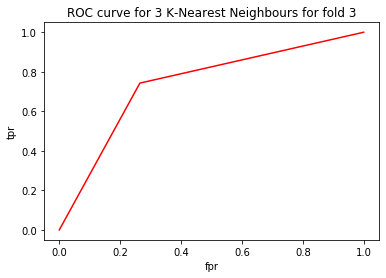

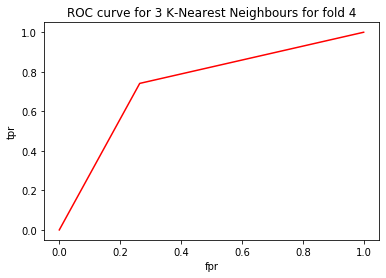

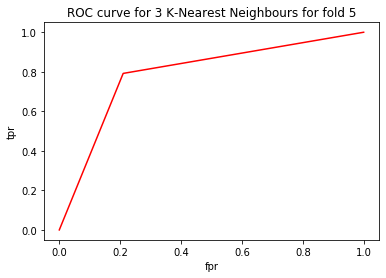

In [72]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(knn2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 3 K-Nearest Neighbours for fold ' + str(i+1))
    plt.show()

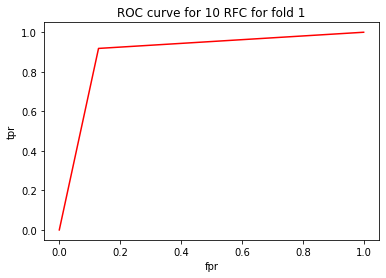

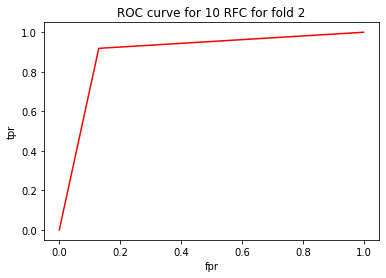

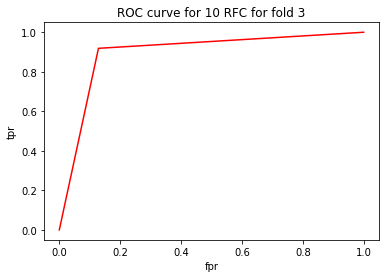

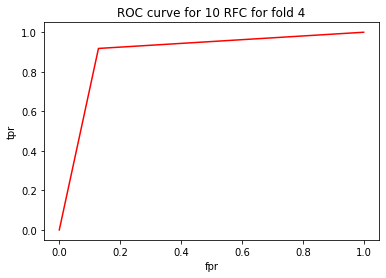

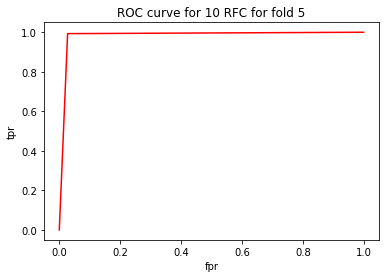

In [73]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(rfc1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 10 RFC for fold ' + str(i+1))
    plt.show()

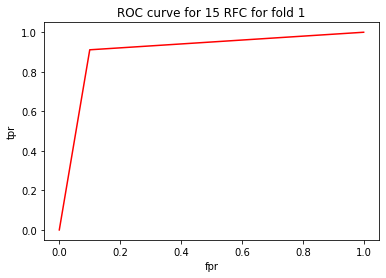

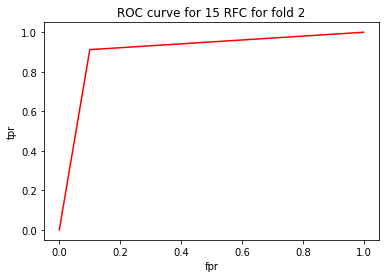

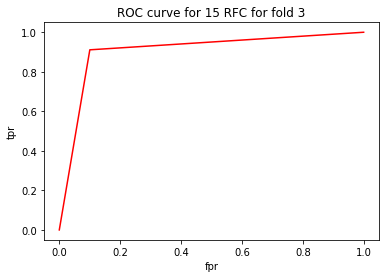

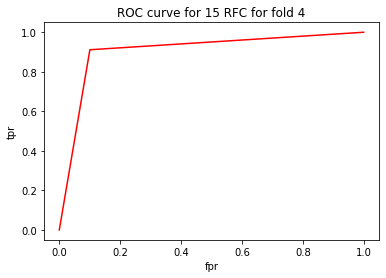

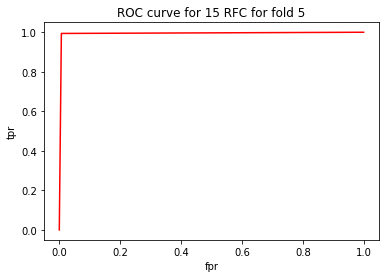

In [74]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(rfc2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 15 RFC for fold ' + str(i+1))
    plt.show()

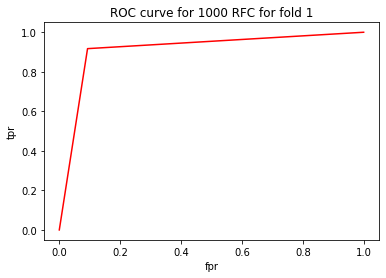

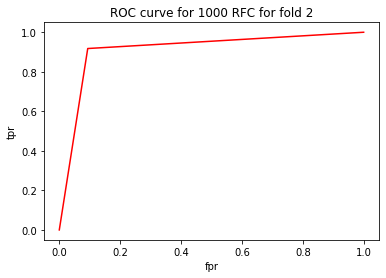

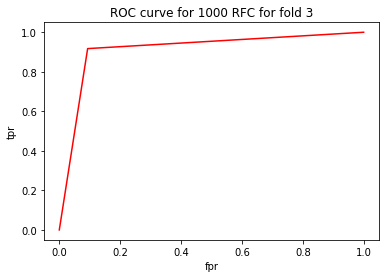

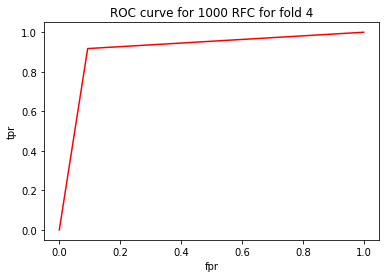

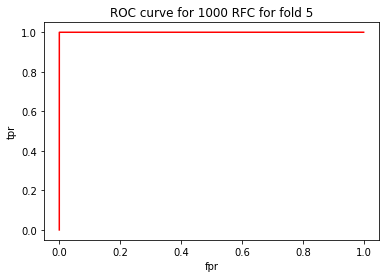

In [75]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(rfc3_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 1000 RFC for fold ' + str(i+1))
    plt.show()

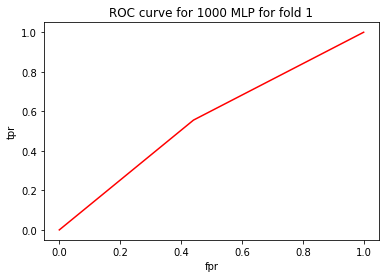

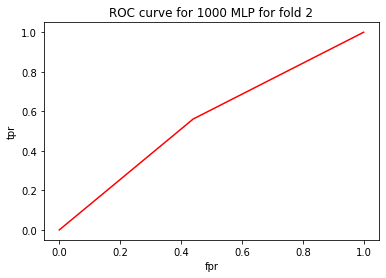

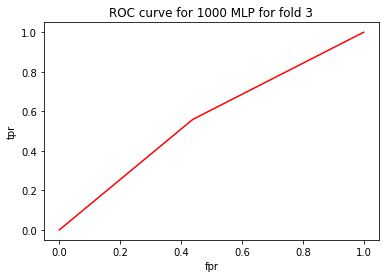

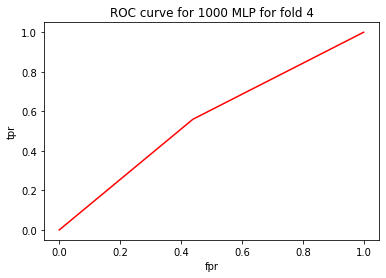

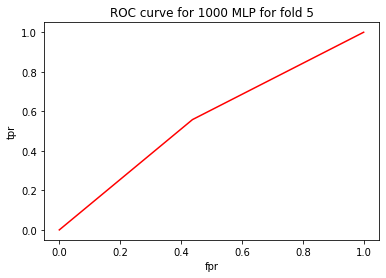

In [76]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(mlp1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 1000 MLP for fold ' + str(i+1))
    plt.show()

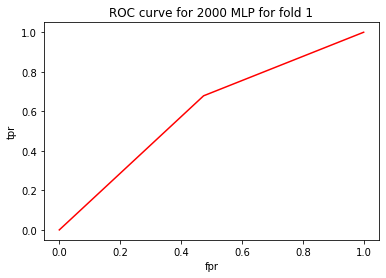

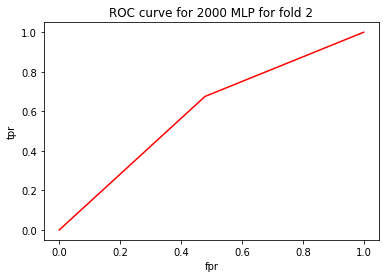

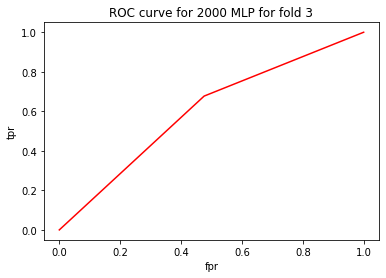

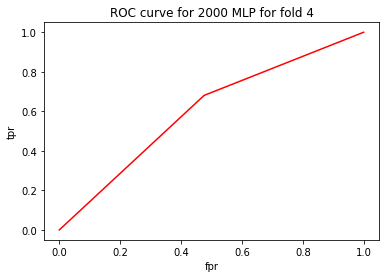

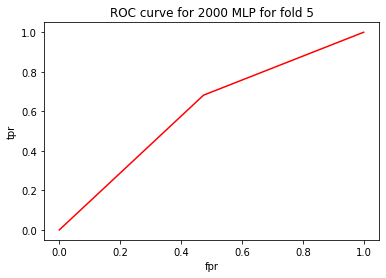

In [77]:
for i in range(n_folds):    
    fpr, tpr, _ = roc_curve(mlp2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for 2000 MLP for fold ' + str(i+1))
    plt.show()

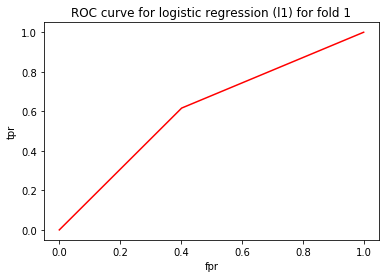

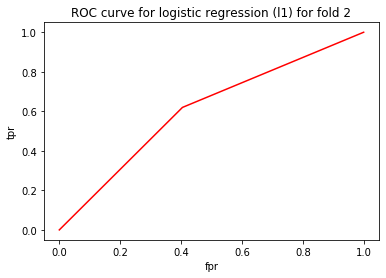

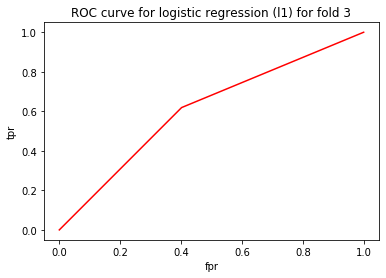

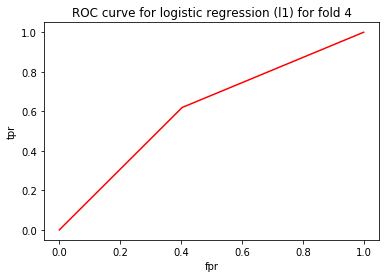

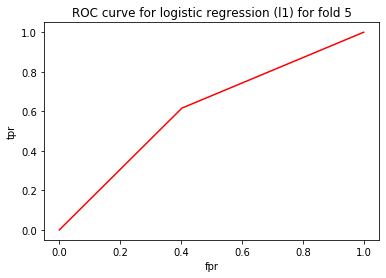

In [78]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(logr1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for logistic regression (l1) for fold ' + str(i+1))
    plt.show()

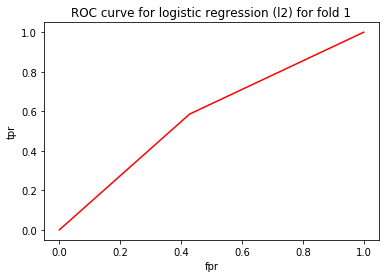

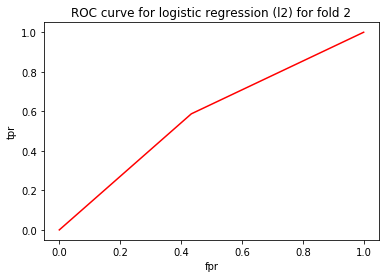

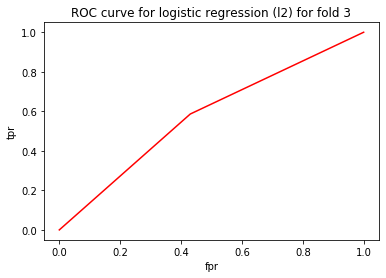

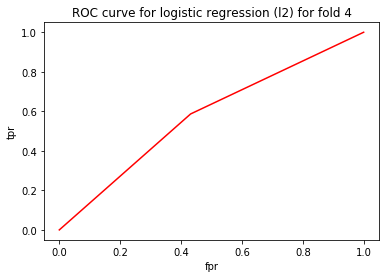

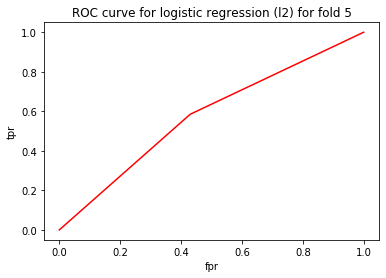

In [79]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(logr2_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for logistic regression (l2) for fold ' + str(i+1))
    plt.show()

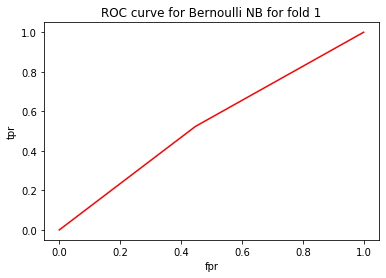

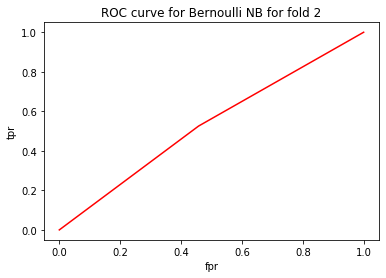

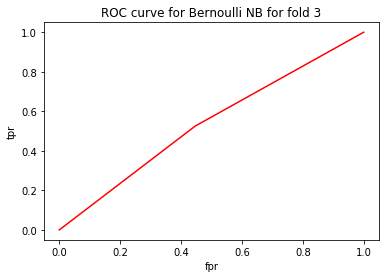

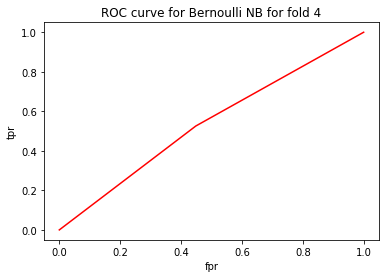

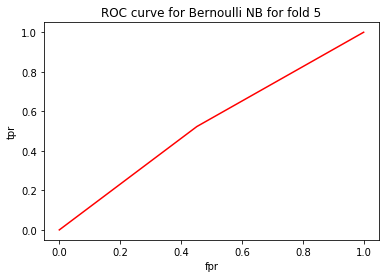

In [80]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(bnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Bernoulli NB for fold ' + str(i+1))
    plt.show()

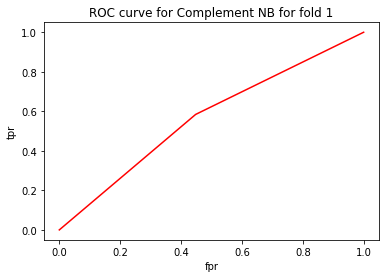

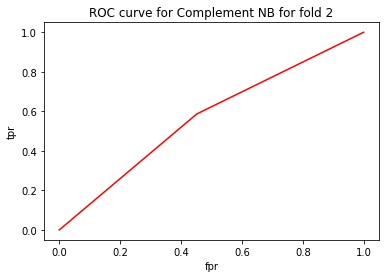

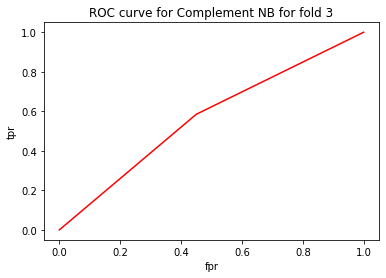

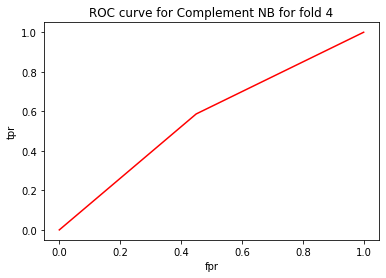

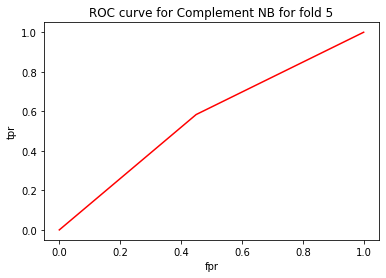

In [81]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(cnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Complement NB for fold ' + str(i+1))
    plt.show()

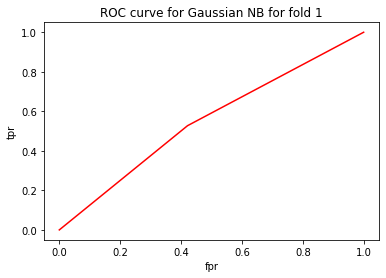

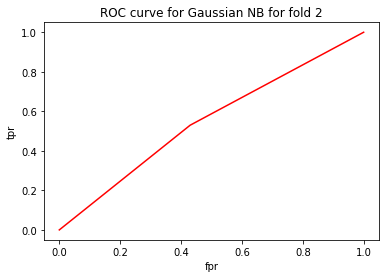

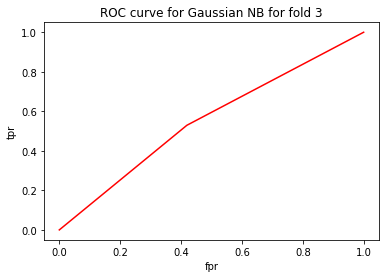

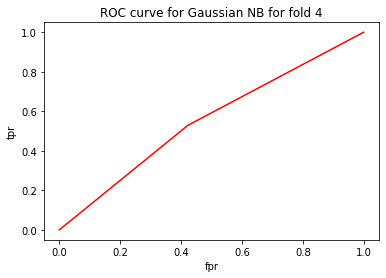

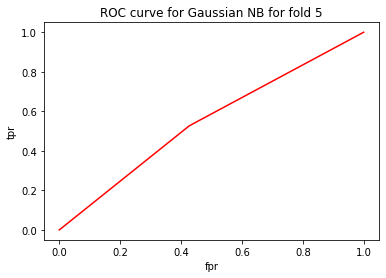

In [82]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(gnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Gaussian NB for fold ' + str(i+1))
    plt.show()

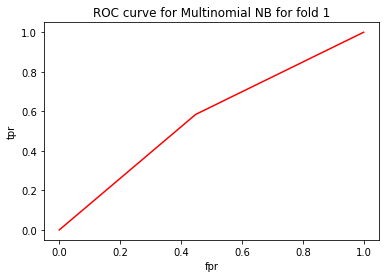

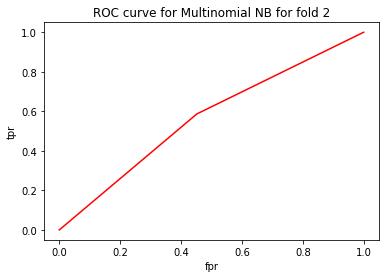

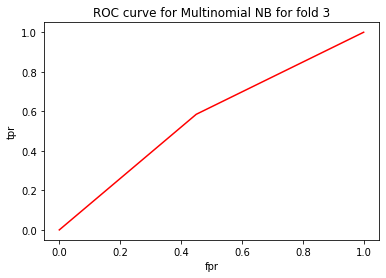

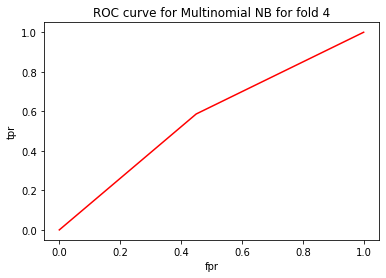

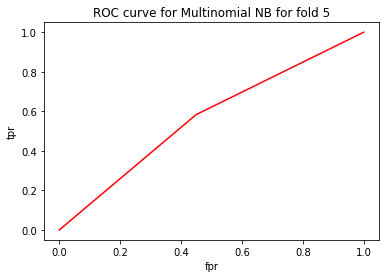

In [83]:
for i in range(n_folds):
    fpr, tpr, _ = roc_curve(mnb1_predy_train[i], df_y_n[i], drop_intermediate=False)
    plt.plot(fpr, tpr, color='red')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for Multinomial NB for fold ' + str(i+1))
    plt.show()

In [84]:
# Testing Data Confusion Matrices:

[[2983 1609]
 [2121 2790]]
[[3068 1651]
 [2065 2720]]
[[2997 1650]
 [2131 2726]]
[[2997 1666]
 [2045 2796]]
[[3017 1586]
 [2122 2779]]


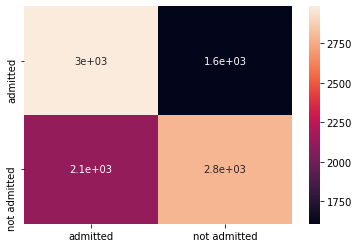

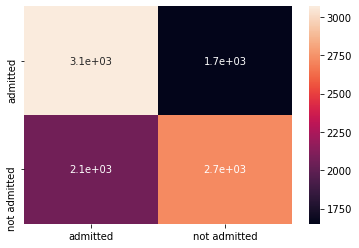

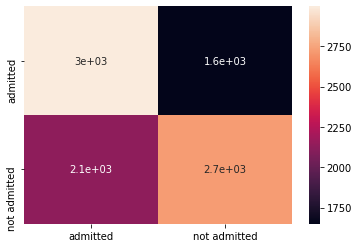

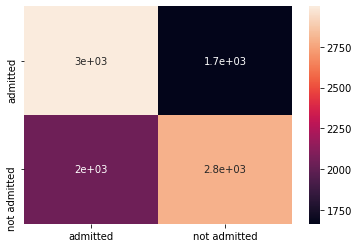

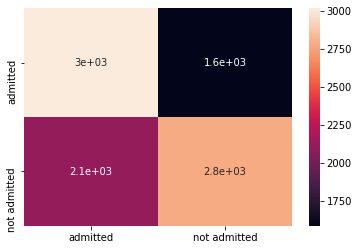

In [85]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm1 = confusion_matrix(y, svm1_predy[i])
    print(cm1)
    cm1df = pd.DataFrame(cm1, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm1df, annot=True)

In [86]:
# for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
#     fig = plt.figure(i+1)
#     cm2 = confusion_matrix(y, svm2_predy[i])
#     print(cm2)
#     cm2df = pd.DataFrame(cm2, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
#     seaborn.heatmap(cm2df, annot=True)

In [87]:
# for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
#     fig = plt.figure(i+1)
#     cm3 = confusion_matrix(y, svm3_predy[i])
#     print(cm3)
#     cm3df = pd.DataFrame(cm3, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
#     seaborn.heatmap(cm3df, annot=True)

In [88]:
# for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
#     fig = plt.figure(i+1)
#     cm4 = confu3sion_matrix(y, svm4_predy[i])
#     print(cm4)
#     cm4df = pd.DataFrame(cm4, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
#     seaborn.heatmap(cm4df, annot=True)

[[2410 2182]
 [1729 3182]]
[[2434 2285]
 [1665 3120]]
[[2424 2223]
 [1746 3111]]
[[2432 2231]
 [1691 3150]]
[[2368 2235]
 [1686 3215]]


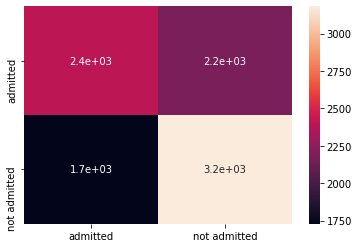

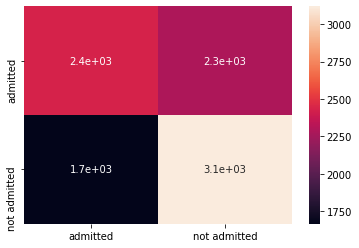

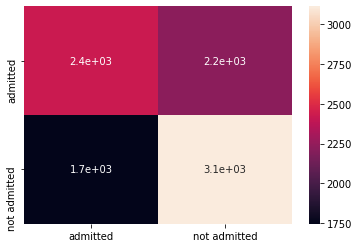

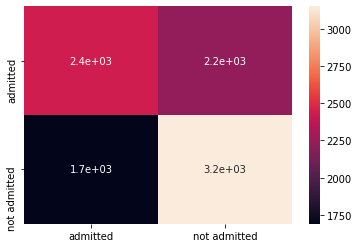

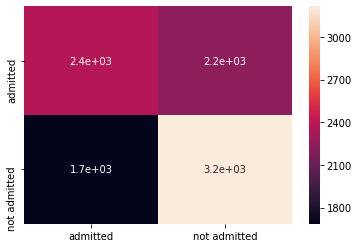

In [89]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm5 = confusion_matrix(y, svm5_predy[i])
    print(cm5)
    cm5df = pd.DataFrame(cm5, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm5df, annot=True)

[[2899 1693]
 [2045 2866]]
[[2988 1731]
 [2010 2775]]
[[2958 1689]
 [2055 2802]]
[[2891 1772]
 [1958 2883]]
[[2905 1698]
 [2051 2850]]


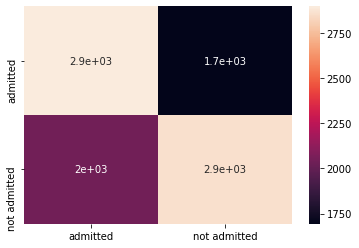

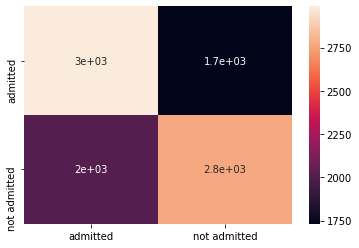

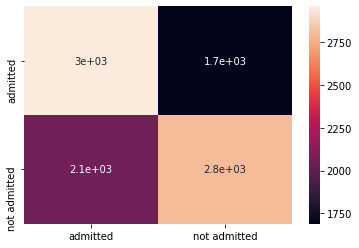

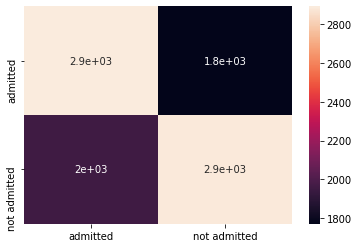

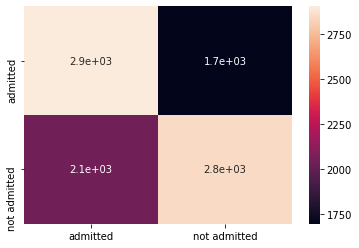

In [90]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm6 = confusion_matrix(y, svm6_predy[i])
    print(cm6)
    cm6df = pd.DataFrame(cm6, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm6df, annot=True)

[[4556   36]
 [ 122 4789]]
[[4687   32]
 [ 124 4661]]
[[4607   40]
 [ 134 4723]]
[[4637   26]
 [ 139 4702]]
[[3199 1404]
 [2138 2763]]


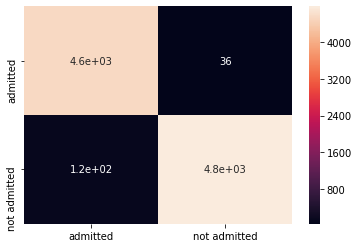

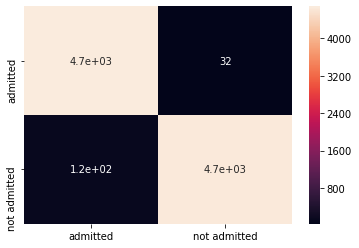

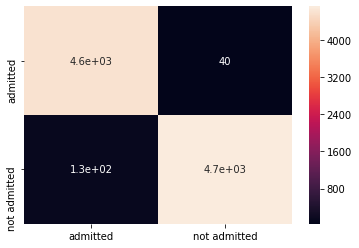

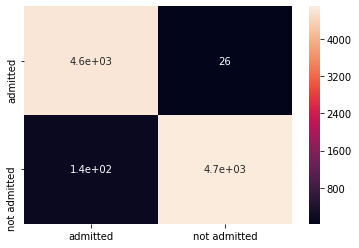

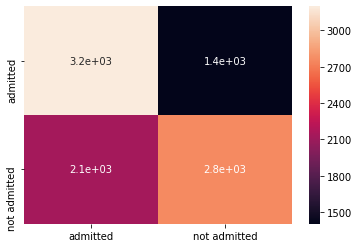

In [91]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm7 = confusion_matrix(y, rfc1_predy[i])
    print(cm7)
    cm7df = pd.DataFrame(cm7, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm7df, annot=True)

[[4561   31]
 [  29 4882]]
[[4685   34]
 [  39 4746]]
[[4624   23]
 [  31 4826]]
[[4633   30]
 [  28 4813]]
[[2984 1619]
 [1784 3117]]


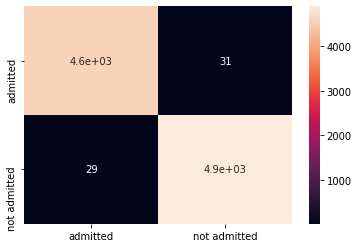

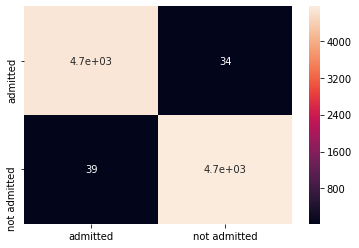

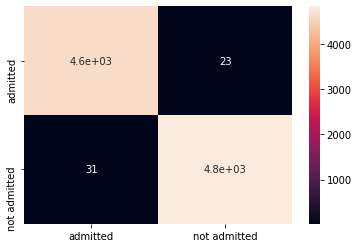

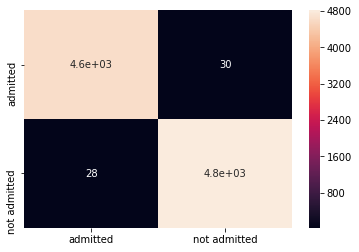

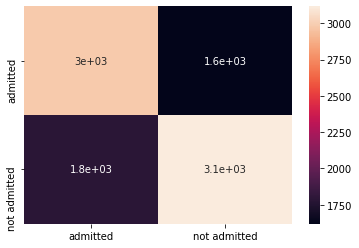

In [92]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm8 = confusion_matrix(y, rfc2_predy[i])
    print(cm8)
    cm8df = pd.DataFrame(cm8, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm8df, annot=True)

[[4592    0]
 [   1 4910]]
[[4718    1]
 [   1 4784]]
[[4647    0]
 [   0 4857]]
[[4662    1]
 [   0 4841]]
[[3009 1594]
 [1742 3159]]


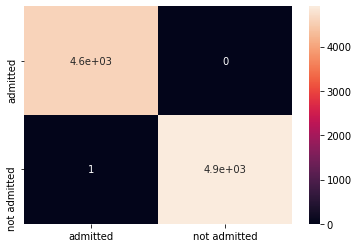

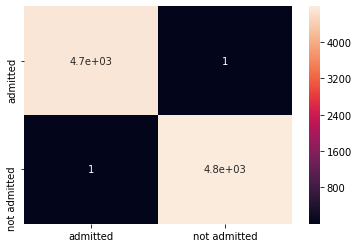

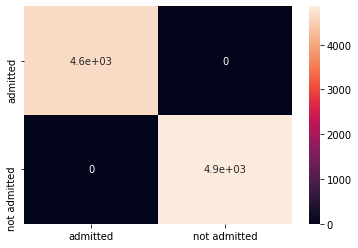

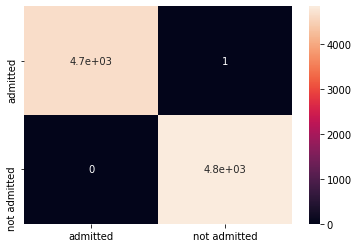

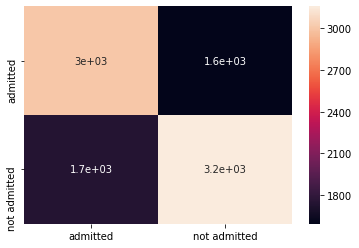

In [93]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm9 = confusion_matrix(y, rfc3_predy[i])
    print(cm9)
    cm9df = pd.DataFrame(cm9, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm9df, annot=True)

[[4592    0]
 [1978 2933]]
[[4719    0]
 [1948 2837]]
[[4647    0]
 [1988 2869]]
[[4663    0]
 [1976 2865]]
[[3576 1027]
 [3147 1754]]


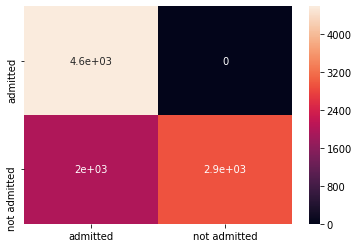

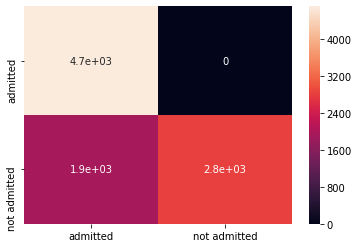

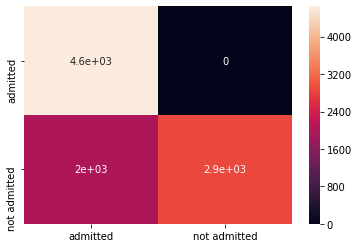

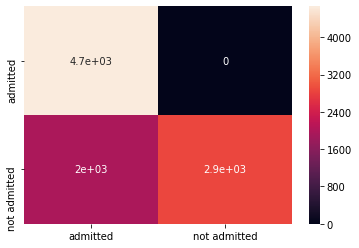

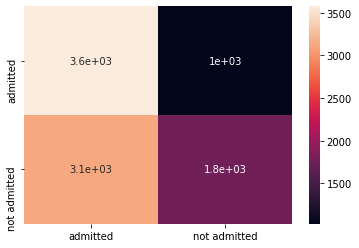

In [94]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm10 = confusion_matrix(y, knn1_predy[i])
    print(cm10)
    cm10df = pd.DataFrame(cm10, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm10df, annot=True)

[[3566 1026]
 [ 933 3978]]
[[3666 1053]
 [ 946 3839]]
[[3613 1034]
 [ 970 3887]]
[[3690  973]
 [1012 3829]]
[[2611 1992]
 [1984 2917]]


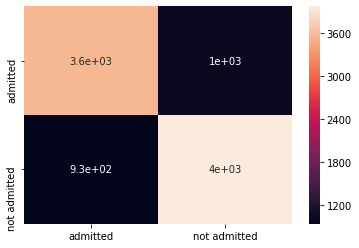

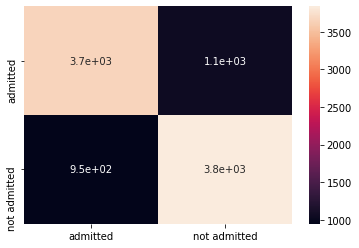

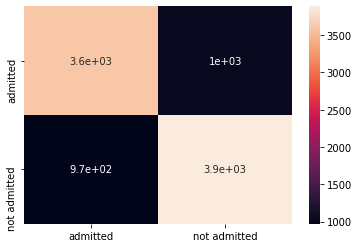

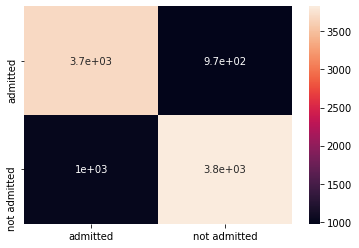

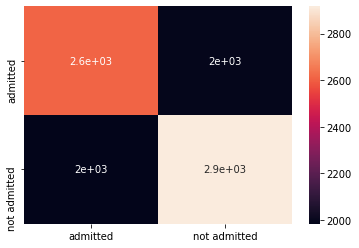

In [95]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm11 = confusion_matrix(y, knn2_predy[i])
    print(cm11)
    cm11df = pd.DataFrame(cm11, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm11df, annot=True)

[[2103 2489]
 [1599 3312]]
[[2154 2565]
 [1664 3121]]
[[2130 2517]
 [1686 3171]]
[[2108 2555]
 [1659 3182]]
[[2081 2522]
 [1674 3227]]


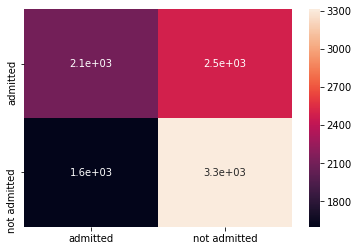

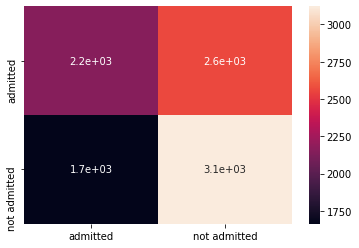

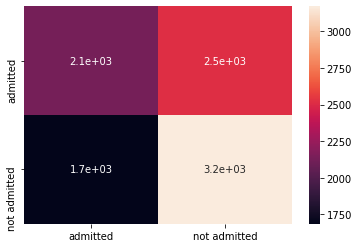

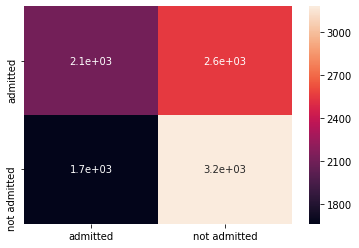

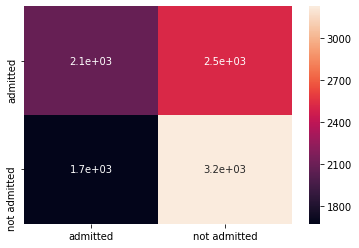

In [96]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm12 = confusion_matrix(y, mlp1_predy[i])
    print(cm12)
    cm12df = pd.DataFrame(cm12, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm12df, annot=True)

[[4050  542]
 [3766 1145]]
[[4216  503]
 [3651 1134]]
[[4131  516]
 [3736 1121]]
[[4113  550]
 [3720 1121]]
[[4032  571]
 [3761 1140]]


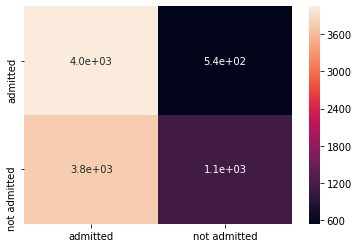

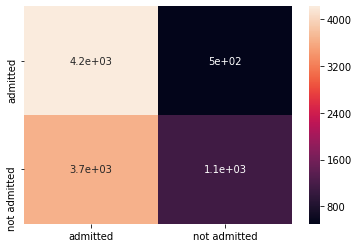

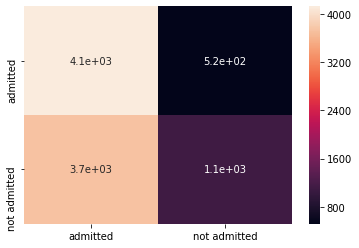

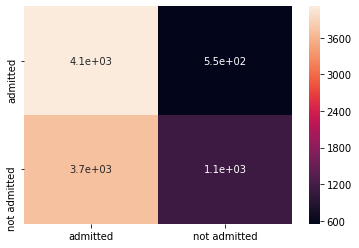

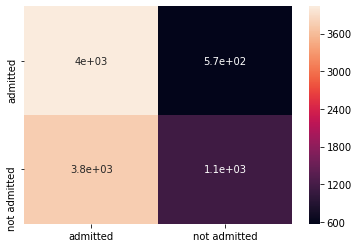

In [97]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm13 = confusion_matrix(y, mlp2_predy[i])
    print(cm13)
    cm13df = pd.DataFrame(cm13, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm13df, annot=True)

[[2794 1798]
 [1916 2995]]
[[2880 1839]
 [1891 2894]]
[[2814 1833]
 [1935 2922]]
[[2789 1874]
 [1865 2976]]
[[2810 1793]
 [1901 3000]]


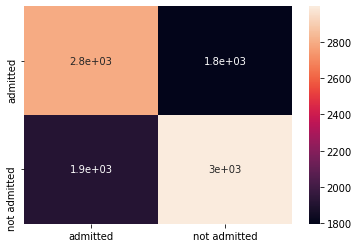

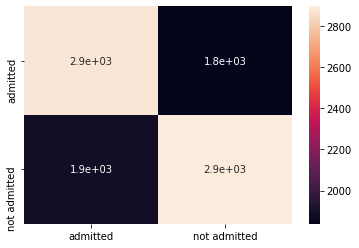

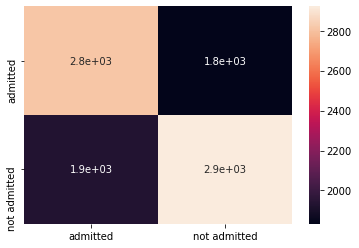

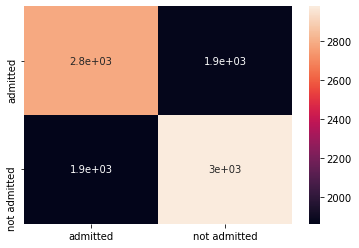

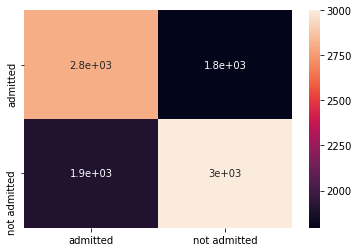

In [98]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm14 = confusion_matrix(y, logr1_predy[i])
    print(cm14)
    cm14df = pd.DataFrame(cm14, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm14df, annot=True)

[[2577 2015]
 [2038 2873]]
[[2666 2053]
 [1922 2863]]
[[2625 2022]
 [1998 2859]]
[[2610 2053]
 [1952 2889]]
[[2565 2038]
 [1960 2941]]


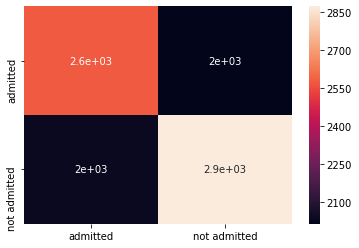

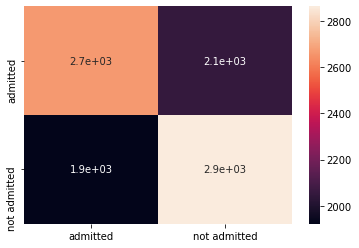

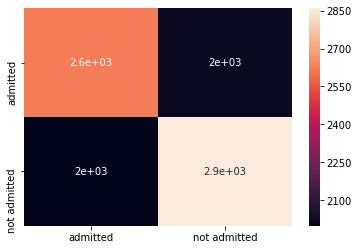

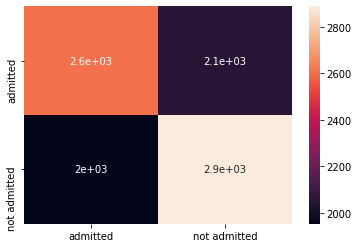

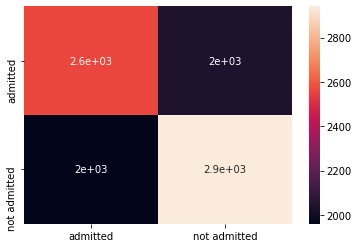

In [99]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm15 = confusion_matrix(y, logr2_predy[i])
    print(cm15)
    cm15df = pd.DataFrame(cm15, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm15df, annot=True)

[[ 914 3678]
 [ 787 4124]]
[[ 991 3728]
 [ 723 4062]]
[[ 957 3690]
 [ 832 4025]]
[[ 906 3757]
 [ 766 4075]]
[[ 921 3682]
 [ 735 4166]]


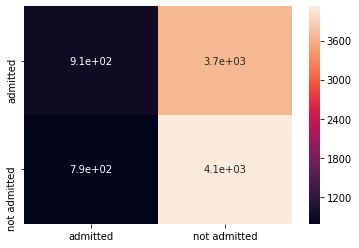

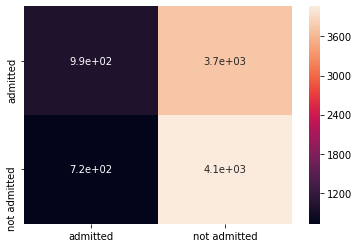

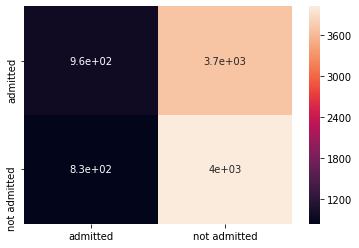

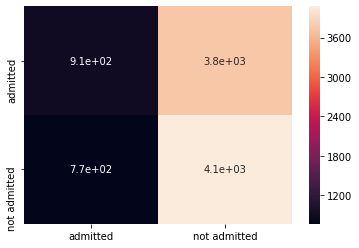

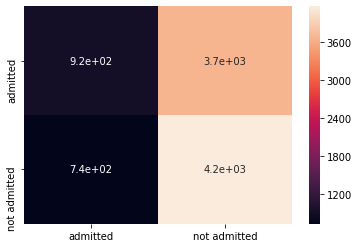

In [100]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm16 = confusion_matrix(y, bnb1_predy[i])
    print(cm16)
    cm16df = pd.DataFrame(cm16, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm16df, annot=True)

[[2827 1765]
 [2380 2531]]
[[2927 1792]
 [2319 2466]]
[[2875 1772]
 [2344 2513]]
[[2838 1825]
 [2324 2517]]
[[2813 1790]
 [2308 2593]]


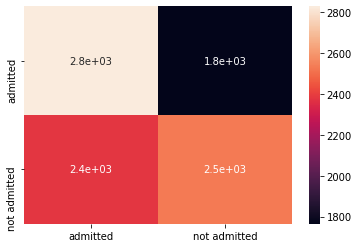

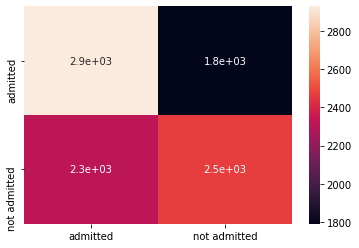

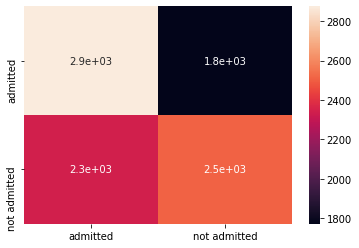

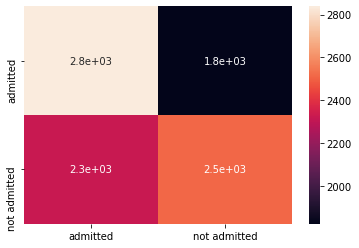

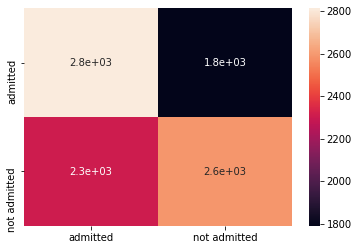

In [101]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm17 = confusion_matrix(y, cnb1_predy[i])
    print(cm17)
    cm17df = pd.DataFrame(cm17, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm17df, annot=True)

[[ 882 3710]
 [ 678 4233]]
[[ 937 3782]
 [ 627 4158]]
[[ 885 3762]
 [ 704 4153]]
[[ 888 3775]
 [ 668 4173]]
[[ 904 3699]
 [ 633 4268]]


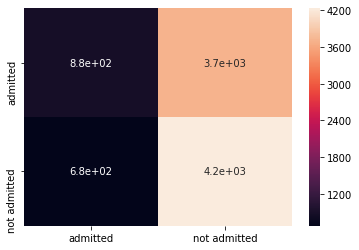

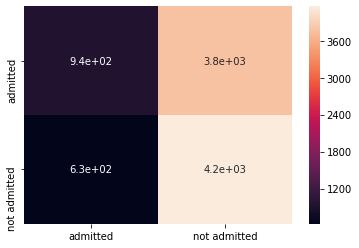

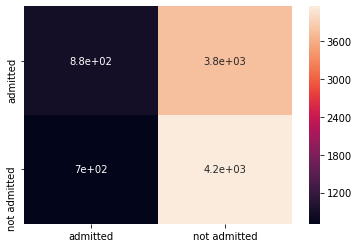

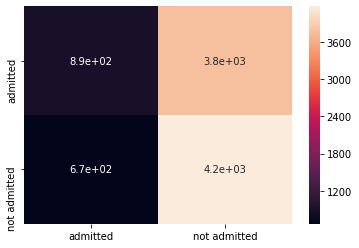

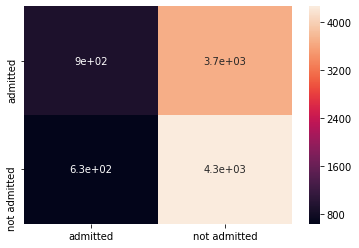

In [102]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm18 = confusion_matrix(y, gnb1_predy[i])
    print(cm18)
    cm18df = pd.DataFrame(cm18, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm18df, annot=True)

[[2824 1768]
 [2379 2532]]
[[2926 1793]
 [2318 2467]]
[[2871 1776]
 [2344 2513]]
[[2837 1826]
 [2323 2518]]
[[2812 1791]
 [2304 2597]]


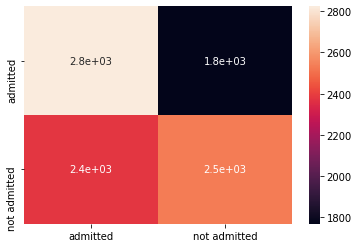

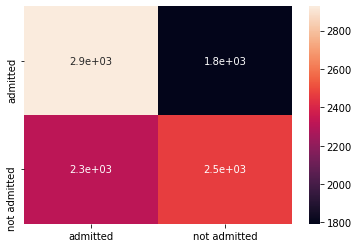

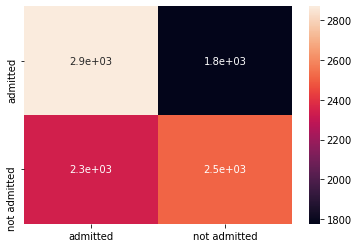

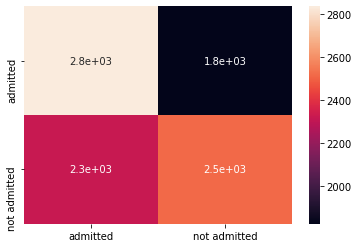

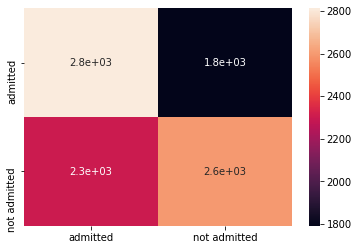

In [103]:
for i,y in zip(range(n_folds), [df_ya, df_yb, df_yc, df_yd, df_ye]):
    fig = plt.figure(i+1)
    cm19 = confusion_matrix(y, mnb1_predy[i])
    print(cm19)
    cm19df = pd.DataFrame(cm19, index = ["admitted",'not admitted'], columns = ["admitted",'not admitted'])
    seaborn.heatmap(cm19df, annot=True)

In [104]:
#TensorFlow MLP
import tensorflow as tf

n_nodes_hl1 = 30
n_nodes_hl2 = 45
n_nodes_hl3 = 16

n_classes = 2
batch_size = 100

x = tf.placeholder('float', [None, 15])
y = tf.placeholder('float',[None,2])

def neuralnetwork(data):
    hiddenlayer1 = {'weights':tf.Variable(tf.random_normal([15, n_nodes_hl1])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hiddenlayer2 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    # hiddenlayer3 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    outputlayer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}

    l1 = tf.add(tf.matmul(data,hiddenlayer1['weights']), hiddenlayer1['biases'])
    l1 = tf.nn.tanh(l1)
    l2 = tf.add(tf.matmul(l1,hiddenlayer2['weights']), hiddenlayer2['biases'])
    l2 = tf.nn.tanh(l2)
    
    # l3 = tf.add(tf.matmul(l2,hiddenlayer3['weights']), hiddenlayer3['biases'])
    # l3 = tf.nn.tanh(l3)
    output = tf.matmul(l2,outputlayer['weights']) + outputlayer['biases']
    output=tf.nn.softmax(output)
    return output

In [105]:
cwd = os.getcwd()
print(cwd)

C:\Users\tanis_vt1gg0x\IDE Workspaces\Jupyter Notebooks\ML Project


In [106]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df_yaten = enc.fit_transform(df_ya.reshape(-1,1)).toarray()
df_ybcdeten = enc.fit_transform(df_ybcde.reshape(-1,1)).toarray()
df_ybten = enc.fit_transform(df_yb.reshape(-1,1)).toarray()
df_yacdeten = enc.fit_transform(df_yacde.reshape(-1,1)).toarray()
df_ycten = enc.fit_transform(df_yc.reshape(-1,1)).toarray()
df_yabdeten = enc.fit_transform(df_yabde.reshape(-1,1)).toarray()
df_ydten = enc.fit_transform(df_yd.reshape(-1,1)).toarray()
df_yabceten = enc.fit_transform(df_yabce.reshape(-1,1)).toarray()
df_yeten = enc.fit_transform(df_ye.reshape(-1,1)).toarray()
df_yabcdten = enc.fit_transform(df_yabcd.reshape(-1,1)).toarray()

In [107]:
def train_neural_network(x):
    prediction = neuralnetwork(x)
    eploss=[]
    eplosstrain=[]
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))

    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
    # print(optimizer)
    
    hm_epochs = 1000
    with tf.Session() as sess:
        # OLD:
        # sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            epoch_losstrain=0
            # for i in range(40613):
            #     epoch_x, epoch_y =dfbcde[i].reshape(1,-1),df_ybcde[i].reshape(1,-1) 
            #     # print(type((epoch_x)))
            #     lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            #     epoch_loss += c
            #     print(lam,c)
            # for index in range(0,38868,10000):
            #   epoch_x, epoch_y =dfbcde[index:index+10000,:],df_ybcdeten[index:index+10000,:]
            #   lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            #   # lam, c1 = sess.run([optimizer, cost], feed_dict={x: (dfa), y: (df_yaten)})
            epoch_x, epoch_y =dfbcde,df_ybcdeten
            lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            epoch_loss += c
            eploss.append(epoch_loss)

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
        print(prediction)
        predy=prediction.eval({x:dfa,y:df_yaten})

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print("accuracy on train:",accuracy.eval({x:dfbcde,y:df_ybcdeten}))
        print('Accuracy on test :',accuracy.eval({x:dfa, y:df_yaten}))
    return eploss,predy

In [108]:
losslist, predy = train_neural_network(x)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch 0 completed out of 1000 loss: 0.789579451084137
Epoch 1 completed out of 1000 loss: 0.7893659472465515
Epoch 2 completed out of 1000 loss: 0.7891513705253601
Epoch 3 completed out of 1000 loss: 0.7889324426651001
Epoch 4 completed out of 1000 loss: 0.7887110114097595
Epoch 5 completed out of 1000 loss: 0.788486659526825
Epoch 6 completed out of 1000 loss: 0.7882596254348755
Epoch 7 completed out of 1000 loss: 0.7880343794822693
Epoch 8 completed out of 1000 loss: 0.7878027558326721
Epoch 9 completed out of 1000 loss: 0.7875715494155884
Epoch 10 completed out of 1000 loss: 0.7873350381851196
Epoch 11 completed out of 1000 loss: 0.7870920300483704
Epoch 12 completed out of 1000 loss: 0.7868433594703674
Epoch 13 completed out of 1000 loss: 0.7865957021713257
Epoch 14 completed out of 1000 loss: 

Epoch 140 completed out of 1000 loss: 0.7348888516426086
Epoch 141 completed out of 1000 loss: 0.7346855401992798
Epoch 142 completed out of 1000 loss: 0.7344781160354614
Epoch 143 completed out of 1000 loss: 0.7342737913131714
Epoch 144 completed out of 1000 loss: 0.7340659499168396
Epoch 145 completed out of 1000 loss: 0.733855664730072
Epoch 146 completed out of 1000 loss: 0.7336438298225403
Epoch 147 completed out of 1000 loss: 0.733432412147522
Epoch 148 completed out of 1000 loss: 0.7332276701927185
Epoch 149 completed out of 1000 loss: 0.7330257892608643
Epoch 150 completed out of 1000 loss: 0.732832670211792
Epoch 151 completed out of 1000 loss: 0.7326434850692749
Epoch 152 completed out of 1000 loss: 0.7324452996253967
Epoch 153 completed out of 1000 loss: 0.7322471737861633
Epoch 154 completed out of 1000 loss: 0.732059895992279
Epoch 155 completed out of 1000 loss: 0.731873095035553
Epoch 156 completed out of 1000 loss: 0.7316850423812866
Epoch 157 completed out of 1000 loss

Epoch 287 completed out of 1000 loss: 0.7202138304710388
Epoch 288 completed out of 1000 loss: 0.7201524972915649
Epoch 289 completed out of 1000 loss: 0.7200825810432434
Epoch 290 completed out of 1000 loss: 0.7200040221214294
Epoch 291 completed out of 1000 loss: 0.719927191734314
Epoch 292 completed out of 1000 loss: 0.7198439240455627
Epoch 293 completed out of 1000 loss: 0.7197763919830322
Epoch 294 completed out of 1000 loss: 0.719706118106842
Epoch 295 completed out of 1000 loss: 0.7196333408355713
Epoch 296 completed out of 1000 loss: 0.71953946352005
Epoch 297 completed out of 1000 loss: 0.7194422483444214
Epoch 298 completed out of 1000 loss: 0.7193571925163269
Epoch 299 completed out of 1000 loss: 0.7192692160606384
Epoch 300 completed out of 1000 loss: 0.7191860675811768
Epoch 301 completed out of 1000 loss: 0.7191314101219177
Epoch 302 completed out of 1000 loss: 0.719071090221405
Epoch 303 completed out of 1000 loss: 0.71900475025177
Epoch 304 completed out of 1000 loss: 

Epoch 432 completed out of 1000 loss: 0.7138875126838684
Epoch 433 completed out of 1000 loss: 0.7138669490814209
Epoch 434 completed out of 1000 loss: 0.7138465046882629
Epoch 435 completed out of 1000 loss: 0.7138269543647766
Epoch 436 completed out of 1000 loss: 0.7138065695762634
Epoch 437 completed out of 1000 loss: 0.713784396648407
Epoch 438 completed out of 1000 loss: 0.7137638926506042
Epoch 439 completed out of 1000 loss: 0.7137434482574463
Epoch 440 completed out of 1000 loss: 0.7137261629104614
Epoch 441 completed out of 1000 loss: 0.713706374168396
Epoch 442 completed out of 1000 loss: 0.7136843204498291
Epoch 443 completed out of 1000 loss: 0.7136635780334473
Epoch 444 completed out of 1000 loss: 0.7136461734771729
Epoch 445 completed out of 1000 loss: 0.713624894618988
Epoch 446 completed out of 1000 loss: 0.7136033773422241
Epoch 447 completed out of 1000 loss: 0.7135840058326721
Epoch 448 completed out of 1000 loss: 0.7135658264160156
Epoch 449 completed out of 1000 lo

Epoch 580 completed out of 1000 loss: 0.7115576267242432
Epoch 581 completed out of 1000 loss: 0.711546003818512
Epoch 582 completed out of 1000 loss: 0.7115346789360046
Epoch 583 completed out of 1000 loss: 0.7115247249603271
Epoch 584 completed out of 1000 loss: 0.711512565612793
Epoch 585 completed out of 1000 loss: 0.7115012407302856
Epoch 586 completed out of 1000 loss: 0.7114890813827515
Epoch 587 completed out of 1000 loss: 0.7114763855934143
Epoch 588 completed out of 1000 loss: 0.7114666700363159
Epoch 589 completed out of 1000 loss: 0.7114552855491638
Epoch 590 completed out of 1000 loss: 0.7114445567131042
Epoch 591 completed out of 1000 loss: 0.7114338874816895
Epoch 592 completed out of 1000 loss: 0.7114222645759583
Epoch 593 completed out of 1000 loss: 0.71141117811203
Epoch 594 completed out of 1000 loss: 0.7114003896713257
Epoch 595 completed out of 1000 loss: 0.7113885879516602
Epoch 596 completed out of 1000 loss: 0.7113778591156006
Epoch 597 completed out of 1000 los

Epoch 727 completed out of 1000 loss: 0.7100861072540283
Epoch 728 completed out of 1000 loss: 0.7100765109062195
Epoch 729 completed out of 1000 loss: 0.7100645899772644
Epoch 730 completed out of 1000 loss: 0.7100567817687988
Epoch 731 completed out of 1000 loss: 0.7100439667701721
Epoch 732 completed out of 1000 loss: 0.7100360989570618
Epoch 733 completed out of 1000 loss: 0.7100248336791992
Epoch 734 completed out of 1000 loss: 0.7100167274475098
Epoch 735 completed out of 1000 loss: 0.7100066542625427
Epoch 736 completed out of 1000 loss: 0.7099947333335876
Epoch 737 completed out of 1000 loss: 0.7099872827529907
Epoch 738 completed out of 1000 loss: 0.7099746465682983
Epoch 739 completed out of 1000 loss: 0.7099670171737671
Epoch 740 completed out of 1000 loss: 0.7099543809890747
Epoch 741 completed out of 1000 loss: 0.7099460363388062
Epoch 742 completed out of 1000 loss: 0.7099370956420898
Epoch 743 completed out of 1000 loss: 0.7099247574806213
Epoch 744 completed out of 1000

Epoch 874 completed out of 1000 loss: 0.7086998820304871
Epoch 875 completed out of 1000 loss: 0.7086912393569946
Epoch 876 completed out of 1000 loss: 0.7086824178695679
Epoch 877 completed out of 1000 loss: 0.7086741924285889
Epoch 878 completed out of 1000 loss: 0.7086664438247681
Epoch 879 completed out of 1000 loss: 0.708655834197998
Epoch 880 completed out of 1000 loss: 0.7086474299430847
Epoch 881 completed out of 1000 loss: 0.7086388468742371
Epoch 882 completed out of 1000 loss: 0.7086312174797058
Epoch 883 completed out of 1000 loss: 0.7086232900619507
Epoch 884 completed out of 1000 loss: 0.7086154818534851
Epoch 885 completed out of 1000 loss: 0.7086061239242554
Epoch 886 completed out of 1000 loss: 0.7085995078086853
Epoch 887 completed out of 1000 loss: 0.7085887789726257
Epoch 888 completed out of 1000 loss: 0.7085812091827393
Epoch 889 completed out of 1000 loss: 0.7085728049278259
Epoch 890 completed out of 1000 loss: 0.7085641026496887
Epoch 891 completed out of 1000 

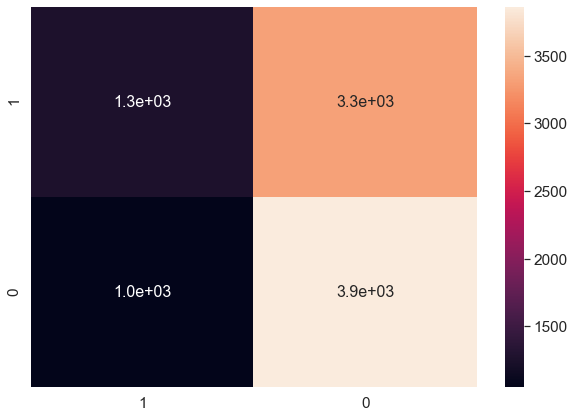

In [109]:
predy=np.argmax(predy,axis=1)
cm8 = confusion_matrix(df_ya,predy)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


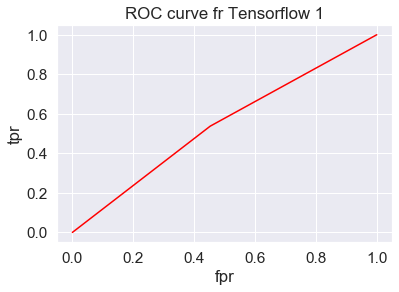

In [110]:
fpr, tpr, _ = roc_curve(predy, df_ya, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 1')
plt.show()

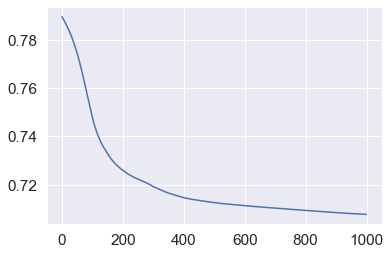

In [111]:
seq = np.arange(1000).tolist()
plt.plot(seq, losslist)
plt.show()

In [112]:
#TensorFlow MLP

n_nodes_hl1 =30
n_nodes_hl2=45
n_nodes_hl3=10
n_nodes_hl4=8
n_classes = 2

x = tf.placeholder('float', [None, 15])
y = tf.placeholder('float',[None,2])

def neuralnetwork2(data):
    hiddenlayer1 = {'weights':tf.Variable(tf.random_normal([15, n_nodes_hl1])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hiddenlayer2 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
#     hiddenlayer3 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    # hiddenlayer4 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])), 'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}
    outputlayer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])), 'biases':tf.Variable(tf.random_normal([n_classes])),}

    l1 = tf.add(tf.matmul(data,hiddenlayer1['weights']), hiddenlayer1['biases'])
    l1 = tf.nn.tanh(l1)
    l2 = tf.add(tf.matmul(l1,hiddenlayer2['weights']), hiddenlayer2['biases'])
    l2 = tf.nn.tanh(l2)
#     l3 = tf.add(tf.matmul(l2,hiddenlayer3['weights']), hiddenlayer3['biases'])
#     l3 = tf.nn.tanh(l3)
    # l4 = tf.add(tf.matmul(l3,hiddenlayer4['weights']), hiddenlayer4['biases'])
    # l4 = tf.nn.tanh(l4)

    output = tf.matmul(l2,outputlayer['weights']) + outputlayer['biases']
    output=tf.nn.softmax(output)

    return output

In [113]:
def train_neural_network2(x, dfx, dfy, dftestx, dftesty):
    prediction = neuralnetwork2(x)
    eploss=[]
    eplosstrain=[]
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y ))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
    # print(optimizer)
    
    epochs = 1000
    with tf.Session() as sess:
        # OLD:
        # sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_losstrain=0
            # for i in range(40613):
            #     epoch_x, epoch_y =dfbcde[i].reshape(1,-1),df_ybcde[i].reshape(1,-1) 
            #     # print(type((epoch_x)))
            #     lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
            #     epoch_loss += c
            #     print(lam,c)
            for index in range(0,38867,10000):
                epoch_x, epoch_y =dfx[index:index+10000,:],dfy[index:index+10000,:]
                lam, c = sess.run([optimizer, cost], feed_dict={x: (epoch_x), y: (epoch_y)})
                # lam, c1 = sess.run([optimizer, cost], feed_dict={x: (dfa), y: (df_yaten)})
                epoch_loss += c
            eploss.append(epoch_loss)
  
            print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)
        print(prediction)
        # confusion = tf.confusion_matrix(labels=y, predictions=prediction, num_classes=2)
        predy=prediction.eval({x:dftestx,y:dftesty})
        print(predy)
        print(np.array_equal(predy,dftesty))
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print("accuracy on train:",accuracy.eval({x:dfx,y:dfy}))
        print('Accuracy on test :',accuracy.eval({x:dftestx, y:dftesty}))
        # print(confusion.eval(session=sess))
        print(dftesty)
    return eploss, predy

In [114]:
losslist2, predy2 = train_neural_network2(x, dfacde, df_yacdeten, dfb, df_ybten)
predy2 = np.argmax(predy2, axis=1)
print(predy2)

Epoch 0 completed out of 1000 loss: 3.171965777873993
Epoch 1 completed out of 1000 loss: 3.168803870677948
Epoch 2 completed out of 1000 loss: 3.1660982966423035
Epoch 3 completed out of 1000 loss: 3.1637458205223083
Epoch 4 completed out of 1000 loss: 3.161473512649536
Epoch 5 completed out of 1000 loss: 3.159274160861969
Epoch 6 completed out of 1000 loss: 3.1570618748664856
Epoch 7 completed out of 1000 loss: 3.154956817626953
Epoch 8 completed out of 1000 loss: 3.1529464721679688
Epoch 9 completed out of 1000 loss: 3.1509217619895935
Epoch 10 completed out of 1000 loss: 3.148977518081665
Epoch 11 completed out of 1000 loss: 3.1471049189567566
Epoch 12 completed out of 1000 loss: 3.145249843597412
Epoch 13 completed out of 1000 loss: 3.1433736085891724
Epoch 14 completed out of 1000 loss: 3.1413976550102234
Epoch 15 completed out of 1000 loss: 3.139322578907013
Epoch 16 completed out of 1000 loss: 3.137369990348816
Epoch 17 completed out of 1000 loss: 3.1355563402175903
Epoch 18 co

Epoch 151 completed out of 1000 loss: 2.8569690585136414
Epoch 152 completed out of 1000 loss: 2.856652617454529
Epoch 153 completed out of 1000 loss: 2.856274902820587
Epoch 154 completed out of 1000 loss: 2.855824112892151
Epoch 155 completed out of 1000 loss: 2.855371832847595
Epoch 156 completed out of 1000 loss: 2.855004668235779
Epoch 157 completed out of 1000 loss: 2.854607045650482
Epoch 158 completed out of 1000 loss: 2.854142665863037
Epoch 159 completed out of 1000 loss: 2.853667140007019
Epoch 160 completed out of 1000 loss: 2.853114902973175
Epoch 161 completed out of 1000 loss: 2.852542459964752
Epoch 162 completed out of 1000 loss: 2.8521097898483276
Epoch 163 completed out of 1000 loss: 2.851576566696167
Epoch 164 completed out of 1000 loss: 2.851071357727051
Epoch 165 completed out of 1000 loss: 2.850785732269287
Epoch 166 completed out of 1000 loss: 2.8504011631011963
Epoch 167 completed out of 1000 loss: 2.8500260710716248
Epoch 168 completed out of 1000 loss: 2.8496

Epoch 297 completed out of 1000 loss: 2.809912919998169
Epoch 298 completed out of 1000 loss: 2.8097671270370483
Epoch 299 completed out of 1000 loss: 2.8096237182617188
Epoch 300 completed out of 1000 loss: 2.8094752430915833
Epoch 301 completed out of 1000 loss: 2.8093305230140686
Epoch 302 completed out of 1000 loss: 2.8091841340065002
Epoch 303 completed out of 1000 loss: 2.8090397715568542
Epoch 304 completed out of 1000 loss: 2.8088964223861694
Epoch 305 completed out of 1000 loss: 2.8087525367736816
Epoch 306 completed out of 1000 loss: 2.808608591556549
Epoch 307 completed out of 1000 loss: 2.8084657192230225
Epoch 308 completed out of 1000 loss: 2.8083282709121704
Epoch 309 completed out of 1000 loss: 2.8081894516944885
Epoch 310 completed out of 1000 loss: 2.808053493499756
Epoch 311 completed out of 1000 loss: 2.807921528816223
Epoch 312 completed out of 1000 loss: 2.8077856302261353
Epoch 313 completed out of 1000 loss: 2.807653844356537
Epoch 314 completed out of 1000 loss

Epoch 445 completed out of 1000 loss: 2.788401961326599
Epoch 446 completed out of 1000 loss: 2.7882421612739563
Epoch 447 completed out of 1000 loss: 2.7880842089653015
Epoch 448 completed out of 1000 loss: 2.78792941570282
Epoch 449 completed out of 1000 loss: 2.7877766489982605
Epoch 450 completed out of 1000 loss: 2.787628650665283
Epoch 451 completed out of 1000 loss: 2.7874805331230164
Epoch 452 completed out of 1000 loss: 2.7873371839523315
Epoch 453 completed out of 1000 loss: 2.787195563316345
Epoch 454 completed out of 1000 loss: 2.7870527505874634
Epoch 455 completed out of 1000 loss: 2.7869126200675964
Epoch 456 completed out of 1000 loss: 2.7867714762687683
Epoch 457 completed out of 1000 loss: 2.7866349816322327
Epoch 458 completed out of 1000 loss: 2.786495864391327
Epoch 459 completed out of 1000 loss: 2.7863553166389465
Epoch 460 completed out of 1000 loss: 2.7862154245376587
Epoch 461 completed out of 1000 loss: 2.7860787510871887
Epoch 462 completed out of 1000 loss:

Epoch 594 completed out of 1000 loss: 2.7741013169288635
Epoch 595 completed out of 1000 loss: 2.7740485668182373
Epoch 596 completed out of 1000 loss: 2.7739967107772827
Epoch 597 completed out of 1000 loss: 2.773943781852722
Epoch 598 completed out of 1000 loss: 2.773892879486084
Epoch 599 completed out of 1000 loss: 2.773839592933655
Epoch 600 completed out of 1000 loss: 2.7737887501716614
Epoch 601 completed out of 1000 loss: 2.77373731136322
Epoch 602 completed out of 1000 loss: 2.7736854553222656
Epoch 603 completed out of 1000 loss: 2.773633897304535
Epoch 604 completed out of 1000 loss: 2.773582637310028
Epoch 605 completed out of 1000 loss: 2.7735305428504944
Epoch 606 completed out of 1000 loss: 2.77347993850708
Epoch 607 completed out of 1000 loss: 2.773430049419403
Epoch 608 completed out of 1000 loss: 2.7733784914016724
Epoch 609 completed out of 1000 loss: 2.7733271718025208
Epoch 610 completed out of 1000 loss: 2.7732757925987244
Epoch 611 completed out of 1000 loss: 2.7

Epoch 739 completed out of 1000 loss: 2.7659600973129272
Epoch 740 completed out of 1000 loss: 2.765892744064331
Epoch 741 completed out of 1000 loss: 2.765818774700165
Epoch 742 completed out of 1000 loss: 2.765748679637909
Epoch 743 completed out of 1000 loss: 2.7656801342964172
Epoch 744 completed out of 1000 loss: 2.7656063437461853
Epoch 745 completed out of 1000 loss: 2.7655364871025085
Epoch 746 completed out of 1000 loss: 2.7654643654823303
Epoch 747 completed out of 1000 loss: 2.7653931975364685
Epoch 748 completed out of 1000 loss: 2.7653209567070007
Epoch 749 completed out of 1000 loss: 2.7652480602264404
Epoch 750 completed out of 1000 loss: 2.765175461769104
Epoch 751 completed out of 1000 loss: 2.765102744102478
Epoch 752 completed out of 1000 loss: 2.765028417110443
Epoch 753 completed out of 1000 loss: 2.764953374862671
Epoch 754 completed out of 1000 loss: 2.764877676963806
Epoch 755 completed out of 1000 loss: 2.764802575111389
Epoch 756 completed out of 1000 loss: 2.

Epoch 887 completed out of 1000 loss: 2.7429452538490295
Epoch 888 completed out of 1000 loss: 2.742904543876648
Epoch 889 completed out of 1000 loss: 2.742863178253174
Epoch 890 completed out of 1000 loss: 2.7428221106529236
Epoch 891 completed out of 1000 loss: 2.74278062582016
Epoch 892 completed out of 1000 loss: 2.7427412271499634
Epoch 893 completed out of 1000 loss: 2.742701470851898
Epoch 894 completed out of 1000 loss: 2.7426605224609375
Epoch 895 completed out of 1000 loss: 2.742620527744293
Epoch 896 completed out of 1000 loss: 2.742581307888031
Epoch 897 completed out of 1000 loss: 2.7425405979156494
Epoch 898 completed out of 1000 loss: 2.7425015568733215
Epoch 899 completed out of 1000 loss: 2.7424615621566772
Epoch 900 completed out of 1000 loss: 2.742422938346863
Epoch 901 completed out of 1000 loss: 2.7423861622810364
Epoch 902 completed out of 1000 loss: 2.7423458099365234
Epoch 903 completed out of 1000 loss: 2.7423064708709717
Epoch 904 completed out of 1000 loss: 2

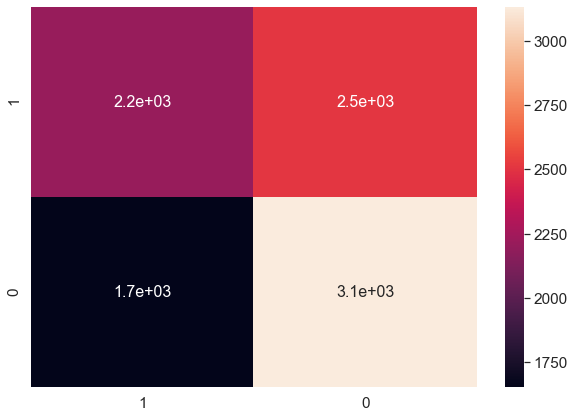

In [115]:
cm8 = confusion_matrix(df_yb,predy2)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size

# plt.show()
# ig, ax = plt.subplots()
# cm = confusion_matrix(df_yb, predy2)

# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# ax.figure.colorbar(im, ax=ax)

# ax.set(yticks=[-0.5, 1.5], 
#        xticks=[0, 1], 
#        yticklabels=[1,0], 
#        xticklabels=[1,0])
# # ax.yaxis.set_major_locator(ticker.IndexLocater(base=1, offset=0.5))
# ax.yaxis.set_major_locator(mat.ticker.IndexLocator(base=1, offset=0.5))
# seaborn.heatmap(cm8df, annot=True)

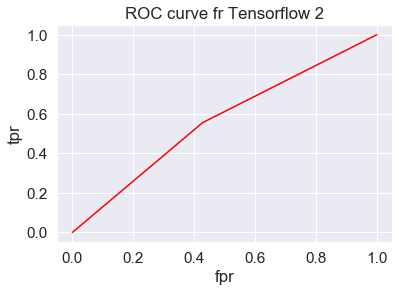

In [116]:
fpr, tpr, _ = roc_curve(predy2, df_yb, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 2')
plt.show()

In [117]:
losslist3,predy3 = train_neural_network2(x, dfabde, df_yabdeten, dfc, df_ycten)
predy3=np.argmax(predy3,axis=1)

Epoch 0 completed out of 1000 loss: 2.9244229793548584
Epoch 1 completed out of 1000 loss: 2.919194221496582
Epoch 2 completed out of 1000 loss: 2.914746105670929
Epoch 3 completed out of 1000 loss: 2.9109460711479187
Epoch 4 completed out of 1000 loss: 2.9076281785964966
Epoch 5 completed out of 1000 loss: 2.9046390056610107
Epoch 6 completed out of 1000 loss: 2.901992619037628
Epoch 7 completed out of 1000 loss: 2.8996741771698
Epoch 8 completed out of 1000 loss: 2.8975101113319397
Epoch 9 completed out of 1000 loss: 2.8954278230667114
Epoch 10 completed out of 1000 loss: 2.8934370279312134
Epoch 11 completed out of 1000 loss: 2.8915507197380066
Epoch 12 completed out of 1000 loss: 2.889755427837372
Epoch 13 completed out of 1000 loss: 2.888034224510193
Epoch 14 completed out of 1000 loss: 2.8863860368728638
Epoch 15 completed out of 1000 loss: 2.884793519973755
Epoch 16 completed out of 1000 loss: 2.883127987384796
Epoch 17 completed out of 1000 loss: 2.881484627723694
Epoch 18 comp

Epoch 150 completed out of 1000 loss: 2.805424392223358
Epoch 151 completed out of 1000 loss: 2.8049274682998657
Epoch 152 completed out of 1000 loss: 2.804421305656433
Epoch 153 completed out of 1000 loss: 2.8039249777793884
Epoch 154 completed out of 1000 loss: 2.8034444451332092
Epoch 155 completed out of 1000 loss: 2.8029792308807373
Epoch 156 completed out of 1000 loss: 2.8025201559066772
Epoch 157 completed out of 1000 loss: 2.802062451839447
Epoch 158 completed out of 1000 loss: 2.8016069531440735
Epoch 159 completed out of 1000 loss: 2.8011617064476013
Epoch 160 completed out of 1000 loss: 2.8007341027259827
Epoch 161 completed out of 1000 loss: 2.8003153800964355
Epoch 162 completed out of 1000 loss: 2.7998947501182556
Epoch 163 completed out of 1000 loss: 2.7994741797447205
Epoch 164 completed out of 1000 loss: 2.7990609407424927
Epoch 165 completed out of 1000 loss: 2.7986587285995483
Epoch 166 completed out of 1000 loss: 2.7982555627822876
Epoch 167 completed out of 1000 lo

Epoch 296 completed out of 1000 loss: 2.7812259197235107
Epoch 297 completed out of 1000 loss: 2.781066060066223
Epoch 298 completed out of 1000 loss: 2.7808967232704163
Epoch 299 completed out of 1000 loss: 2.7807204127311707
Epoch 300 completed out of 1000 loss: 2.780531108379364
Epoch 301 completed out of 1000 loss: 2.7803322672843933
Epoch 302 completed out of 1000 loss: 2.780119299888611
Epoch 303 completed out of 1000 loss: 2.779891312122345
Epoch 304 completed out of 1000 loss: 2.7796462774276733
Epoch 305 completed out of 1000 loss: 2.7793819308280945
Epoch 306 completed out of 1000 loss: 2.779097557067871
Epoch 307 completed out of 1000 loss: 2.7787858843803406
Epoch 308 completed out of 1000 loss: 2.7784449458122253
Epoch 309 completed out of 1000 loss: 2.7780714631080627
Epoch 310 completed out of 1000 loss: 2.7776594161987305
Epoch 311 completed out of 1000 loss: 2.7772005200386047
Epoch 312 completed out of 1000 loss: 2.7766934633255005
Epoch 313 completed out of 1000 loss

Epoch 443 completed out of 1000 loss: 2.7462932467460632
Epoch 444 completed out of 1000 loss: 2.7462477684020996
Epoch 445 completed out of 1000 loss: 2.7461986541748047
Epoch 446 completed out of 1000 loss: 2.7461493611335754
Epoch 447 completed out of 1000 loss: 2.746101975440979
Epoch 448 completed out of 1000 loss: 2.74605131149292
Epoch 449 completed out of 1000 loss: 2.7459988594055176
Epoch 450 completed out of 1000 loss: 2.7459476590156555
Epoch 451 completed out of 1000 loss: 2.7458974719047546
Epoch 452 completed out of 1000 loss: 2.7458449006080627
Epoch 453 completed out of 1000 loss: 2.745793044567108
Epoch 454 completed out of 1000 loss: 2.7457399368286133
Epoch 455 completed out of 1000 loss: 2.745687186717987
Epoch 456 completed out of 1000 loss: 2.7456310391426086
Epoch 457 completed out of 1000 loss: 2.7455771565437317
Epoch 458 completed out of 1000 loss: 2.74552059173584
Epoch 459 completed out of 1000 loss: 2.7454668283462524
Epoch 460 completed out of 1000 loss: 

Epoch 589 completed out of 1000 loss: 2.7323153018951416
Epoch 590 completed out of 1000 loss: 2.7322680950164795
Epoch 591 completed out of 1000 loss: 2.732221841812134
Epoch 592 completed out of 1000 loss: 2.732175648212433
Epoch 593 completed out of 1000 loss: 2.7321274876594543
Epoch 594 completed out of 1000 loss: 2.7320817708969116
Epoch 595 completed out of 1000 loss: 2.732034146785736
Epoch 596 completed out of 1000 loss: 2.731989860534668
Epoch 597 completed out of 1000 loss: 2.731948971748352
Epoch 598 completed out of 1000 loss: 2.731908679008484
Epoch 599 completed out of 1000 loss: 2.731874406337738
Epoch 600 completed out of 1000 loss: 2.731837809085846
Epoch 601 completed out of 1000 loss: 2.731802761554718
Epoch 602 completed out of 1000 loss: 2.7317691445350647
Epoch 603 completed out of 1000 loss: 2.731733798980713
Epoch 604 completed out of 1000 loss: 2.731703460216522
Epoch 605 completed out of 1000 loss: 2.7316720485687256
Epoch 606 completed out of 1000 loss: 2.73

Epoch 739 completed out of 1000 loss: 2.729502320289612
Epoch 740 completed out of 1000 loss: 2.7294927835464478
Epoch 741 completed out of 1000 loss: 2.729480564594269
Epoch 742 completed out of 1000 loss: 2.7294703125953674
Epoch 743 completed out of 1000 loss: 2.729454755783081
Epoch 744 completed out of 1000 loss: 2.7294450998306274
Epoch 745 completed out of 1000 loss: 2.7294328212738037
Epoch 746 completed out of 1000 loss: 2.729420006275177
Epoch 747 completed out of 1000 loss: 2.729404389858246
Epoch 748 completed out of 1000 loss: 2.729387402534485
Epoch 749 completed out of 1000 loss: 2.7293694615364075
Epoch 750 completed out of 1000 loss: 2.729341745376587
Epoch 751 completed out of 1000 loss: 2.7292776107788086
Epoch 752 completed out of 1000 loss: 2.729244351387024
Epoch 753 completed out of 1000 loss: 2.7292346954345703
Epoch 754 completed out of 1000 loss: 2.729216516017914
Epoch 755 completed out of 1000 loss: 2.7291901111602783
Epoch 756 completed out of 1000 loss: 2.

Epoch 885 completed out of 1000 loss: 2.7276000380516052
Epoch 886 completed out of 1000 loss: 2.7275867462158203
Epoch 887 completed out of 1000 loss: 2.727578043937683
Epoch 888 completed out of 1000 loss: 2.72756826877594
Epoch 889 completed out of 1000 loss: 2.727557897567749
Epoch 890 completed out of 1000 loss: 2.7275447249412537
Epoch 891 completed out of 1000 loss: 2.727532386779785
Epoch 892 completed out of 1000 loss: 2.727525532245636
Epoch 893 completed out of 1000 loss: 2.727513372898102
Epoch 894 completed out of 1000 loss: 2.7275025844573975
Epoch 895 completed out of 1000 loss: 2.727492094039917
Epoch 896 completed out of 1000 loss: 2.727480947971344
Epoch 897 completed out of 1000 loss: 2.7274705171585083
Epoch 898 completed out of 1000 loss: 2.727457880973816
Epoch 899 completed out of 1000 loss: 2.727450132369995
Epoch 900 completed out of 1000 loss: 2.7274370193481445
Epoch 901 completed out of 1000 loss: 2.727427363395691
Epoch 902 completed out of 1000 loss: 2.727

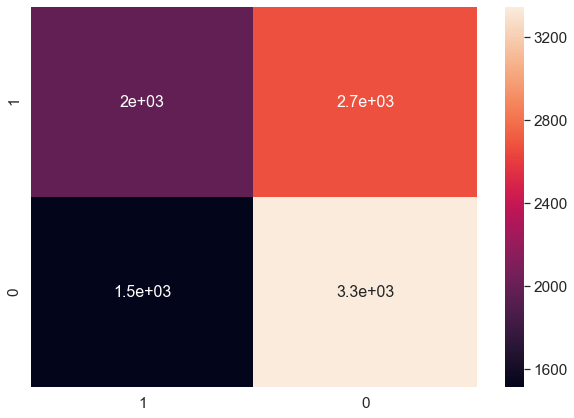

In [118]:
cm8 = confusion_matrix(df_yc,predy3)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


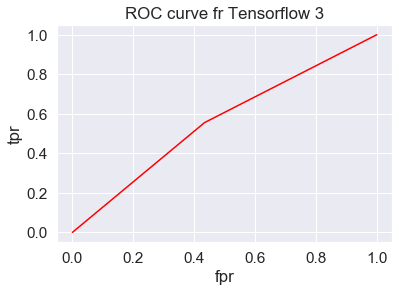

In [119]:
fpr, tpr, _ = roc_curve(predy3, df_yc, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 3')
plt.show()

In [120]:
losslist4,predy4 = train_neural_network2(x, dfabce, df_yabceten, dfd, df_ydten)
predy4=np.argmax(predy4,axis=1)

Epoch 0 completed out of 1000 loss: 3.2694172859191895
Epoch 1 completed out of 1000 loss: 3.2650516629219055
Epoch 2 completed out of 1000 loss: 3.2607805132865906
Epoch 3 completed out of 1000 loss: 3.2566741704940796
Epoch 4 completed out of 1000 loss: 3.252859652042389
Epoch 5 completed out of 1000 loss: 3.249247968196869
Epoch 6 completed out of 1000 loss: 3.2456971406936646
Epoch 7 completed out of 1000 loss: 3.242029845714569
Epoch 8 completed out of 1000 loss: 3.2381789088249207
Epoch 9 completed out of 1000 loss: 3.2342768907546997
Epoch 10 completed out of 1000 loss: 3.230494439601898
Epoch 11 completed out of 1000 loss: 3.2269200682640076
Epoch 12 completed out of 1000 loss: 3.2234086990356445
Epoch 13 completed out of 1000 loss: 3.2195246815681458
Epoch 14 completed out of 1000 loss: 3.2151577472686768
Epoch 15 completed out of 1000 loss: 3.210892379283905
Epoch 16 completed out of 1000 loss: 3.206506848335266
Epoch 17 completed out of 1000 loss: 3.2022129893302917
Epoch 18

Epoch 150 completed out of 1000 loss: 2.911029100418091
Epoch 151 completed out of 1000 loss: 2.9100049138069153
Epoch 152 completed out of 1000 loss: 2.9090283513069153
Epoch 153 completed out of 1000 loss: 2.9080387353897095
Epoch 154 completed out of 1000 loss: 2.906984031200409
Epoch 155 completed out of 1000 loss: 2.9058173298835754
Epoch 156 completed out of 1000 loss: 2.904603064060211
Epoch 157 completed out of 1000 loss: 2.903403639793396
Epoch 158 completed out of 1000 loss: 2.9021794199943542
Epoch 159 completed out of 1000 loss: 2.900878131389618
Epoch 160 completed out of 1000 loss: 2.899436831474304
Epoch 161 completed out of 1000 loss: 2.8978506326675415
Epoch 162 completed out of 1000 loss: 2.896293878555298
Epoch 163 completed out of 1000 loss: 2.8946988582611084
Epoch 164 completed out of 1000 loss: 2.8930030465126038
Epoch 165 completed out of 1000 loss: 2.8915171027183533
Epoch 166 completed out of 1000 loss: 2.890318751335144
Epoch 167 completed out of 1000 loss: 2

Epoch 299 completed out of 1000 loss: 2.8528314232826233
Epoch 300 completed out of 1000 loss: 2.8525368571281433
Epoch 301 completed out of 1000 loss: 2.8522507548332214
Epoch 302 completed out of 1000 loss: 2.851964592933655
Epoch 303 completed out of 1000 loss: 2.8516804575920105
Epoch 304 completed out of 1000 loss: 2.851395070552826
Epoch 305 completed out of 1000 loss: 2.851108133792877
Epoch 306 completed out of 1000 loss: 2.850820779800415
Epoch 307 completed out of 1000 loss: 2.850531578063965
Epoch 308 completed out of 1000 loss: 2.850237488746643
Epoch 309 completed out of 1000 loss: 2.8499430418014526
Epoch 310 completed out of 1000 loss: 2.8496459126472473
Epoch 311 completed out of 1000 loss: 2.849345088005066
Epoch 312 completed out of 1000 loss: 2.8490418195724487
Epoch 313 completed out of 1000 loss: 2.8487329483032227
Epoch 314 completed out of 1000 loss: 2.8484224677085876
Epoch 315 completed out of 1000 loss: 2.8481053709983826
Epoch 316 completed out of 1000 loss: 

Epoch 446 completed out of 1000 loss: 2.753804922103882
Epoch 447 completed out of 1000 loss: 2.7534968852996826
Epoch 448 completed out of 1000 loss: 2.7531954050064087
Epoch 449 completed out of 1000 loss: 2.7529028058052063
Epoch 450 completed out of 1000 loss: 2.752614915370941
Epoch 451 completed out of 1000 loss: 2.752330183982849
Epoch 452 completed out of 1000 loss: 2.7520519495010376
Epoch 453 completed out of 1000 loss: 2.7517743706703186
Epoch 454 completed out of 1000 loss: 2.7514951825141907
Epoch 455 completed out of 1000 loss: 2.7512179017066956
Epoch 456 completed out of 1000 loss: 2.750941216945648
Epoch 457 completed out of 1000 loss: 2.750659465789795
Epoch 458 completed out of 1000 loss: 2.750379502773285
Epoch 459 completed out of 1000 loss: 2.750098764896393
Epoch 460 completed out of 1000 loss: 2.749817192554474
Epoch 461 completed out of 1000 loss: 2.749530792236328
Epoch 462 completed out of 1000 loss: 2.749235987663269
Epoch 463 completed out of 1000 loss: 2.7

Epoch 593 completed out of 1000 loss: 2.726674258708954
Epoch 594 completed out of 1000 loss: 2.726552724838257
Epoch 595 completed out of 1000 loss: 2.7264307737350464
Epoch 596 completed out of 1000 loss: 2.7263094186782837
Epoch 597 completed out of 1000 loss: 2.7261873483657837
Epoch 598 completed out of 1000 loss: 2.7260645627975464
Epoch 599 completed out of 1000 loss: 2.7259421348571777
Epoch 600 completed out of 1000 loss: 2.7258219718933105
Epoch 601 completed out of 1000 loss: 2.7257004976272583
Epoch 602 completed out of 1000 loss: 2.725578188896179
Epoch 603 completed out of 1000 loss: 2.7254565358161926
Epoch 604 completed out of 1000 loss: 2.7253376841545105
Epoch 605 completed out of 1000 loss: 2.7252161502838135
Epoch 606 completed out of 1000 loss: 2.7250974774360657
Epoch 607 completed out of 1000 loss: 2.7249783277511597
Epoch 608 completed out of 1000 loss: 2.724858283996582
Epoch 609 completed out of 1000 loss: 2.7247408032417297
Epoch 610 completed out of 1000 los

Epoch 741 completed out of 1000 loss: 2.7100961208343506
Epoch 742 completed out of 1000 loss: 2.7100294828414917
Epoch 743 completed out of 1000 loss: 2.7099544405937195
Epoch 744 completed out of 1000 loss: 2.7098811864852905
Epoch 745 completed out of 1000 loss: 2.7098101377487183
Epoch 746 completed out of 1000 loss: 2.7097398042678833
Epoch 747 completed out of 1000 loss: 2.709669589996338
Epoch 748 completed out of 1000 loss: 2.709601044654846
Epoch 749 completed out of 1000 loss: 2.7095313668251038
Epoch 750 completed out of 1000 loss: 2.7094631791114807
Epoch 751 completed out of 1000 loss: 2.709396004676819
Epoch 752 completed out of 1000 loss: 2.7093297839164734
Epoch 753 completed out of 1000 loss: 2.7092654705047607
Epoch 754 completed out of 1000 loss: 2.7092003226280212
Epoch 755 completed out of 1000 loss: 2.7091360688209534
Epoch 756 completed out of 1000 loss: 2.709072709083557
Epoch 757 completed out of 1000 loss: 2.709008038043976
Epoch 758 completed out of 1000 loss

Epoch 888 completed out of 1000 loss: 2.7041673064231873
Epoch 889 completed out of 1000 loss: 2.704138398170471
Epoch 890 completed out of 1000 loss: 2.704108953475952
Epoch 891 completed out of 1000 loss: 2.7040809988975525
Epoch 892 completed out of 1000 loss: 2.704051911830902
Epoch 893 completed out of 1000 loss: 2.7040229439735413
Epoch 894 completed out of 1000 loss: 2.7039933800697327
Epoch 895 completed out of 1000 loss: 2.703965127468109
Epoch 896 completed out of 1000 loss: 2.703935205936432
Epoch 897 completed out of 1000 loss: 2.7039068937301636
Epoch 898 completed out of 1000 loss: 2.7038758397102356
Epoch 899 completed out of 1000 loss: 2.703848898410797
Epoch 900 completed out of 1000 loss: 2.703817129135132
Epoch 901 completed out of 1000 loss: 2.703787922859192
Epoch 902 completed out of 1000 loss: 2.7037567496299744
Epoch 903 completed out of 1000 loss: 2.703727126121521
Epoch 904 completed out of 1000 loss: 2.703696608543396
Epoch 905 completed out of 1000 loss: 2.7

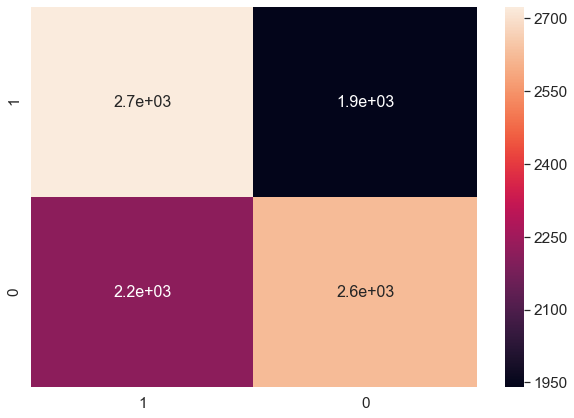

In [121]:
cm8 = confusion_matrix(df_yd,predy4)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


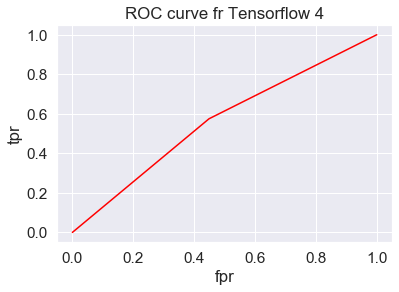

In [122]:
fpr, tpr, _ = roc_curve(predy4, df_yd, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 4')
plt.show()

In [123]:
losslist5,predy5 = train_neural_network2(x, dfabcd, df_yabcdten, dfe, df_yeten)
predy5 = np.argmax(predy5,axis=1)

Epoch 0 completed out of 1000 loss: 3.3060057759284973
Epoch 1 completed out of 1000 loss: 3.303226888179779
Epoch 2 completed out of 1000 loss: 3.3007110357284546
Epoch 3 completed out of 1000 loss: 3.2984734773635864
Epoch 4 completed out of 1000 loss: 3.296467900276184
Epoch 5 completed out of 1000 loss: 3.2946465015411377
Epoch 6 completed out of 1000 loss: 3.2929041385650635
Epoch 7 completed out of 1000 loss: 3.2912084460258484
Epoch 8 completed out of 1000 loss: 3.28957736492157
Epoch 9 completed out of 1000 loss: 3.2879775166511536
Epoch 10 completed out of 1000 loss: 3.2863571643829346
Epoch 11 completed out of 1000 loss: 3.284720301628113
Epoch 12 completed out of 1000 loss: 3.283039629459381
Epoch 13 completed out of 1000 loss: 3.2812997698783875
Epoch 14 completed out of 1000 loss: 3.2795165181159973
Epoch 15 completed out of 1000 loss: 3.277707040309906
Epoch 16 completed out of 1000 loss: 3.2758708596229553
Epoch 17 completed out of 1000 loss: 3.273929178714752
Epoch 18 c

Epoch 150 completed out of 1000 loss: 3.045008957386017
Epoch 151 completed out of 1000 loss: 3.0448077917099
Epoch 152 completed out of 1000 loss: 3.044609308242798
Epoch 153 completed out of 1000 loss: 3.0444122552871704
Epoch 154 completed out of 1000 loss: 3.044201076030731
Epoch 155 completed out of 1000 loss: 3.0439983010292053
Epoch 156 completed out of 1000 loss: 3.0437856912612915
Epoch 157 completed out of 1000 loss: 3.0435768365859985
Epoch 158 completed out of 1000 loss: 3.0433590412139893
Epoch 159 completed out of 1000 loss: 3.0431379079818726
Epoch 160 completed out of 1000 loss: 3.042909622192383
Epoch 161 completed out of 1000 loss: 3.04267817735672
Epoch 162 completed out of 1000 loss: 3.0424320697784424
Epoch 163 completed out of 1000 loss: 3.042177200317383
Epoch 164 completed out of 1000 loss: 3.0418747663497925
Epoch 165 completed out of 1000 loss: 3.041516602039337
Epoch 166 completed out of 1000 loss: 3.0412296652793884
Epoch 167 completed out of 1000 loss: 3.04

Epoch 298 completed out of 1000 loss: 2.9941580295562744
Epoch 299 completed out of 1000 loss: 2.993791401386261
Epoch 300 completed out of 1000 loss: 2.9933886528015137
Epoch 301 completed out of 1000 loss: 2.9929926991462708
Epoch 302 completed out of 1000 loss: 2.9926276803016663
Epoch 303 completed out of 1000 loss: 2.9923203587532043
Epoch 304 completed out of 1000 loss: 2.9919946789741516
Epoch 305 completed out of 1000 loss: 2.991676390171051
Epoch 306 completed out of 1000 loss: 2.991368889808655
Epoch 307 completed out of 1000 loss: 2.9910582304000854
Epoch 308 completed out of 1000 loss: 2.990743577480316
Epoch 309 completed out of 1000 loss: 2.990421235561371
Epoch 310 completed out of 1000 loss: 2.9900986552238464
Epoch 311 completed out of 1000 loss: 2.9897704124450684
Epoch 312 completed out of 1000 loss: 2.989421844482422
Epoch 313 completed out of 1000 loss: 2.989058256149292
Epoch 314 completed out of 1000 loss: 2.988704741001129
Epoch 315 completed out of 1000 loss: 2

Epoch 446 completed out of 1000 loss: 2.8623672127723694
Epoch 447 completed out of 1000 loss: 2.8617530465126038
Epoch 448 completed out of 1000 loss: 2.8611289262771606
Epoch 449 completed out of 1000 loss: 2.860498011112213
Epoch 450 completed out of 1000 loss: 2.8598586320877075
Epoch 451 completed out of 1000 loss: 2.8592087030410767
Epoch 452 completed out of 1000 loss: 2.858549654483795
Epoch 453 completed out of 1000 loss: 2.8578768372535706
Epoch 454 completed out of 1000 loss: 2.857203483581543
Epoch 455 completed out of 1000 loss: 2.856515407562256
Epoch 456 completed out of 1000 loss: 2.855824589729309
Epoch 457 completed out of 1000 loss: 2.855122447013855
Epoch 458 completed out of 1000 loss: 2.8544148206710815
Epoch 459 completed out of 1000 loss: 2.853696644306183
Epoch 460 completed out of 1000 loss: 2.8529778122901917
Epoch 461 completed out of 1000 loss: 2.852249503135681
Epoch 462 completed out of 1000 loss: 2.851520359516144
Epoch 463 completed out of 1000 loss: 2.

Epoch 595 completed out of 1000 loss: 2.788498640060425
Epoch 596 completed out of 1000 loss: 2.7884050607681274
Epoch 597 completed out of 1000 loss: 2.788305163383484
Epoch 598 completed out of 1000 loss: 2.788209617137909
Epoch 599 completed out of 1000 loss: 2.788111984729767
Epoch 600 completed out of 1000 loss: 2.788011848926544
Epoch 601 completed out of 1000 loss: 2.7879172563552856
Epoch 602 completed out of 1000 loss: 2.787818670272827
Epoch 603 completed out of 1000 loss: 2.787721574306488
Epoch 604 completed out of 1000 loss: 2.7876235842704773
Epoch 605 completed out of 1000 loss: 2.7875264286994934
Epoch 606 completed out of 1000 loss: 2.787427604198456
Epoch 607 completed out of 1000 loss: 2.7873334884643555
Epoch 608 completed out of 1000 loss: 2.787235379219055
Epoch 609 completed out of 1000 loss: 2.787141799926758
Epoch 610 completed out of 1000 loss: 2.787043273448944
Epoch 611 completed out of 1000 loss: 2.7869467735290527
Epoch 612 completed out of 1000 loss: 2.78

Epoch 740 completed out of 1000 loss: 2.7436798810958862
Epoch 741 completed out of 1000 loss: 2.7431463599205017
Epoch 742 completed out of 1000 loss: 2.7426193356513977
Epoch 743 completed out of 1000 loss: 2.74210524559021
Epoch 744 completed out of 1000 loss: 2.7416117787361145
Epoch 745 completed out of 1000 loss: 2.7411365509033203
Epoch 746 completed out of 1000 loss: 2.7406821250915527
Epoch 747 completed out of 1000 loss: 2.740249454975128
Epoch 748 completed out of 1000 loss: 2.7398350834846497
Epoch 749 completed out of 1000 loss: 2.7394497394561768
Epoch 750 completed out of 1000 loss: 2.739092767238617
Epoch 751 completed out of 1000 loss: 2.738757908344269
Epoch 752 completed out of 1000 loss: 2.738449454307556
Epoch 753 completed out of 1000 loss: 2.73816055059433
Epoch 754 completed out of 1000 loss: 2.73789644241333
Epoch 755 completed out of 1000 loss: 2.7376503944396973
Epoch 756 completed out of 1000 loss: 2.7374263405799866
Epoch 757 completed out of 1000 loss: 2.7

Epoch 890 completed out of 1000 loss: 2.730939567089081
Epoch 891 completed out of 1000 loss: 2.7309130430221558
Epoch 892 completed out of 1000 loss: 2.7308859825134277
Epoch 893 completed out of 1000 loss: 2.7308579683303833
Epoch 894 completed out of 1000 loss: 2.7308260202407837
Epoch 895 completed out of 1000 loss: 2.7307976484298706
Epoch 896 completed out of 1000 loss: 2.7307692170143127
Epoch 897 completed out of 1000 loss: 2.7307440638542175
Epoch 898 completed out of 1000 loss: 2.7307141423225403
Epoch 899 completed out of 1000 loss: 2.7306864857673645
Epoch 900 completed out of 1000 loss: 2.730656385421753
Epoch 901 completed out of 1000 loss: 2.7306313514709473
Epoch 902 completed out of 1000 loss: 2.730600655078888
Epoch 903 completed out of 1000 loss: 2.7305732369422913
Epoch 904 completed out of 1000 loss: 2.7305444478988647
Epoch 905 completed out of 1000 loss: 2.73051655292511
Epoch 906 completed out of 1000 loss: 2.730485737323761
Epoch 907 completed out of 1000 loss:

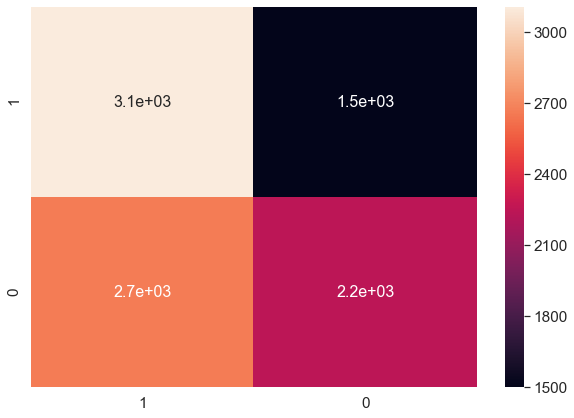

In [124]:
cm8 = confusion_matrix(df_ye,predy5)
plt.figure(figsize = (10,7))
cm8df = pd.DataFrame(cm8, index = ["1",'0'], columns = ["1",'0'])
seaborn.set(font_scale=1.4)#for label size
seaborn.heatmap(cm8df, annot=True,annot_kws={"size": 16})# font size


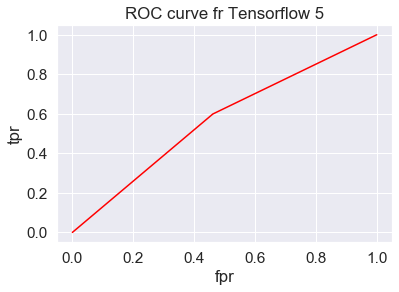

In [125]:
fpr, tpr, _ = roc_curve(predy5, df_ye, drop_intermediate=False)
plt.plot(fpr, tpr, color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve fr Tensorflow 5')
plt.show()

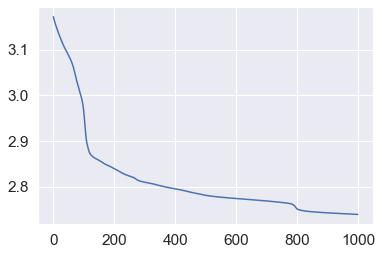

In [126]:
seq = np.arange(1000).tolist()
plt.plot(seq, losslist2)
plt.show()

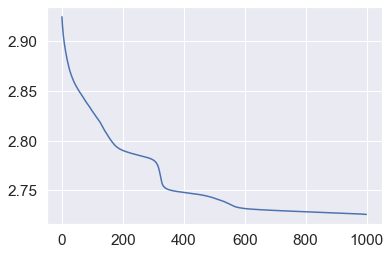

In [127]:
plt.plot(seq, losslist3)
plt.show()

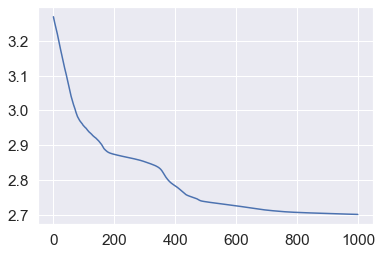

In [128]:
plt.plot(seq, losslist4)
plt.show()

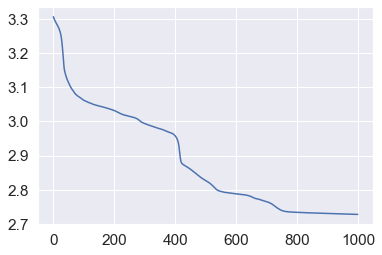

In [129]:
plt.plot(seq, losslist5)
plt.show()

In [130]:
print("F1 Score for fold 1 of Tensorflow model:", f1_score(df_ya, predy))
print("F1 Score for fold 2 of Tensorflow model:", f1_score(df_yb, predy2))
print("F1 Score for fold 3 of Tensorflow model:", f1_score(df_yc, predy3))
print("F1 Score for fold 4 of Tensorflow model:", f1_score(df_yd, predy4))
print("F1 Score for fold 5 of Tensorflow model:", f1_score(df_ye, predy5))

F1 Score for fold 1 of Tensorflow model: 0.6384456386936751
F1 Score for fold 2 of Tensorflow model: 0.6008056781124113
F1 Score for fold 3 of Tensorflow model: 0.614875425209157
F1 Score for fold 4 of Tensorflow model: 0.5578477243726073
F1 Score for fold 5 of Tensorflow model: 0.5184070386663578


In [147]:
from sklearn.metrics import classification_report, recall_score, precision_score, precision_recall_curve

9503 9503
[0.51678417 0.63423505 1.        ] [1.        0.5681124 0.       ] [0 1]


(0.0, 1.0)

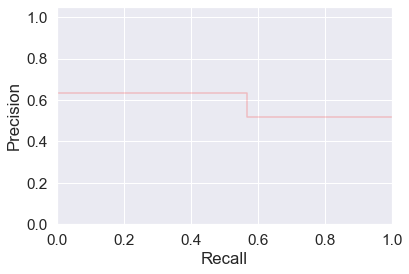

In [146]:
# from inspect import signature
# # https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
# print(len(df_ya), len(svm1_predy[0]))
# precision, recall, _ = precision_recall_curve(df_ya, svm1_predy[0])
# print(precision, recall, _)
# # step_kwargs = ({'step': 'post'}
# #                if 'step' in signature(plt.fill_between).parameters
# #                else {})
# plt.step(recall, precision, color='red', alpha=0.2, where='post')
# # plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# # plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [151]:
print(classification_report(df_ya, svm1_predy[0]))
print(classification_report(df_yb, svm1_predy[1]))
print(classification_report(df_yc, svm1_predy[2]))
print(classification_report(df_yd, svm1_predy[3]))
print(classification_report(df_ye, svm1_predy[4]))

print(classification_report(df_ya, svm5_predy[0]))
print(classification_report(df_yb, svm5_predy[1]))
print(classification_report(df_yc, svm5_predy[2]))
print(classification_report(df_yd, svm5_predy[3]))
print(classification_report(df_ye, svm5_predy[4]))

print(classification_report(df_ya, svm6_predy[0]))
print(classification_report(df_yb, svm6_predy[1]))
print(classification_report(df_yc, svm6_predy[2]))
print(classification_report(df_yd, svm6_predy[3]))
print(classification_report(df_ye, svm6_predy[4]))

print(classification_report(df_ya, knn1_predy[0]))
print(classification_report(df_yb, knn1_predy[1]))
print(classification_report(df_yc, knn1_predy[2]))
print(classification_report(df_yd, knn1_predy[3]))
print(classification_report(df_ye, knn1_predy[4]))

print(classification_report(df_ya, knn2_predy[0]))
print(classification_report(df_yb, knn2_predy[1]))
print(classification_report(df_yc, knn2_predy[2]))
print(classification_report(df_yd, knn2_predy[3]))
print(classification_report(df_ye, knn2_predy[4]))

print(classification_report(df_ya, rfc1_predy[0]))
print(classification_report(df_yb, rfc1_predy[1]))
print(classification_report(df_yc, rfc1_predy[2]))
print(classification_report(df_yd, rfc1_predy[3]))
print(classification_report(df_ye, rfc1_predy[4]))

print(classification_report(df_ya, rfc2_predy[0]))
print(classification_report(df_yb, rfc2_predy[1]))
print(classification_report(df_yc, rfc2_predy[2]))
print(classification_report(df_yd, rfc2_predy[3]))
print(classification_report(df_ye, rfc2_predy[4]))

print(classification_report(df_ya, rfc3_predy[0]))
print(classification_report(df_yb, rfc3_predy[1]))
print(classification_report(df_yc, rfc3_predy[2]))
print(classification_report(df_yd, rfc3_predy[3]))
print(classification_report(df_ye, rfc3_predy[4]))

print(classification_report(df_ya, mlp1_predy[0]))
print(classification_report(df_yb, mlp1_predy[1]))
print(classification_report(df_yc, mlp1_predy[2]))
print(classification_report(df_yd, mlp1_predy[3]))
print(classification_report(df_ye, mlp1_predy[4]))

print(classification_report(df_ya, mlp2_predy[0]))
print(classification_report(df_yb, mlp2_predy[1]))
print(classification_report(df_yc, mlp2_predy[2]))
print(classification_report(df_yd, mlp2_predy[3]))
print(classification_report(df_ye, mlp2_predy[4]))

print(classification_report(df_ya, logr1_predy[0]))
print(classification_report(df_yb, logr1_predy[1]))
print(classification_report(df_yc, logr1_predy[2]))
print(classification_report(df_yd, logr1_predy[3]))
print(classification_report(df_ye, logr1_predy[4]))

print(classification_report(df_ya, logr2_predy[0]))
print(classification_report(df_yb, logr2_predy[1]))
print(classification_report(df_yc, logr2_predy[2]))
print(classification_report(df_yd, logr2_predy[3]))
print(classification_report(df_ye, logr2_predy[4]))

print(classification_report(df_ya, bnb1_predy[0]))
print(classification_report(df_yb, bnb1_predy[1]))
print(classification_report(df_yc, bnb1_predy[2]))
print(classification_report(df_yd, bnb1_predy[3]))
print(classification_report(df_ye, bnb1_predy[4]))

print(classification_report(df_ya, cnb1_predy[0]))
print(classification_report(df_yb, cnb1_predy[1]))
print(classification_report(df_yc, cnb1_predy[2]))
print(classification_report(df_yd, cnb1_predy[3]))
print(classification_report(df_ye, cnb1_predy[4]))

print(classification_report(df_ya, gnb1_predy[0]))
print(classification_report(df_yb, gnb1_predy[1]))
print(classification_report(df_yc, gnb1_predy[2]))
print(classification_report(df_yd, gnb1_predy[3]))
print(classification_report(df_ye, gnb1_predy[4]))

print(classification_report(df_ya, mnb1_predy[0]))
print(classification_report(df_yb, mnb1_predy[1]))
print(classification_report(df_yc, mnb1_predy[2]))
print(classification_report(df_yd, mnb1_predy[3]))
print(classification_report(df_ye, mnb1_predy[4]))

              precision    recall  f1-score   support

           0       0.58      0.65      0.62      4592
           1       0.63      0.57      0.60      4911

    accuracy                           0.61      9503
   macro avg       0.61      0.61      0.61      9503
weighted avg       0.61      0.61      0.61      9503

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      4719
           1       0.62      0.57      0.59      4785

    accuracy                           0.61      9504
   macro avg       0.61      0.61      0.61      9504
weighted avg       0.61      0.61      0.61      9504

              precision    recall  f1-score   support

           0       0.58      0.64      0.61      4647
           1       0.62      0.56      0.59      4857

    accuracy                           0.60      9504
   macro avg       0.60      0.60      0.60      9504
weighted avg       0.60      0.60      0.60      9504

              preci


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4719
           1       0.99      0.97      0.98      4785

    accuracy                           0.98      9504
   macro avg       0.98      0.98      0.98      9504
weighted avg       0.98      0.98      0.98      9504

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4647
           1       0.99      0.97      0.98      4857

    accuracy                           0.98      9504
   macro avg       0.98      0.98      0.98      9504
weighted avg       0.98      0.98      0.98      9504

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4663
           1       0.99      0.97      0.98      4841

    accuracy                           0.98      9504
   macro avg       0.98      0.98      0.98      9504
weighted avg       0.98      0.98      0.98      9504

              prec


              precision    recall  f1-score   support

           0       0.57      0.56      0.56      4603
           1       0.59      0.60      0.60      4901

    accuracy                           0.58      9504
   macro avg       0.58      0.58      0.58      9504
weighted avg       0.58      0.58      0.58      9504

              precision    recall  f1-score   support

           0       0.54      0.20      0.29      4592
           1       0.53      0.84      0.65      4911

    accuracy                           0.53      9503
   macro avg       0.53      0.52      0.47      9503
weighted avg       0.53      0.53      0.48      9503

              precision    recall  f1-score   support

           0       0.58      0.21      0.31      4719
           1       0.52      0.85      0.65      4785

    accuracy                           0.53      9504
   macro avg       0.55      0.53      0.48      9504
weighted avg       0.55      0.53      0.48      9504

              prec